# Chargement des bibliothèques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_arch, acorr_ljungbox, normal_ad, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats

!pip install arch
from arch.unitroot import PhillipsPerron

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 13.3 MB/s eta 0:00:00


# Chargement des datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_global = pd.read_csv("/content/drive/MyDrive/risque de crédit/data/Données_CCF_SERIE_GLOBALE_VF.csv", sep=";")
df_seg = pd.read_csv("/content/drive/MyDrive/risque de crédit/data/Données_CCF_PAR_SEGMENT.csv", sep=";")
df_macro = pd.read_excel("/content/drive/MyDrive/risque de crédit/data/historique_macro_variables_projet_CCF_FowardLooking_IFRS9.xlsx")

In [ ]:
# Affichage des dimensions (nombre de lignes et de colonnes) de chaque DataFrame
print("Taille de df_global :", df_global.shape)
print("Taille de df_seg    :", df_seg.shape)
print("Taille de df_macro  :", df_macro.shape)

# # Affichage des colonnes
print("Colonnes dans df_global :", df_global.columns.tolist())
print("Colonnes dans df_macro  :", df_macro.columns.tolist())
print("Colonnes dans df_seg    :", df_seg.columns.tolist())

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans df_global :")
print(df_global.isnull().sum())

print("\nValeurs manquantes dans df_seg :")
print(df_seg.isnull().sum())

print("\nValeurs manquantes dans df_macro :")
print(df_macro.isnull().sum())

print("Colonnes dans df_global :", df_global.columns.tolist())
print("Colonnes dans df_macro  :", df_macro.columns.tolist())
print("Colonnes dans df_seg    :", df_seg.columns.tolist())

Taille de df_global : (60, 5)
Taille de df_seg    : (360, 6)
Taille de df_macro  : (177, 9)
Colonnes dans df_global : ['date', 'Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5', 'Indicateur_Moyen_1_6', 'Effectif_Pourc_1_6']
Colonnes dans df_macro  : ['date_dernier_mois', 'PIB', 'IPL', 'TCH', 'Inflation', 'PIB_diff1', 'IPL_diff1', 'TCH_diff1', 'Inflation_diff1']
Colonnes dans df_seg    : ['cod_prd_ref', 'note_ref', 'Indicateur_moyen_Brut', 'PourcNote', 'PourcNoteCohorte', 'PourcNoteCohorte5']

Valeurs manquantes dans df_global :
date                    0
Indicateur_Moyen_1_5    0
Effectif_Pourc_1_5      0
Indicateur_Moyen_1_6    4
Effectif_Pourc_1_6      4
dtype: int64

Valeurs manquantes dans df_seg :
cod_prd_ref              0
note_ref                 0
Indicateur_moyen_Brut    0
PourcNote                0
PourcNoteCohorte         0
PourcNoteCohorte5        0
dtype: int64

Valeurs manquantes dans df_macro :
date_dernier_mois    0
PIB                  1
IPL                  0
TCH           

In [ ]:
pd.set_option('display.max_rows', None)         # Afficher toutes les lignes
pd.set_option('display.max_columns', None)      # Afficher toutes les colonnes
pd.set_option('display.width', None)            # Ne pas tronquer l'affichage horizontal
pd.set_option('display.max_colwidth', None)     # Afficher tout le contenu des colonnes

# Affichage complet des trois DataFrames
print("Contenu complet de df_global :")
display(df_global)

print("Contenu complet de df_seg :")
display(df_seg)

print("Contenu complet de df_macro :")
display(df_macro)

Contenu complet de df_global :


date Indicateur_Moyen_1_5 Effectif_Pourc_1_5 Indicateur_Moyen_1_6  \
0   01/01/2009          0,970606193        0,017557363          0,957118884   
1   01/04/2009          0,897803427        0,018822706          0,947747459   
2   01/07/2009          0,867301801        0,021353392           0,90162578   
3   01/10/2009          0,873420816        0,021796554          0,947376392   
4   01/01/2010          0,871323408        0,020414589          0,981170796   
5   01/04/2010          0,859260902        0,019732354          0,909054675   
6   01/07/2010          0,822387502        0,018939328          0,926112423   
7   01/10/2010          0,886489938        0,020280475          0,897337448   
8   01/01/2011          0,916626734        0,021703257          0,927312582   
9   01/04/2011          0,846177286        0,023172687          0,933502261   
10  01/07/2011          0,839968075         0,02270037          0,914118037   
11  01/10/2011          0,804474616        0,022991924          0,944514354   
12  01/01/2012          0,794789212        0,021942331          0,943965914   
13  01/04/2012          0,850995148        0,024426368          0,926274558   
14  01/07/2012          0,796299895        0,023248491          0,925719646   
15  01/10/2012          0,860341558        0,024041517          0,927038929   
16  01/01/2013          0,835020113        0,024525496          0,920722927   
17  01/04/2013          0,825385453        0,024128983          0,880458052   
18  01/07/2013          0,807647549        0,024478848          0,823033197   
19  01/10/2013          0,802875802        0,023965713          0,869868664   
20  01/01/2014          0,783407548        0,022601242          0,876988814   
21  01/04/2014          0,788454285        0,022472958          0,845320914   
22  01/07/2014            0,7136207        0,019545759          0,885492431   
23  01/10/2014          0,719342513        0,018921834           0,84651927   
24  01/01/2015          0,711456553         0,01759235          0,871828281   
25  01/04/2015          0,719663919        0,018828537           0,81972031   
26  01/07/2015          0,688420779        0,017254147          0,847275878   
27  01/10/2015          0,693520499        0,017481559          0,843533429   
28  01/01/2016          0,675430179        0,016012129           0,84278479   
29  01/04/2016          0,617086508        0,015545643          0,828432284   
30  01/07/2016          0,819662999        0,016775999          0,815779086   
31  01/10/2016          0,706446354        0,016204554          0,804462362   
32  01/01/2017          0,596995918        0,014472725           0,78818361   
33  01/04/2017          0,579247765        0,013807983          0,758496786   
34  01/07/2017          0,580674527         0,01286918           0,79805799   
35  01/10/2017          0,556499963        0,013586402          0,820952367   
36  01/01/2018          0,544335528        0,013936266          0,821086364   
37  01/04/2018          0,508275404        0,013592233          0,749491258   
38  01/07/2018          0,584712538        0,012723403          0,868219309   
39  01/10/2018           0,57973531        0,013977084          0,821108515   
40  01/01/2019          0,590686728         0,01260095           0,85737349   
41  01/04/2019          0,538082535        0,012076154          0,865030495   
42  01/07/2019          0,588968617        0,012723403          0,826698655   
43  01/10/2019           0,62883076        0,013633051          0,781039938   
44  01/01/2020           0,67248821        0,013044112           0,77513166   
45  01/04/2020           0,64196979        0,011084871          0,757069248   
46  01/07/2020          0,607514246        0,008262632          0,834820379   
47  01/10/2020          0,479467456         0,00885157          0,861872699   
48  01/01/2021          0,475550837          0,0082568           0,84882927   
49  01/04/2021          0,516614194        0,008455057      

Contenu complet de df_seg :


cod_prd_ref  note_ref Indicateur_moyen_Brut            PourcNote  \
0            2009T1         1           0,451962798   0,0128162511542013   
1            2009T1         2             0,9185154   0,0150016761649346   
2            2009T1         3           0,919842763   0,0188878742730812   
3            2009T1         4           1,275863582   0,0148540805032912   
4            2009T1         5           1,093202854   0,0221397186552676   
5            2009T1         6                  1,05   0,0144263013098644   
6            2009T2         1            0,59879537   0,0130378578024007   
7            2009T2         2            0,69396959   0,0172225947033188   
8            2009T2         3            0,84096486   0,0204258182342481   
9            2009T2         4           0,967390423   0,0191646764140502   
10           2009T2         5           1,109014764   0,0221226881024558   
11           2009T2         6                  1,05    0,014754793939311   
12           2009T3         1           0,460211701   0,0135918744228994   
13           2009T3         2           0,676645486   0,0226910828025478   
14           2009T3         3           0,868908645   0,0250396501177488   
15           2009T3         4           1,052081375   0,0194559328945069   
16           2009T3         5           1,083921567   0,0230934296127252   
17           2009T3         6                  1,05   0,0173622041855436   
18           2009T4         1           0,431517918    0,014145891043398   
19           2009T4         2           0,697949435   0,0207844451894066   
20           2009T4         3           0,974173103   0,0235017061565819   
21           2009T4         4           0,936314848   0,0215529795537951   
22           2009T4         5           1,053459221   0,0256139514288634   
23           2009T4         6                  1,05   0,0173416733962032   
24           2010T1         1           0,302710264   0,0141828254847645   
25           2010T1         2            0,68171778   0,0187730472678512   
26           2010T1         3           0,849148633    0,024126495890806   
27           2010T1         4           1,168514962    0,021203471777247   
28           2010T1         5           1,086222377   0,0230763990599135   
29           2010T1         6                  1,05   0,0174785453251393   
30           2010T2         1           0,431341048   0,0148845798707295   
31           2010T2         2           0,682242538   0,0205539725108951   
32           2010T2         3           0,970323173   0,0227807949247849   
33           2010T2         4           1,060566169   0,0228927593638958   
34           2010T2         5           1,048449102   0,0192956163357063   
35           2010T2         6                  1,05   0,0177522891830115   
36           2010T3         1           0,489685502   0,0168421052631579   
37           2010T3         2           0,748288512   0,0182911498491452   
38           2010T3         3           0,808149398   0,0227327341759985   
39           2010T3         4            0,91292584   0,0213782256655211   
40           2010T3         5           0,998390823   0,0183759664838721   
41           2010T3         6                  1,05   0,0178549431297135   
42           2010T4         1           0,443123225   0,0175069252077562   
43           2010T4         2           0,807215396    0,018479718404291   
44           2010T4         3           0,956821695   0,0222040659393473   
45           2010T4         4           0,947347599   0,0224850002912565   
46           2010T4         5           1,062386044   0,0216969242821622   
47           2010T4         6                  1,05   0,0190936340865852   
48           2011T1         1           0,300743409   0,0180609418282548   
49           2011T1         2           0,895859746   0,0183330539725109   
50           2011T1         3           0,964282269   0,0253760753592541   
51           2011T1         4           1,010295351   0,

Contenu complet de df_macro :


date_dernier_mois       PIB        IPL   TCH  Inflation  PIB_diff1  \
0             1980-03  0.000000   0.000000   5.3   0.000000        NaN   
1             1980-06  0.000000   0.000000   5.3   0.000000   0.000000   
2             1980-09  0.000000   0.000000   5.4   0.000000   0.000000   
3             1980-12  0.000000   0.000000   5.6   0.000000   0.000000   
4             1981-03  0.000000   0.000000   6.0   0.000000   0.000000   
5             1981-06  0.000000   0.000000   6.3   0.000000   0.000000   
6             1981-09  0.000000   0.000000   6.5   0.000000   0.000000   
7             1981-12  1.066566   0.000000   6.7   0.000000   1.066566   
8             1982-03  1.894868   0.000000   6.7   0.000000   0.828302   
9             1982-06  2.360459   0.000000   6.8   0.000000   0.465591   
10            1982-09  2.504424   0.000000   7.0   0.000000   0.143965   
11            1982-12  2.463872   0.000000   7.0   0.000000  -0.040551   
12            1983-03  2.183734   0.000000   7.0   0.000000  -0.280138   
13            1983-06  1.721960   0.000000   7.0   0.000000  -0.461774   
14            1983-09  1.488297   0.000000   7.2   0.000000  -0.233662   
15            1983-12  1.242323   0.000000   7.5   0.000000  -0.245974   
16            1984-03  1.113980   0.000000   7.9   0.000000  -0.128343   
17            1984-06  1.267931   0.000000   8.3   0.000000   0.153950   
18            1984-09  1.506765   0.000000   8.5   0.000000   0.238834   
19            1984-12  1.579213   0.000000   8.7   0.000000   0.072449   
20            1985-03  1.620298   0.000000   8.8   0.000000   0.041085   
21            1985-06  1.659023   0.000000   8.8   0.000000   0.038724   
22            1985-09  1.535237   0.000000   8.8   0.000000  -0.123786   
23            1985-12  1.725034   0.000000   8.8   0.000000   0.189797   
24            1986-03  1.950727   0.000000   8.7   0.000000   0.225694   
25            1986-06  2.120350   0.000000   8.8   0.000000   0.169623   
26            1986-09  2.315381   0.000000   8.8   0.000000   0.195031   
27            1986-12  2.271771   0.000000   8.9   0.000000  -0.043610   
28            1987-03  2.164275   0.000000   9.0   0.000000  -0.107496   
29            1987-06  2.120276   0.000000   9.0   0.000000  -0.043999   
30            1987-09  2.125805   0.000000   8.8   0.000000   0.005530   
31            1987-12  2.576724   0.000000   8.8   0.000000   0.450918   
32            1988-03  3.365532   0.000000   8.7   0.000000   0.788808   
33            1988-06  3.873606   0.000000   8.6   0.000000   0.508075   
34            1988-09  4.495470   0.000000   8.5   0.000000   0.621864   
35            1988-12  4.593656   0.000000   8.3   0.000000   0.098186   
36            1989-03  4.393569   0.000000   8.1   0.000000  -0.200087   
37            1989-06  4.462628   0.000000   7.9   0.000000   0.069060   
38            1989-09  4.336849   0.000000   7.8   0.000000  -0.125779   
39            1989-12  4.533579   0.000000   7.8   0.000000   0.196729   
40            1990-03  4.515576   0.000000   7.7   0.000000  -0.018002   
41            1990-06  4.218817   0.000000   7.7   0.000000  -0.296760   
42            1990-09  3.829804   0.000000   7.6   0.000000  -0.389012   
43            1990-12  2.884846   0.000000   7.6   0.000000  -0.944958   
44            1991-03  2.154498   0.000000   7.6   3.342326  -0.730347   
45            1991-06  1.559414   0.000000   7.7   3.527836  -0.595085   
46            1991-09  1.035408   0.000000   8.0   2.642396  -0.524005   
47            1991-12  1.095682   0.000000   8.2   3.017873   0.060274   
48            1992-03  1.322403   0.000000   8.4   2.929659   0.226720   
49            1992-06  1.544334   0.000000   8.6   2.530554   0.221931   
50            1992-09  1.694790   0.000000   8.8   2.159611   0.150456   
51            1992-12  1.488131   0.000000   9.0   1.905575  -0.206659   
52            1993-03  0.771273   0.000000   9.2   2.240383  -0.716859   
53      

# Nettoyage des données

## Convertir à float pour 3 dfs

In [ ]:
# Nettoyage initial : conversion des colonnes numériques mal interprétées (ex. "1,23" → 1.23)
# Cette étape est cruciale si les colonnes sont mal typées (objets au lieu de float)
def convertir_virgule_en_float(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.replace(',', '.').astype(float)
            except:
                pass  # Ignorer les colonnes qui ne peuvent pas être converties
    return df

# Conversion pour df_global
df_global = convertir_virgule_en_float(df_global)

# Conversion pour df_seg
df_seg = convertir_virgule_en_float(df_seg)

# Conversion pour df_macro
df_macro = convertir_virgule_en_float(df_macro)

# Statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives – df_global :")
print(df_global.describe())

print("\nStatistiques descriptives – df_seg :")
print(df_seg.describe())

print("\nStatistiques descriptives – df_macro :")
print(df_macro.describe())

# Aperçu rapide des types de colonnes
print("\nTypes de colonnes dans df_global :")
print(df_global.dtypes)

print("\nTypes de colonnes dans df_seg :")
print(df_seg.dtypes)

print("\nTypes de colonnes dans df_macro :")
print(df_macro.dtypes)

Statistiques descriptives – df_global :
       Indicateur_Moyen_1_5  Effectif_Pourc_1_5  Indicateur_Moyen_1_6  \
count             60.000000           60.000000             56.000000   
mean               0.710161            0.016667              0.863108   
std                0.123135            0.004892              0.055209   
min                0.475551            0.008257              0.749491   
25%                0.607004            0.012825              0.825782   
50%                0.690971            0.016108              0.856909   
75%                0.820344            0.021441              0.910321   
max                0.970606            0.024525              0.981171   

       Effectif_Pourc_1_6  
count           56.000000  
mean             0.017857  
std              0.004738  
min              0.009202  
25%              0.014296  
50%              0.017892  
75%              0.021149  
max              0.025515  

Statistiques descriptives – df_seg :
         not

## df_merged = df_global + df_macro

In [ ]:
# Nettoyage des données macro
df_macro = df_macro.rename(columns={'date_dernier_mois': 'date'})
df_macro['date'] = pd.to_datetime(df_macro['date'])
# On va ne garder que les données des macro qu'à partir de la donnée la plus ancienne du CCF
df_macro = df_macro.sort_values("date")
df_macro = df_macro[df_macro['date'] >= pd.to_datetime("2009-01-01")]

# Adapter les dates macro au début de chaque trimestre
df_macro['date'] = df_macro['date'].dt.to_period("Q").dt.start_time

# Nettoyage des données global
df_global['date'] = pd.to_datetime(df_global['date'], format="%d/%m/%Y")
df_global['date'] = df_global['date'].dt.to_period("Q").dt.start_time

# Vérification des types de données
print("Type de df_global['date'] :", df_global['date'].dtype)
print("Type de df_macro['date']  :", df_macro['date'].dtype)

# Affichage des premières dates pour inspection visuelle
print("\nPremières dates de df_global :")
print(df_global['date'].sort_values().head(10))

print("\nPremières dates de df_macro :")
print(df_macro['date'].sort_values().head(10))

# Affichage des dernières dates
print("\nDernières dates de df_global :")
print(df_global['date'].sort_values(ascending=False).head(10))

print("\nDernières dates de df_macro :")
print(df_macro['date'].sort_values(ascending=False).head(10))

# Affichage des valeurs uniques communes et non communes
dates_global_set = set(df_global['date'].unique())
dates_macro_set = set(df_macro['date'].unique())

dates_communes = dates_global_set & dates_macro_set
dates_non_communes = dates_global_set ^ dates_macro_set

print(f"\nNombre de dates communes : {len(dates_communes)}")
print(f"Nombre de dates non communes (asymétriques) : {len(dates_non_communes)}")

Type de df_global['date'] : datetime64[ns]
Type de df_macro['date']  : datetime64[ns]

Premières dates de df_global :
0   2009-01-01
1   2009-04-01
2   2009-07-01
3   2009-10-01
4   2010-01-01
5   2010-04-01
6   2010-07-01
7   2010-10-01
8   2011-01-01
9   2011-04-01
Name: date, dtype: datetime64[ns]

Premières dates de df_macro :
116   2009-01-01
117   2009-04-01
118   2009-07-01
119   2009-10-01
120   2010-01-01
121   2010-04-01
122   2010-07-01
123   2010-10-01
124   2011-01-01
125   2011-04-01
Name: date, dtype: datetime64[ns]

Dernières dates de df_global :
59   2023-10-01
58   2023-07-01
57   2023-04-01
56   2023-01-01
55   2022-10-01
54   2022-07-01
53   2022-04-01
52   2022-01-01
51   2021-10-01
50   2021-07-01
Name: date, dtype: datetime64[ns]

Dernières dates de df_macro :
176   2024-01-01
175   2023-10-01
174   2023-07-01
173   2023-04-01
172   2023-01-01
171   2022-10-01
170   2022-07-01
169   2022-04-01
168   2022-01-01
167   2021-10-01
Name: date, dtype: datetime64[ns]

N

In [ ]:
# Fusion sur la date (après conversion des dates macro au début de trimestre)
df_merged = pd.merge(df_global, df_macro, on='date', how='inner')

# On supprime les indicateurs ayant la 6ème population
df_merged = df_merged[['date',
                       'Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5',
                       'PIB', 'PIB_diff1',
                       'TCH', 'TCH_diff1',
                       'Inflation', 'Inflation_diff1',
                       'IPL', 'IPL_diff1']]
print(df_merged.shape)
print(df_merged.dtypes)
display(df_merged)

(60, 11)
date                    datetime64[ns]
Indicateur_Moyen_1_5           float64
Effectif_Pourc_1_5             float64
PIB                            float64
PIB_diff1                      float64
TCH                            float64
TCH_diff1                      float64
Inflation                      float64
Inflation_diff1                float64
IPL                            float64
IPL_diff1                      float64
dtype: object


date  Indicateur_Moyen_1_5  Effectif_Pourc_1_5       PIB  PIB_diff1  \
0  2009-01-01              0.970606            0.017557 -1.286788  -1.430885   
1  2009-04-01              0.897803            0.018823 -2.243102  -0.956314   
2  2009-07-01              0.867302            0.021353 -3.012266  -0.769164   
3  2009-10-01              0.873421            0.021797 -2.782833   0.229433   
4  2010-01-01              0.871323            0.020415 -1.517665   1.265167   
5  2010-04-01              0.859261            0.019732 -0.263588   1.254077   
6  2010-07-01              0.822388            0.018939  1.092998   1.356586   
7  2010-10-01              0.886490            0.020280  1.799343   0.706346   
8  2011-01-01              0.916627            0.021703  2.198821   0.399477   
9  2011-04-01              0.846177            0.023173  2.339377   0.140557   
10 2011-07-01              0.839968            0.022700  2.301174  -0.038203   
11 2011-10-01              0.804475            0.022992  2.229597  -0.071577   
12 2012-01-01              0.794789            0.021942  1.674949  -0.554648   
13 2012-04-01              0.850995            0.024426  1.242017  -0.432932   
14 2012-07-01              0.796300            0.023248  0.804715  -0.437303   
15 2012-10-01              0.860342            0.024042  0.363708  -0.441006   
16 2013-01-01              0.835020            0.024525  0.217978  -0.145730   
17 2013-04-01              0.825385            0.024129  0.296295   0.078317   
18 2013-07-01              0.807648            0.024479  0.339871   0.043576   
19 2013-10-01              0.802876            0.023966  0.697479   0.357608   
20 2014-01-01              0.783408            0.022601  1.020546   0.323067   
21 2014-04-01              0.788454            0.022473  0.975386  -0.045159   
22 2014-07-01              0.713621            0.019546  1.181895   0.206509   
23 2014-10-01              0.719343            0.018922  0.963355  -0.218540   
24 2015-01-01              0.711457            0.017592  0.909806  -0.053549   
25 2015-04-01              0.719664            0.018829  1.033505   0.123699   
26 2015-07-01              0.688421            0.017254  0.901572  -0.131933   
27 2015-10-01              0.693520            0.017482  1.049129   0.147557   
28 2016-01-01              0.675430            0.016012  1.072991   0.023862   
29 2016-04-01              0.617087            0.015546  0.942824  -0.130167   
30 2016-07-01              0.819663            0.016776  0.947690   0.004866   
31 2016-10-01              0.706446            0.016205  0.981821   0.034131   
32 2017-01-01              0.596996            0.014473  0.996275   0.014454   
33 2017-04-01              0.579248            0.013808  1.463407   0.467132   
34 2017-07-01              0.580675            0.012869  2.014283   0.550875   
35 2017-10-01              0.556500            0.013586  2.460784   0.446501   
36 2018-01-01              0.544336            0.013936  2.739159   0.278375   
37 2018-04-01              0.508275            0.013592  2.590638  -0.148521   
38 2018-07-01              0.584713            0.012723  2.207764  -0.382874   
39 2018-10-01              0.579735            0.013977  1.817771  -0.389993   
40 2019-01-01              0.590687            0.012601  1.772737  -0.045035   
41 2019-04-01              0.538083            0.012076  1.882538   0.109801   
42 2019-07-01              0.588969            0.012723  2.002164   0.119626   
43 2019-10-01              0.628831            0.013633  1.888406  -0.113757   
44 2020-01-01              0.672488            0.013044  0.081567  -1.806840   
45 2020-04-01              0.641970            0.011085 -5.049860  -5.131427   
46 2020-07-01              0.607514            0.008263 -6.455276  -1.405416   
47 2020-10-01              0.479467            0.008852 -7.678693  -1.223417   
48 2021-01-01              0.475551            0.008257 -6.166529   1.512164   
49 2021-0

In [ ]:
total = df_merged['Effectif_Pourc_1_5'].sum()
print(total)

0.9999999960000001


## df_merged_segment = df_seg + df_macro

In [ ]:
# Transformer "2009T1" → "2009-01-01" puis en datetime
df_seg["date"] = (
    df_seg["cod_prd_ref"]
      .str.strip()                     # ← enlève les espaces en début/fin
      .str.replace("T1", "-01-01")
      .str.replace("T2", "-04-01")
      .str.replace("T3", "-07-01")
      .str.replace("T4", "-10-01")
      .pipe(pd.to_datetime, format="%Y-%m-%d")
)

# Ne garder que les populations 1 → 5
df_seg = df_seg[df_seg["note_ref"].isin([1,2,3,4,5])]

# 2-d  renommer colonnes principales
df_seg = df_seg.rename(columns={
    "note_ref":            "Segment",
    "Indicateur_moyen_Brut":"CCF_seg",
    "PourcNote":           "Poids_seg"
})

print(df_seg.shape)
print(df_seg.dtypes)
display(df_seg)

(300, 7)
cod_prd_ref                  object
Segment                       int64
CCF_seg                     float64
Poids_seg                   float64
PourcNoteCohorte            float64
PourcNoteCohorte5           float64
date                 datetime64[ns]
dtype: object


cod_prd_ref  Segment   CCF_seg  Poids_seg  PourcNoteCohorte  \
0            2009T1        1  0.451963   0.012816          0.067787   
1            2009T1        2  0.918515   0.015002          0.139871   
2            2009T1        3  0.919843   0.018888          0.076773   
3            2009T1        4  1.275864   0.014854          0.049814   
4            2009T1        5  1.093203   0.022140          0.253956   
6            2009T2        1  0.598795   0.013038          0.065565   
7            2009T2        2  0.693970   0.017223          0.152675   
8            2009T2        3  0.840965   0.020426          0.078938   
9            2009T2        4  0.967390   0.019165          0.061107   
10           2009T2        5  1.109015   0.022123          0.241270   
12           2009T3        1  0.460212   0.013592          0.059364   
13           2009T3        2  0.676645   0.022691          0.174706   
14           2009T3        3  0.868909   0.025040          0.084046   
15           2009T3        4  1.052081   0.019456          0.053880   
16           2009T3        5  1.083922   0.023093          0.218745   
18           2009T4        1  0.431518   0.014146          0.061065   
19           2009T4        2  0.697949   0.020784          0.158163   
20           2009T4        3  0.974173   0.023502          0.077966   
21           2009T4        4  0.936315   0.021553          0.058992   
22           2009T4        5  1.053459   0.025614          0.239796   
24           2010T1        1  0.302710   0.014183          0.063419   
25           2010T1        2  0.681718   0.018773          0.147977   
26           2010T1        3  0.849149   0.024126          0.082907   
27           2010T1        4  1.168515   0.021203          0.060116   
28           2010T1        5  1.086222   0.023076          0.223782   
30           2010T2        1  0.431341   0.014885          0.067414   
31           2010T2        2  0.682243   0.020554          0.164102   
32           2010T2        3  0.970323   0.022781          0.079291   
33           2010T2        4  1.060566   0.022893          0.065741   
34           2010T2        5  1.048449   0.019296          0.189528   
36           2010T3        1  0.489686   0.016842          0.077856   
37           2010T3        2  0.748289   0.018291          0.149052   
38           2010T3        3  0.808149   0.022733          0.080758   
39           2010T3        4  0.912926   0.021378          0.062660   
40           2010T3        5  0.998391   0.018376          0.184224   
42           2010T4        1  0.443123   0.017507          0.075622   
43           2010T4        2  0.807215   0.018480          0.140715   
44           2010T4        3  0.956822   0.022204          0.073708   
45           2010T4        4  0.947348   0.022485          0.061583   
46           2010T4        5  1.062386   0.021697          0.203255   
48           2011T1        1  0.300743   0.018061          0.075638   
49           2011T1        2  0.895860   0.018333          0.135344   
50           2011T1        3  0.964282   0.025376          0.081671   
51           2011T1        4  1.010295   0.019456          0.051663   
52           2011T1        5  1.092356   0.025478          0.231400   
54           2011T2        1  0.429666   0.019649          0.076043   
55           2011T2        2  0.779756   0.017977          0.122642   
56           2011T2        3  0.766935   0.027779          0.082619   
57           2011T2        4  0.925612   0.023126          0.056747   
58           2011T2        5  1.028178   0.027402          0.229989   
60           2011T3        1  0.307091   0.019649          0.075913   
61           2011T3        2  0.741465   0.017621          0.120006   
62           2011T3        3  0.782408   0.028933          0.085902   
63           2011T3        4  0.973101   0.018291          0.044806   
64           2011T3        5  1.063895   0.027317          0.228881   
66           2011T4        1  0.

In [ ]:
df_merged_segment = pd.merge(df_seg, df_macro, on="date", how="inner")
print(df_merged_segment.shape)
print(df_merged_segment.dtypes)
display(df_merged_segment)

(300, 15)
cod_prd_ref                  object
Segment                       int64
CCF_seg                     float64
Poids_seg                   float64
PourcNoteCohorte            float64
PourcNoteCohorte5           float64
date                 datetime64[ns]
PIB                         float64
IPL                         float64
TCH                         float64
Inflation                   float64
PIB_diff1                   float64
IPL_diff1                   float64
TCH_diff1                   float64
Inflation_diff1             float64
dtype: object


cod_prd_ref  Segment   CCF_seg  Poids_seg  PourcNoteCohorte  \
0            2009T1        1  0.451963   0.012816          0.067787   
1            2009T1        2  0.918515   0.015002          0.139871   
2            2009T1        3  0.919843   0.018888          0.076773   
3            2009T1        4  1.275864   0.014854          0.049814   
4            2009T1        5  1.093203   0.022140          0.253956   
5            2009T2        1  0.598795   0.013038          0.065565   
6            2009T2        2  0.693970   0.017223          0.152675   
7            2009T2        3  0.840965   0.020426          0.078938   
8            2009T2        4  0.967390   0.019165          0.061107   
9            2009T2        5  1.109015   0.022123          0.241270   
10           2009T3        1  0.460212   0.013592          0.059364   
11           2009T3        2  0.676645   0.022691          0.174706   
12           2009T3        3  0.868909   0.025040          0.084046   
13           2009T3        4  1.052081   0.019456          0.053880   
14           2009T3        5  1.083922   0.023093          0.218745   
15           2009T4        1  0.431518   0.014146          0.061065   
16           2009T4        2  0.697949   0.020784          0.158163   
17           2009T4        3  0.974173   0.023502          0.077966   
18           2009T4        4  0.936315   0.021553          0.058992   
19           2009T4        5  1.053459   0.025614          0.239796   
20           2010T1        1  0.302710   0.014183          0.063419   
21           2010T1        2  0.681718   0.018773          0.147977   
22           2010T1        3  0.849149   0.024126          0.082907   
23           2010T1        4  1.168515   0.021203          0.060116   
24           2010T1        5  1.086222   0.023076          0.223782   
25           2010T2        1  0.431341   0.014885          0.067414   
26           2010T2        2  0.682243   0.020554          0.164102   
27           2010T2        3  0.970323   0.022781          0.079291   
28           2010T2        4  1.060566   0.022893          0.065741   
29           2010T2        5  1.048449   0.019296          0.189528   
30           2010T3        1  0.489686   0.016842          0.077856   
31           2010T3        2  0.748289   0.018291          0.149052   
32           2010T3        3  0.808149   0.022733          0.080758   
33           2010T3        4  0.912926   0.021378          0.062660   
34           2010T3        5  0.998391   0.018376          0.184224   
35           2010T4        1  0.443123   0.017507          0.075622   
36           2010T4        2  0.807215   0.018480          0.140715   
37           2010T4        3  0.956822   0.022204          0.073708   
38           2010T4        4  0.947348   0.022485          0.061583   
39           2010T4        5  1.062386   0.021697          0.203255   
40           2011T1        1  0.300743   0.018061          0.075638   
41           2011T1        2  0.895860   0.018333          0.135344   
42           2011T1        3  0.964282   0.025376          0.081671   
43           2011T1        4  1.010295   0.019456          0.051663   
44           2011T1        5  1.092356   0.025478          0.231400   
45           2011T2        1  0.429666   0.019649          0.076043   
46           2011T2        2  0.779756   0.017977          0.122642   
47           2011T2        3  0.766935   0.027779          0.082619   
48           2011T2        4  0.925612   0.023126          0.056747   
49           2011T2        5  1.028178   0.027402          0.229989   
50           2011T3        1  0.307091   0.019649          0.075913   
51           2011T3        2  0.741465   0.017621          0.120006   
52           2011T3        3  0.782408   0.028933          0.085902   
53           2011T3        4  0.973101   0.018291          0.044806   
54           2011T3        5  1.063895   0.027317          0.228881   
55           2011T4        1  0.

In [ ]:
total = df_merged_segment['Poids_seg'].sum()
print(total)

4.999999999999999


# Visualisation des données df_merged

---



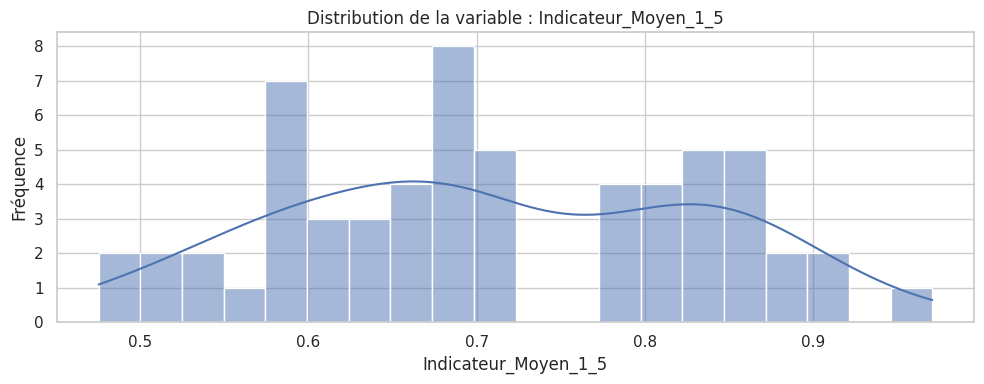

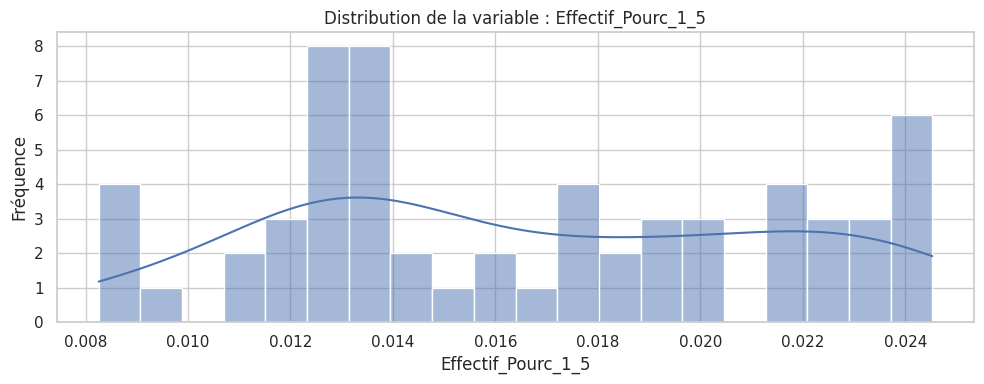

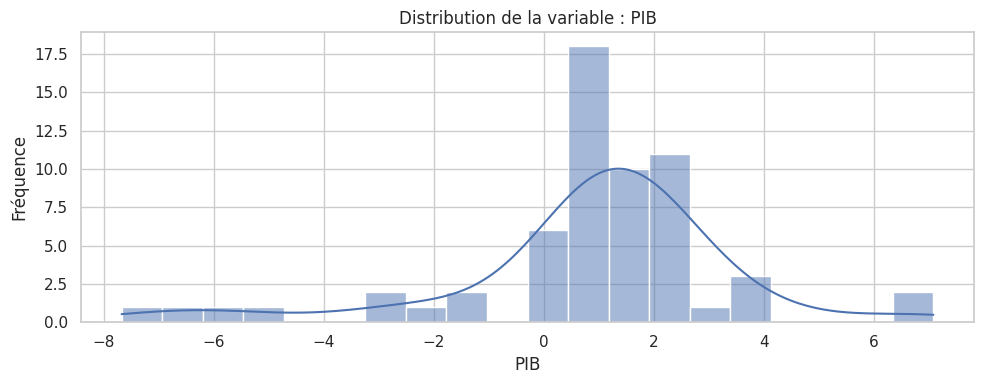

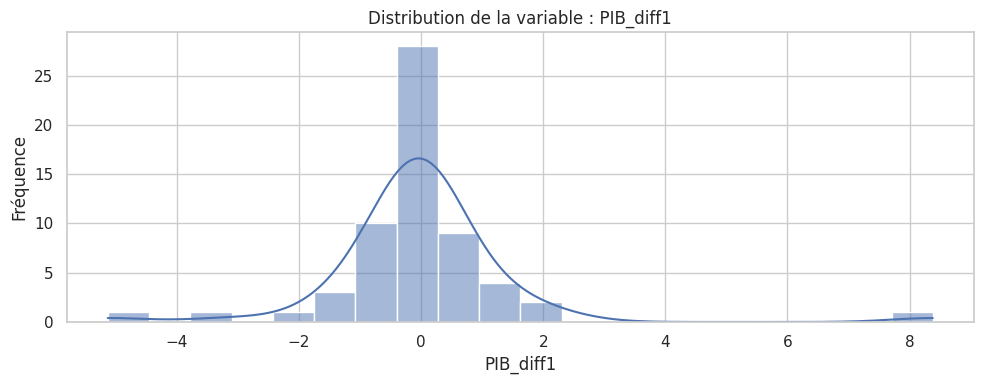

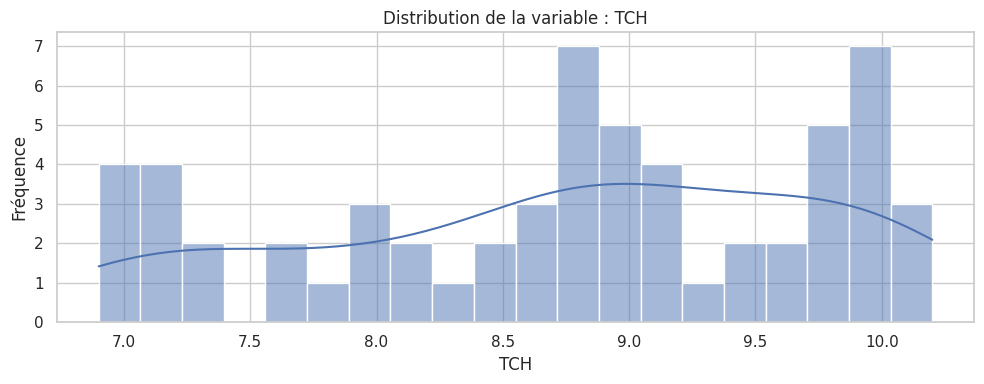

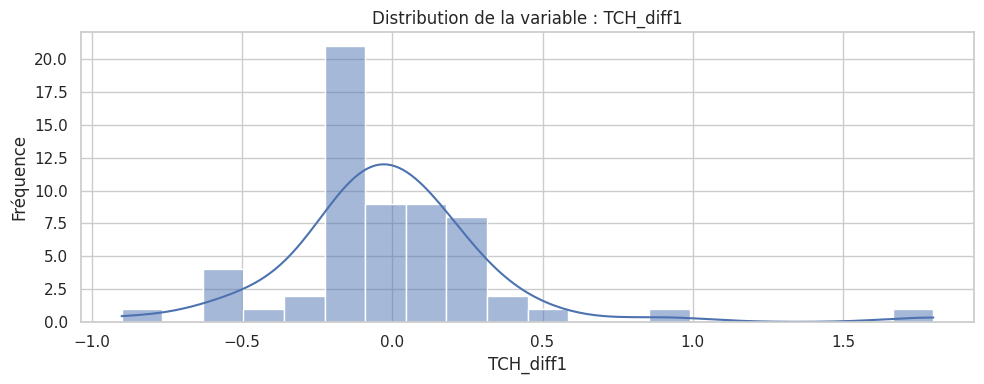

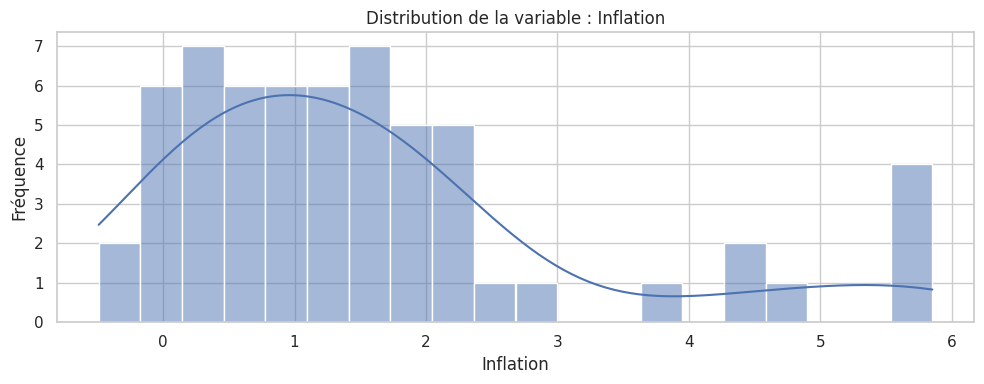

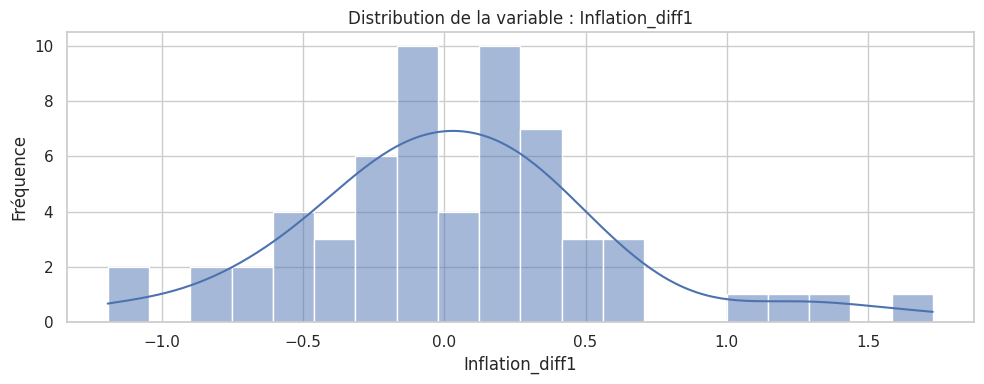

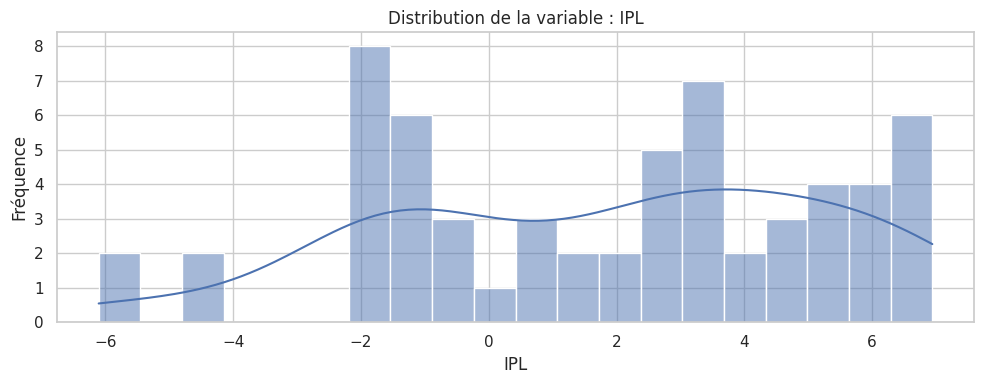

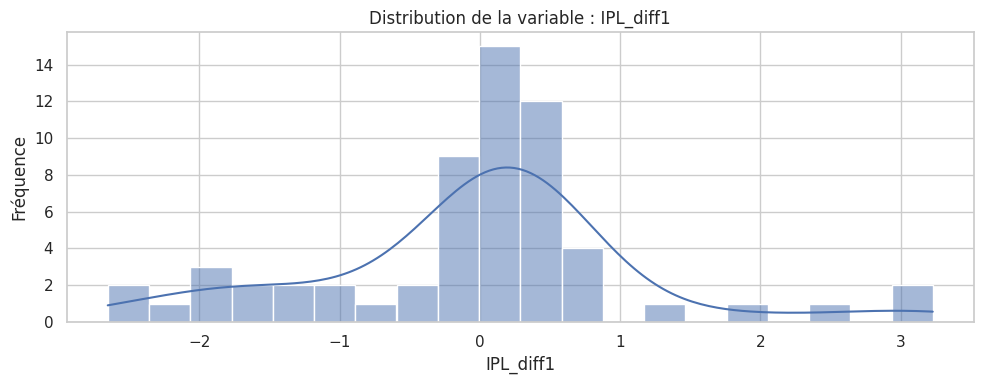

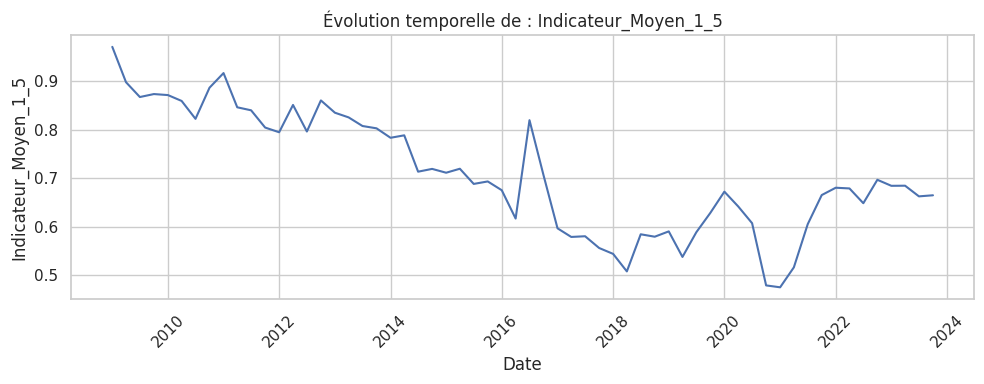

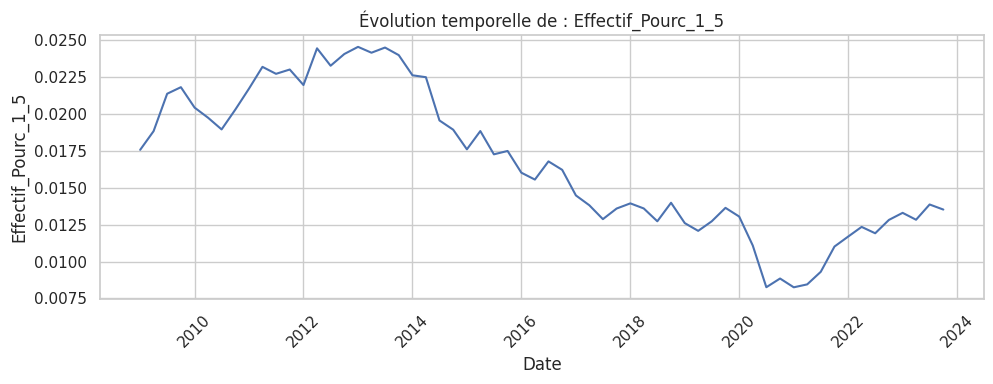

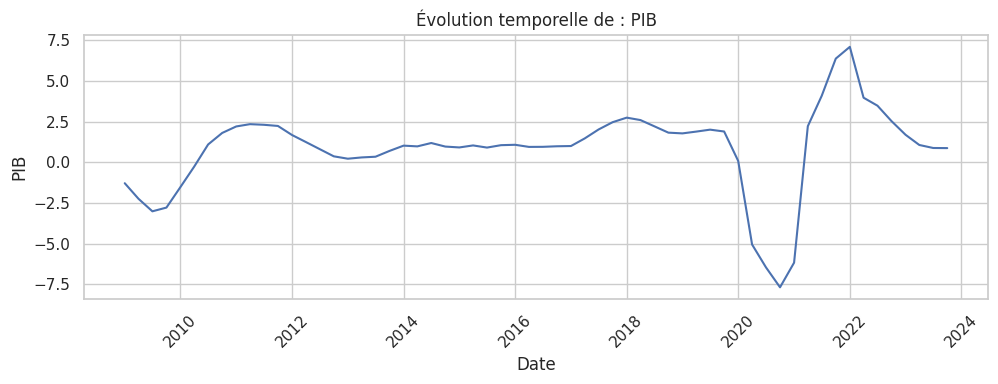

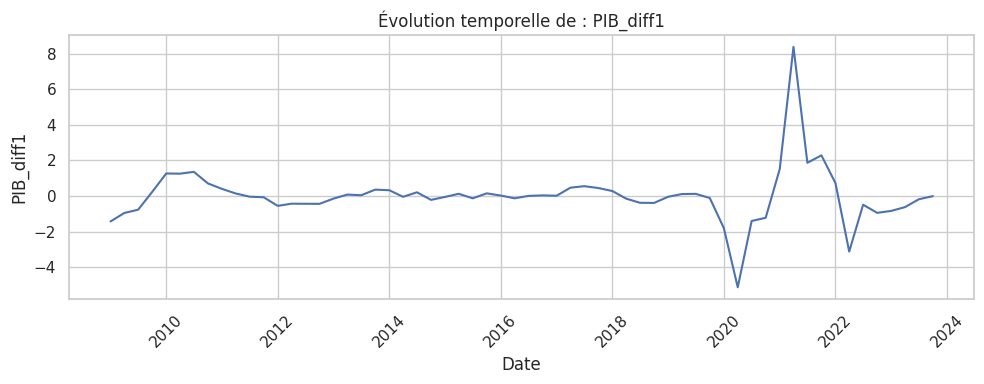

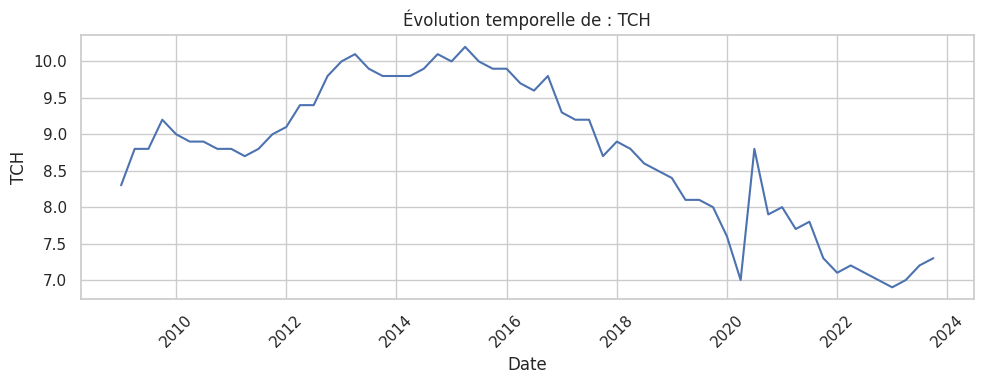

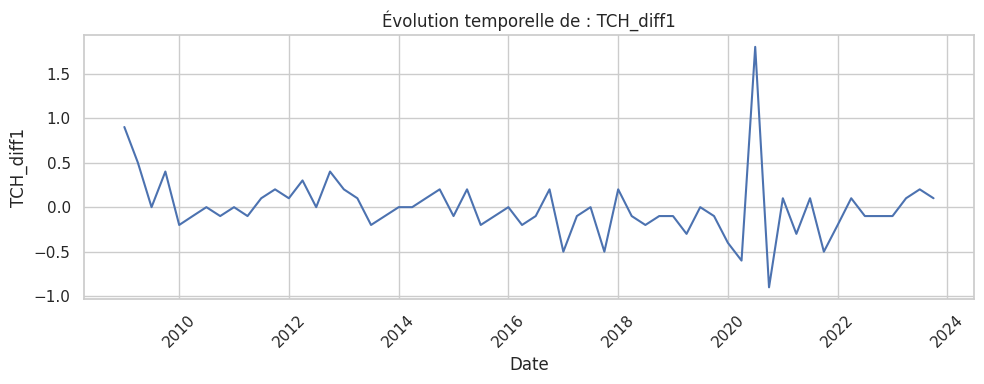

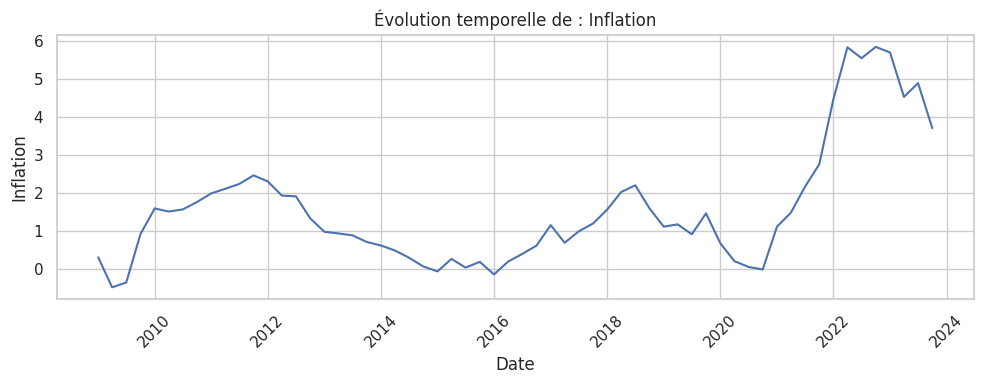

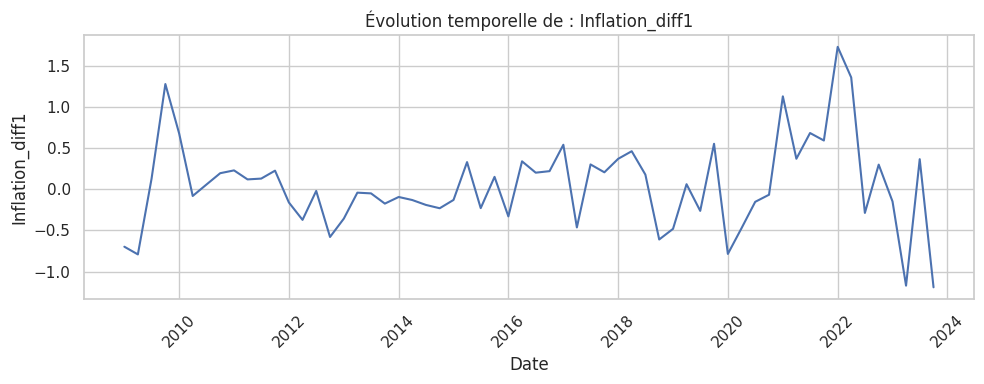

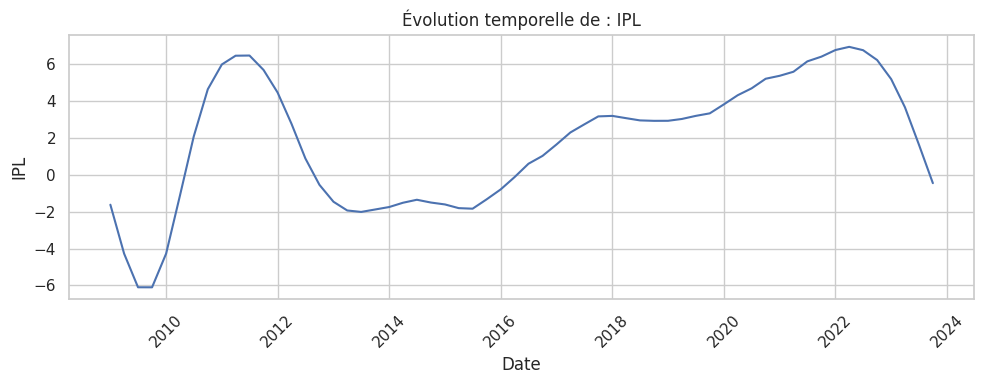

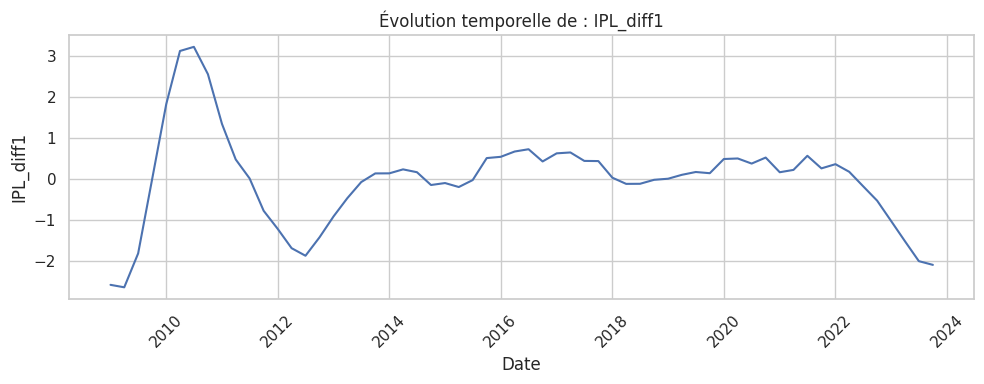

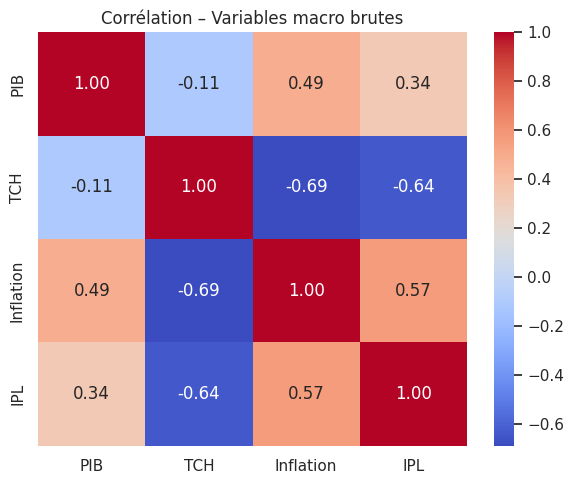

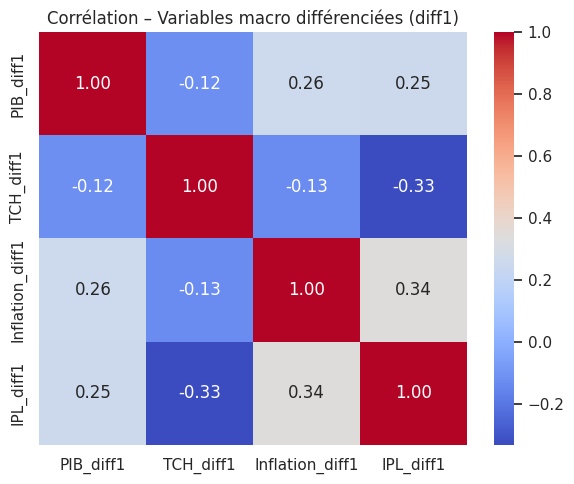

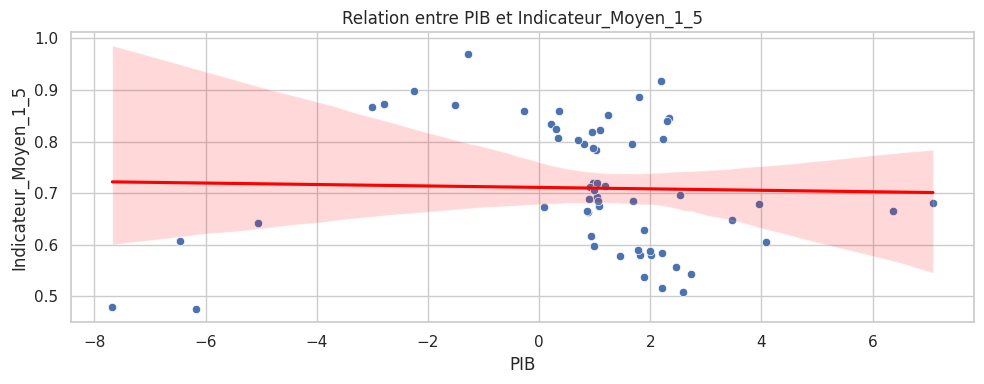

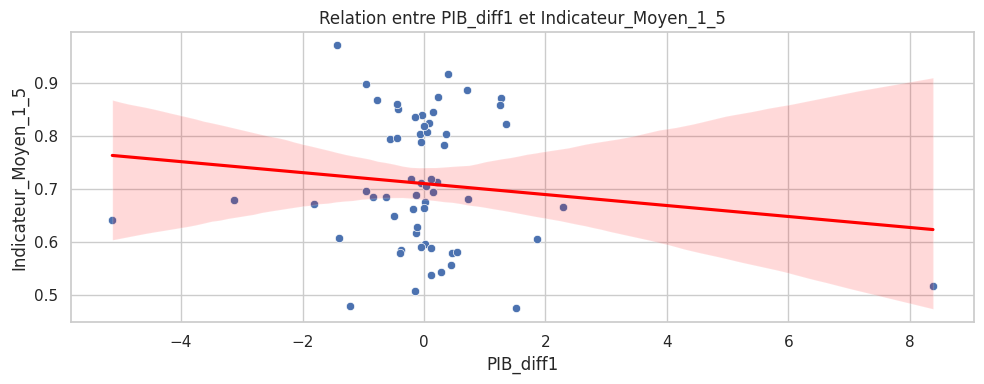

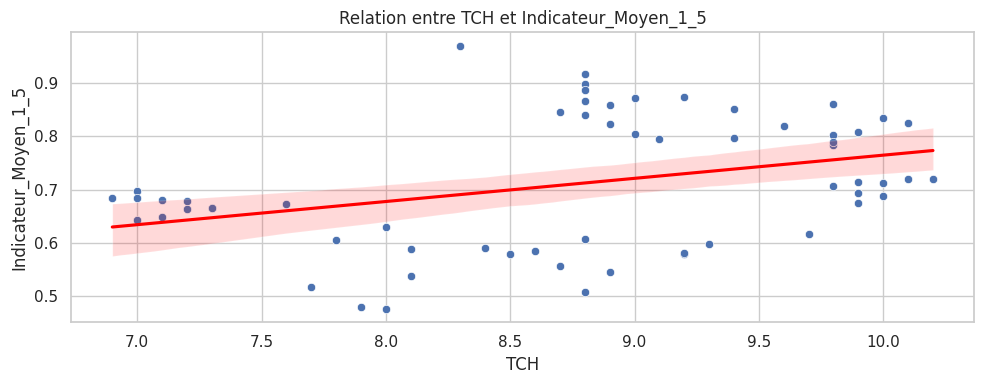

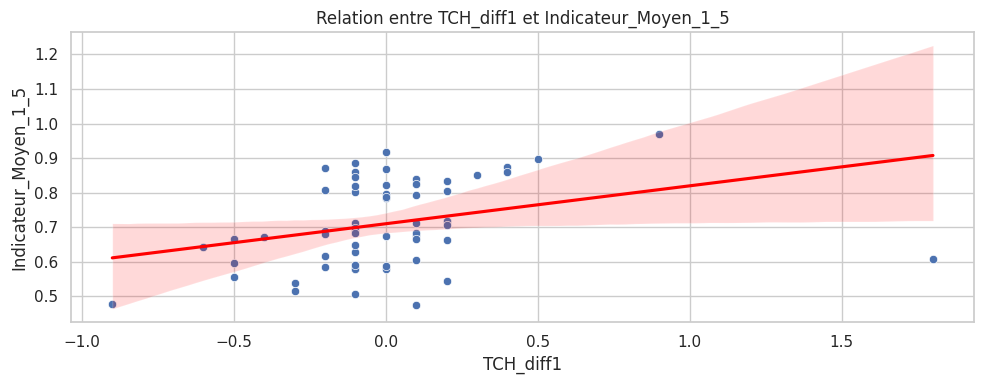

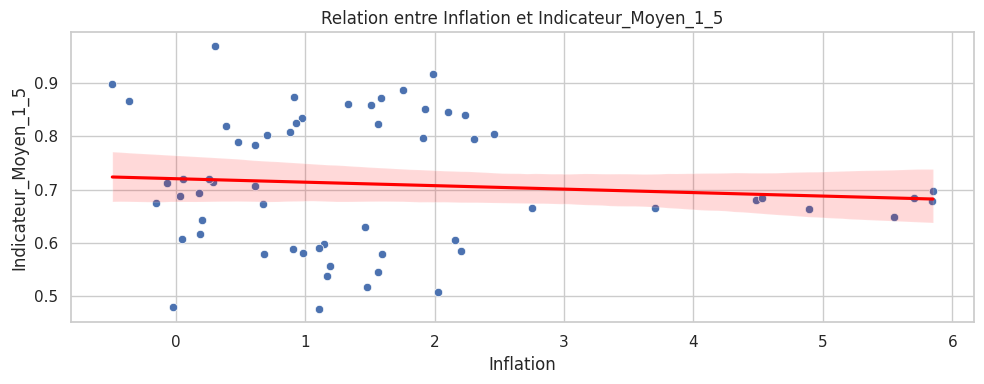

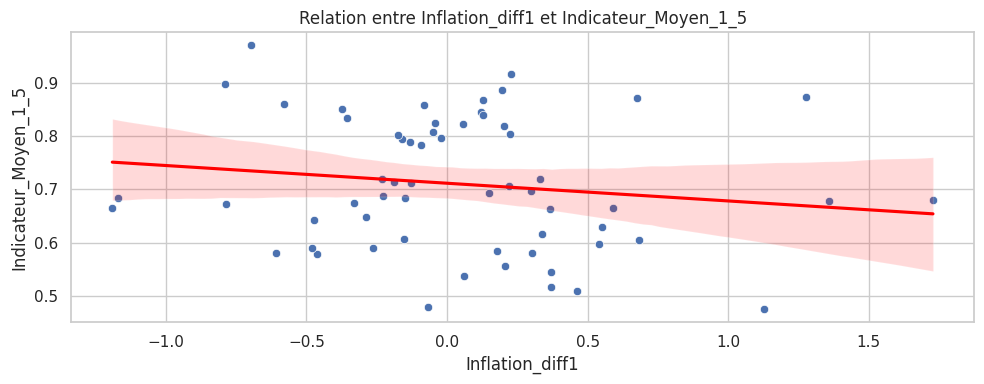

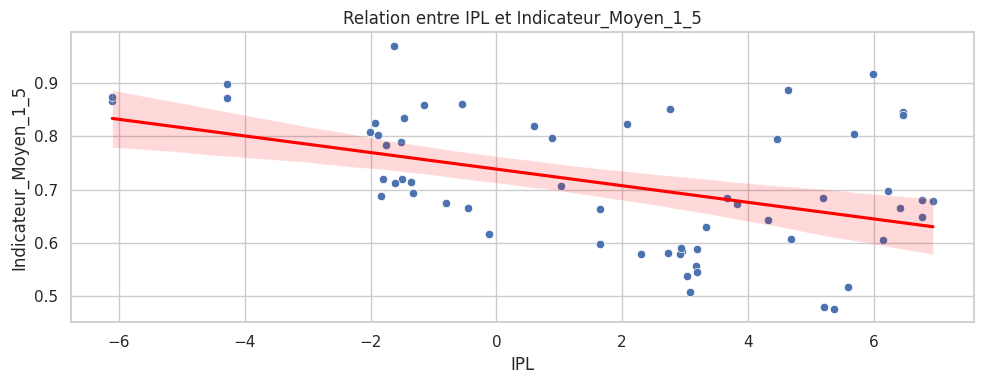

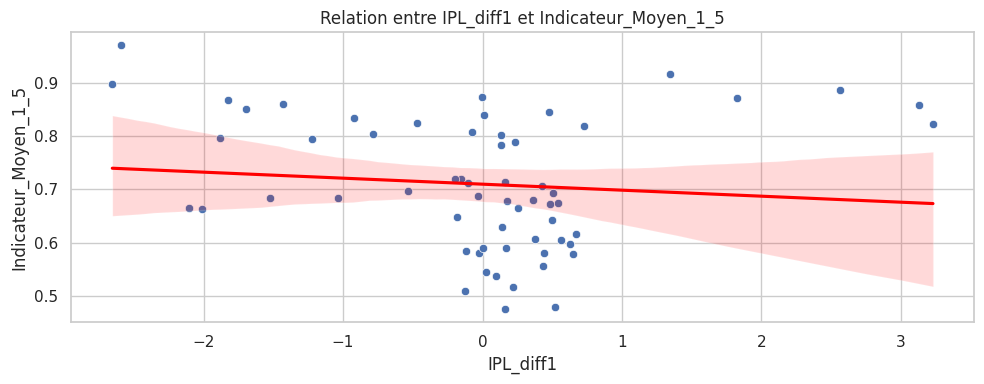

In [ ]:
# Configuration générale des graphiques
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# Étape 1 : Visualisation des distributions des variables numériques
# Objectif : vérifier la symétrie, la présence d’outliers ou de skewness
for col in df_merged.columns:
    if col != "date":
        plt.figure()
        sns.histplot(df_merged[col], kde=True, bins=20)
        plt.title(f"Distribution de la variable : {col}")
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.tight_layout()
        plt.show()

# Étape 2 : Évolution temporelle des variables
# Objectif : observer les tendances saisonnières, ruptures ou chocs économiques
for col in df_merged.columns:
    if col != "date":
        plt.figure()
        sns.lineplot(data=df_merged, x="date", y=col)
        plt.title(f"Évolution temporelle de : {col}")
        plt.xlabel("Date")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Étape 3 : Corrélations entre variables
# Objectif : détecter les dépendances linéaires entre les variables
# Définition des deux groupes de variables brutes et diff1
vars_brutes = ['PIB', 'TCH', 'Inflation', 'IPL']
vars_diff1  = ['PIB_diff1', 'TCH_diff1', 'Inflation_diff1', 'IPL_diff1']

# Matrice de corrélation - variables brutes
plt.figure(figsize=(6, 5))
cor_brutes = df_merged[vars_brutes].corr()
sns.heatmap(cor_brutes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation – Variables macro brutes")
plt.tight_layout()
plt.show()

# Matrice de corrélation - variables différenciées
plt.figure(figsize=(6, 5))
cor_diff1 = df_merged[vars_diff1].corr()
sns.heatmap(cor_diff1, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation – Variables macro différenciées (diff1)")
plt.tight_layout()
plt.show()
# Étape 4 : Relations bivariées entre variable cible et variables explicatives
# Ici, on suppose que 'Indicateur_Moyen_1_5' est une variable cible
for col in ['PIB', 'PIB_diff1', 'TCH', 'TCH_diff1', 'Inflation', 'Inflation_diff1', 'IPL', 'IPL_diff1']:
    plt.figure()
    sns.scatterplot(data=df_merged, x=col, y='Indicateur_Moyen_1_5')
    sns.regplot(data=df_merged, x=col, y='Indicateur_Moyen_1_5', scatter=False, color='red')
    plt.title(f"Relation entre {col} et Indicateur_Moyen_1_5")
    plt.xlabel(col)
    plt.ylabel("Indicateur_Moyen_1_5")
    plt.tight_layout()
    plt.show()



# Visualisation des données df_merged_segment

In [ ]:
df_merged_segment.columns

Index(['cod_prd_ref', 'Segment', 'CCF_seg', 'Poids_seg', 'PourcNoteCohorte',
       'PourcNoteCohorte5', 'date', 'PIB', 'IPL', 'TCH', 'Inflation',
       'PIB_diff1', 'IPL_diff1', 'TCH_diff1', 'Inflation_diff1'],
      dtype='object')

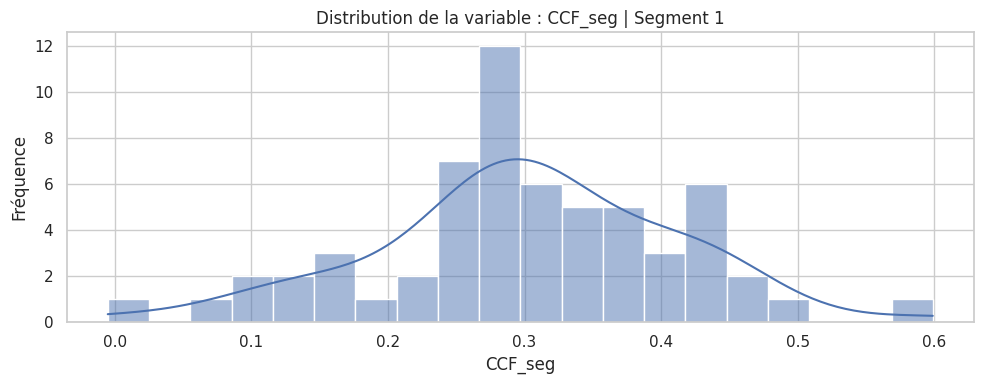

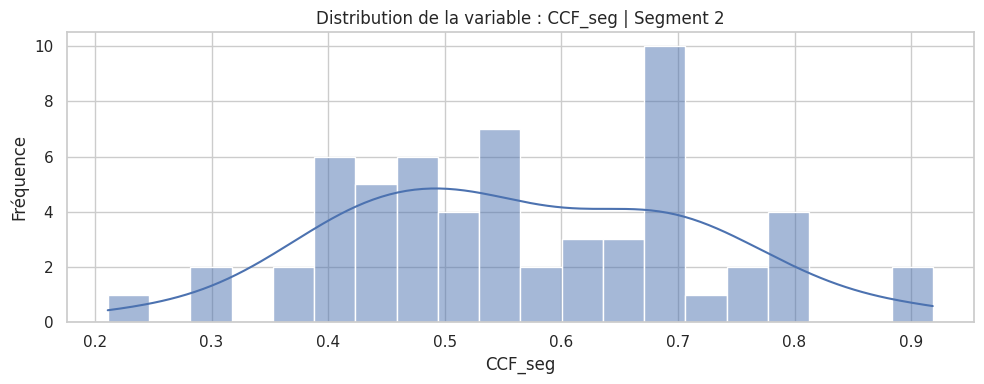

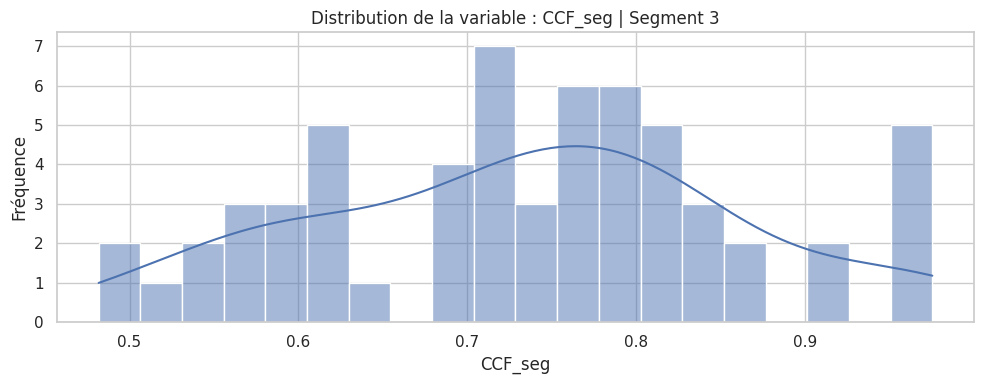

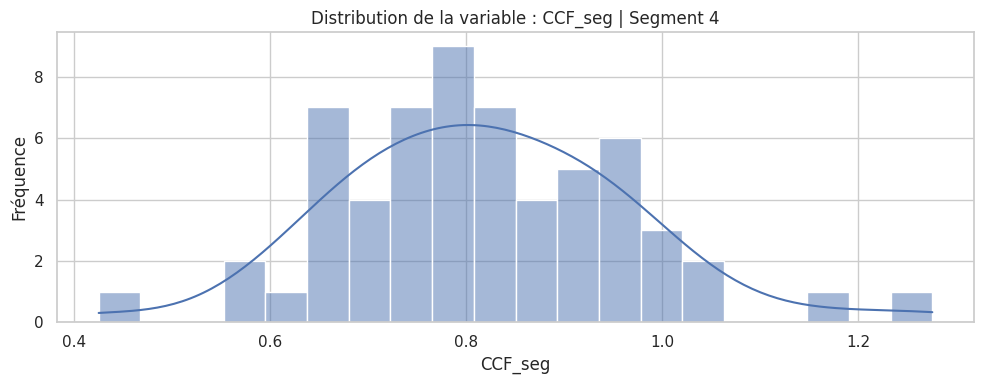

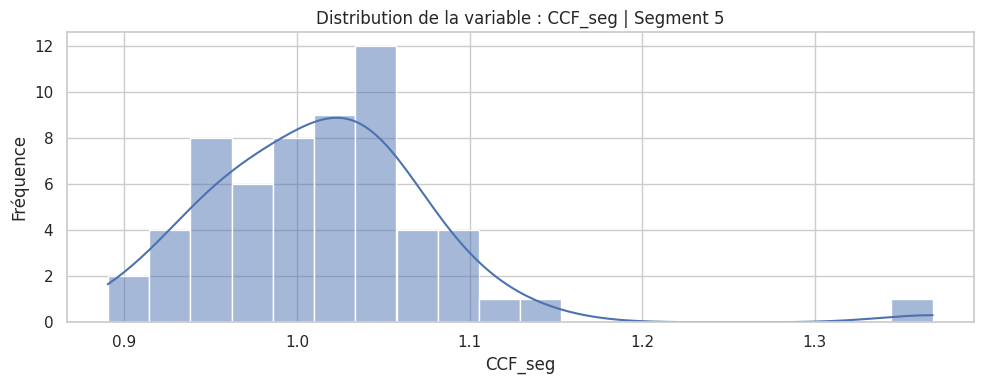

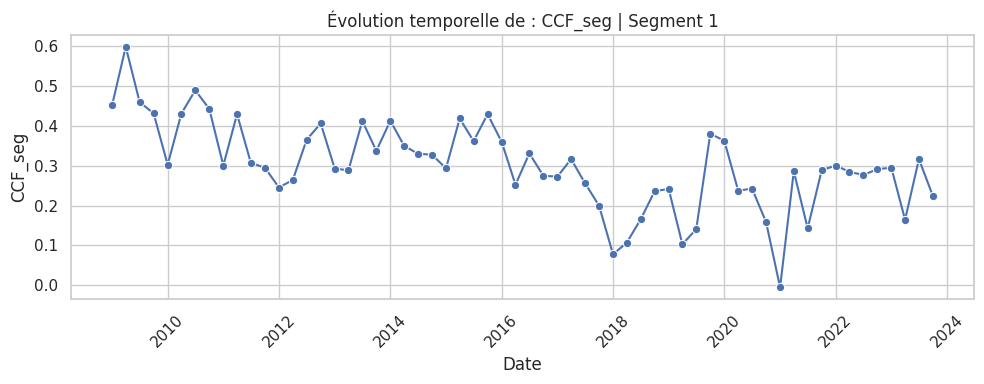

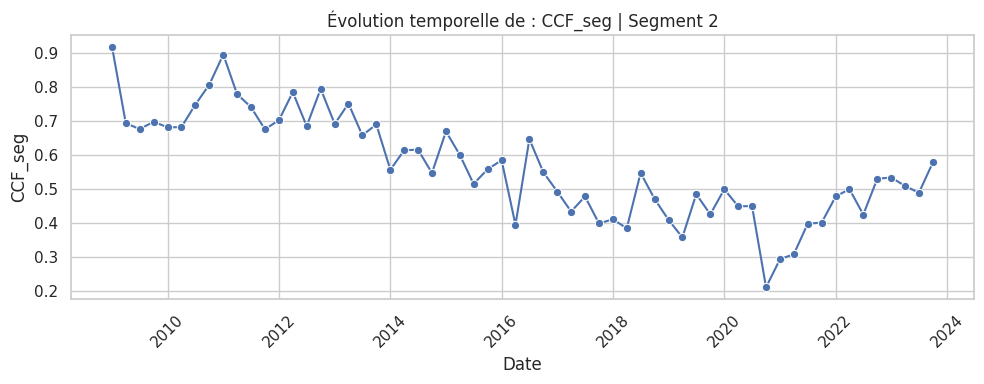

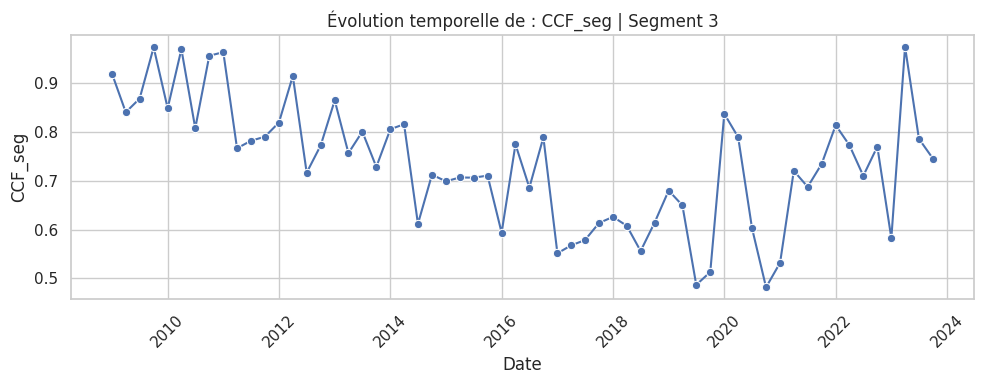

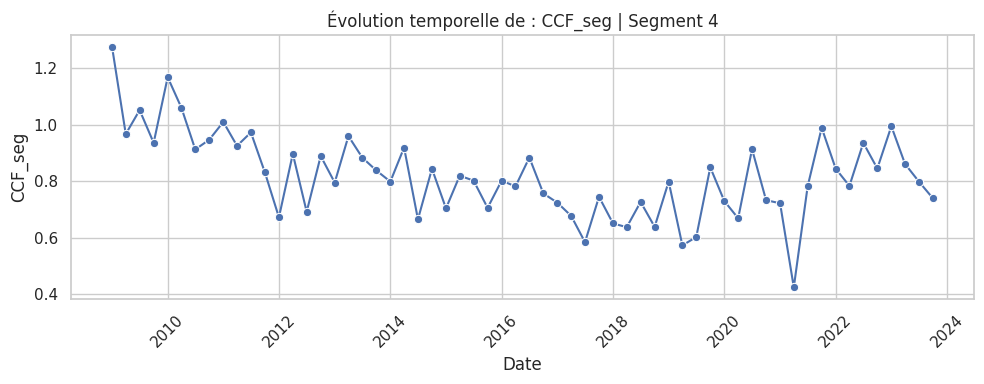

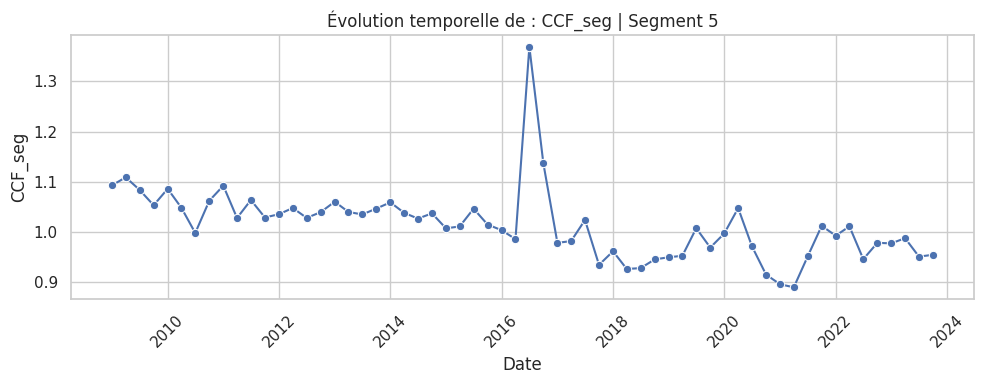

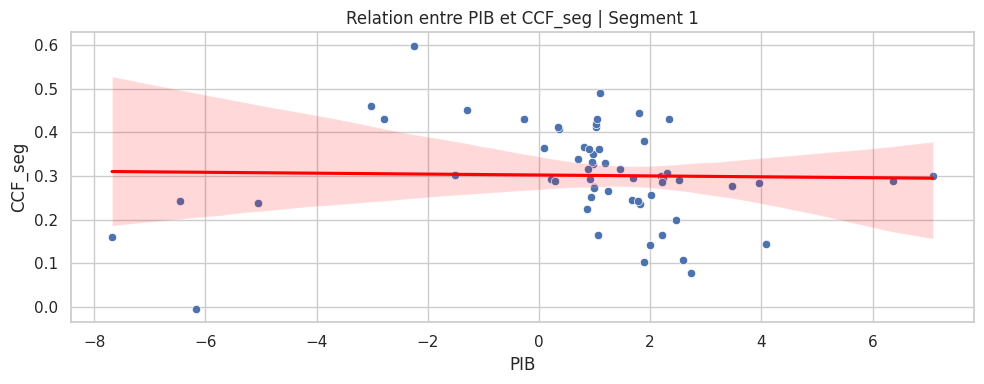

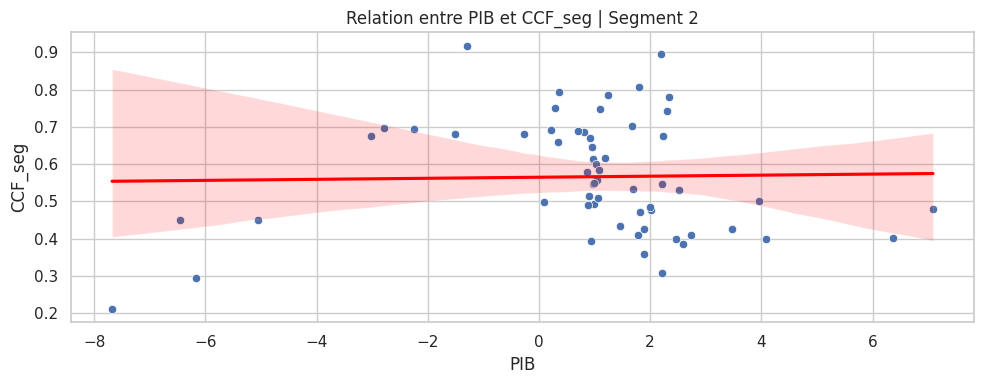

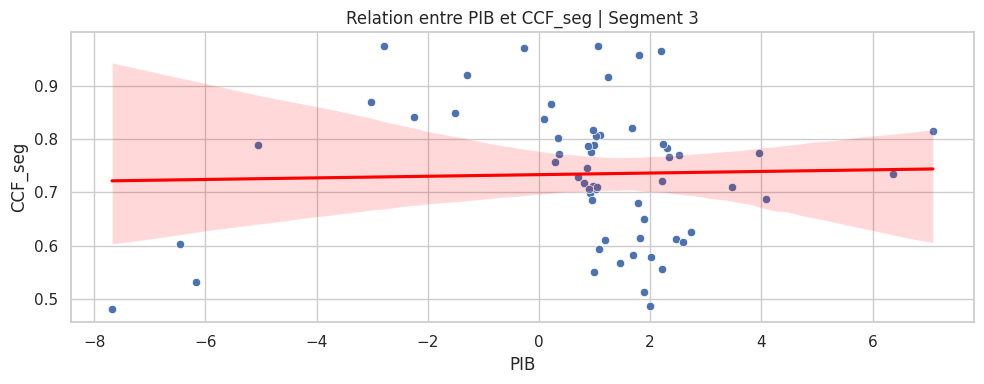

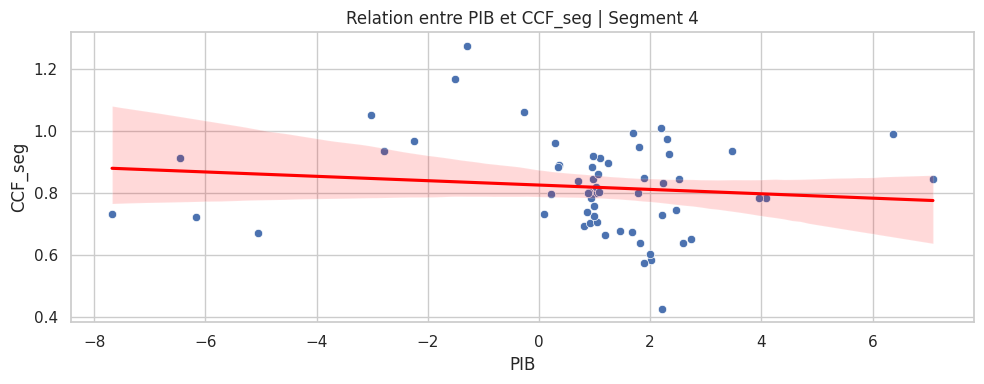

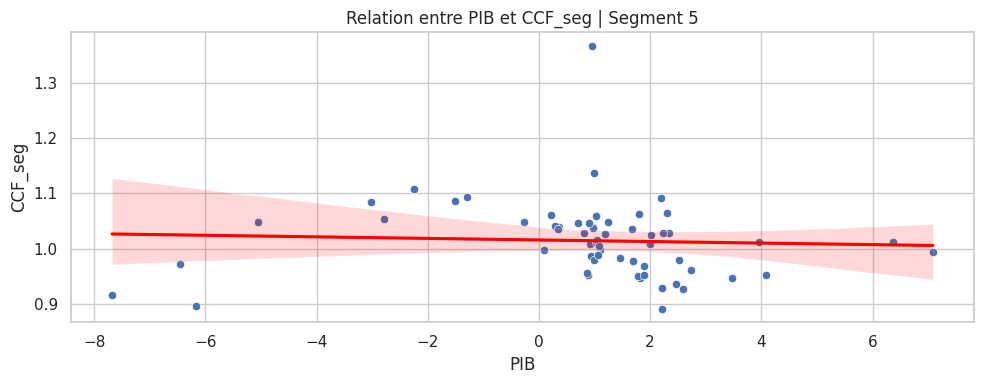

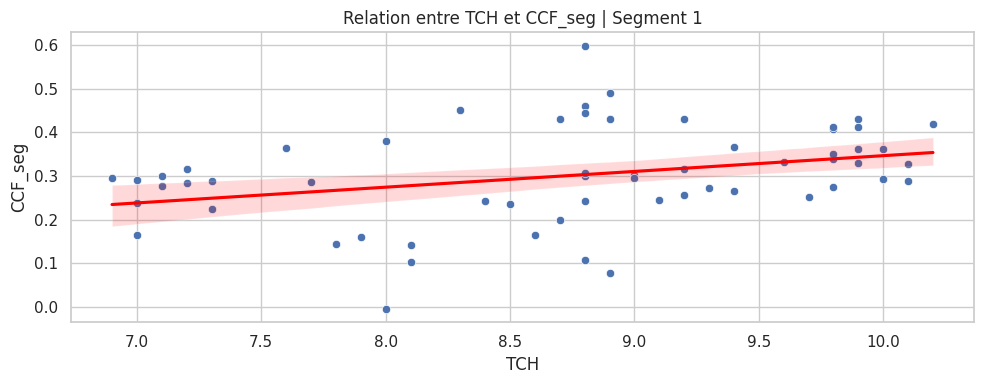

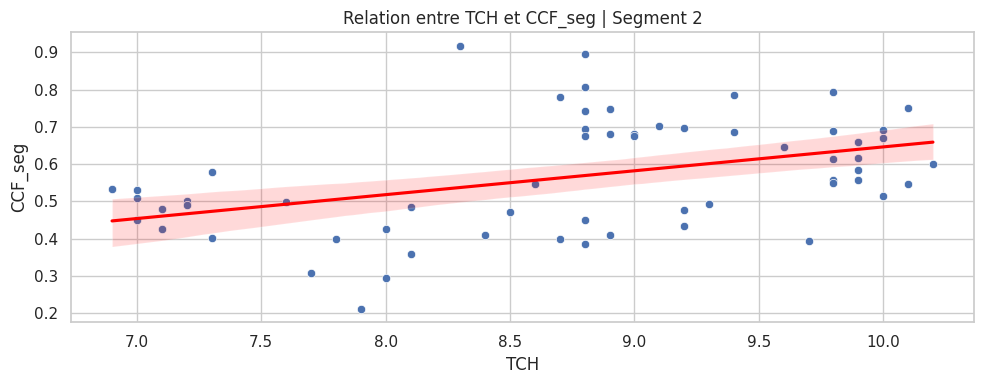

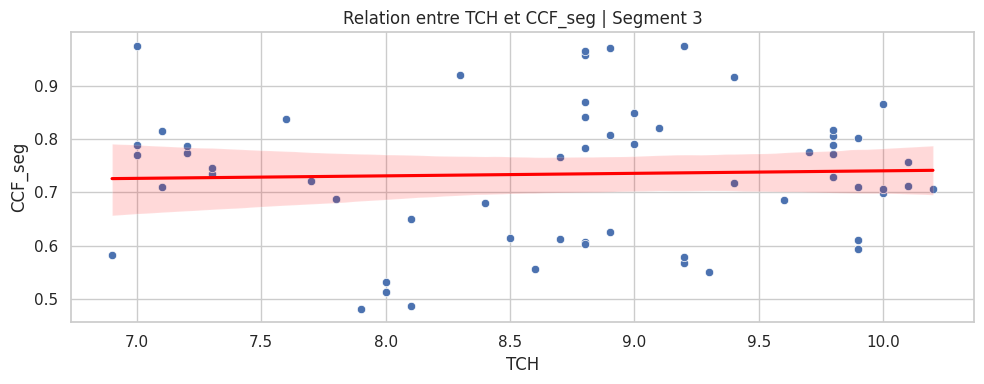

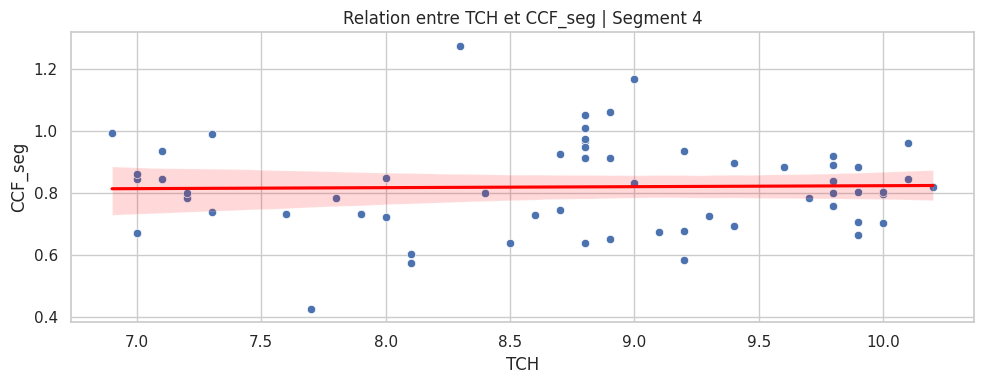

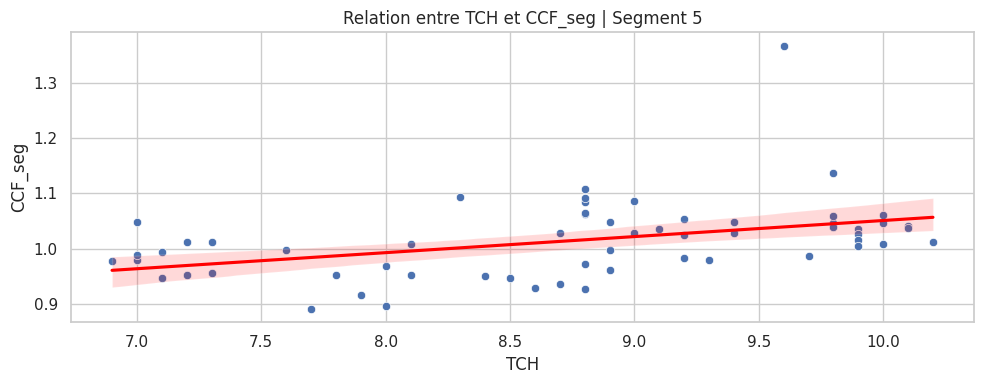

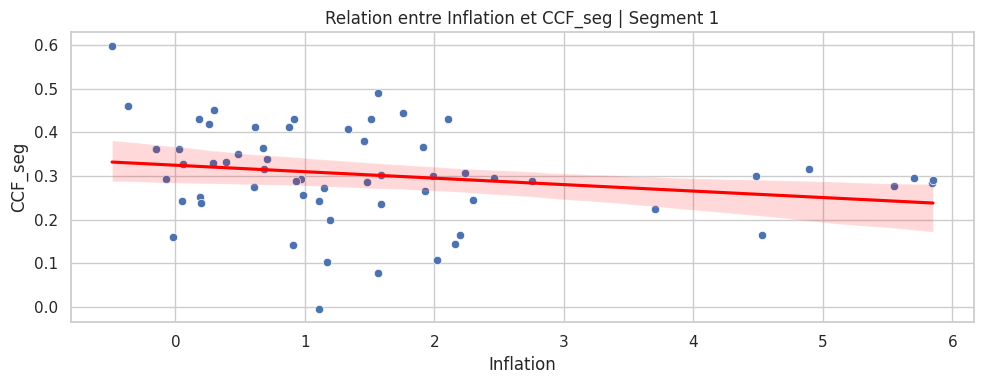

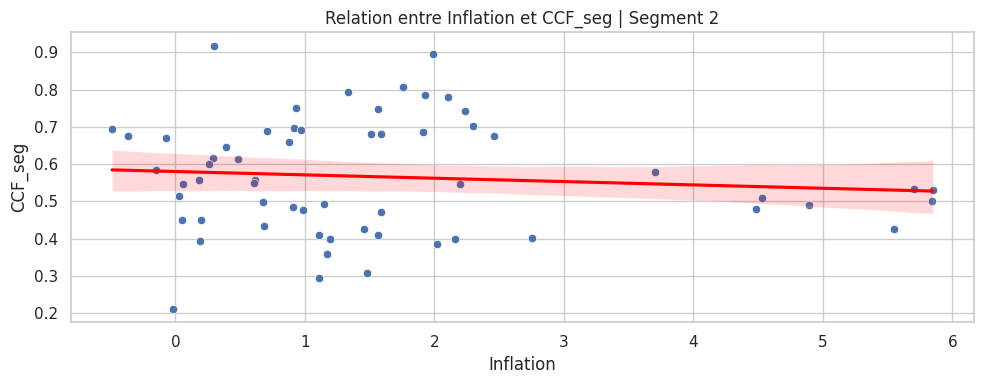

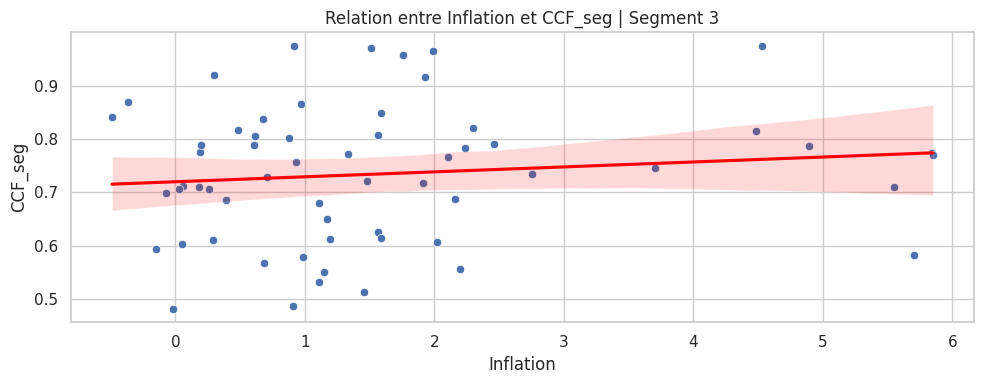

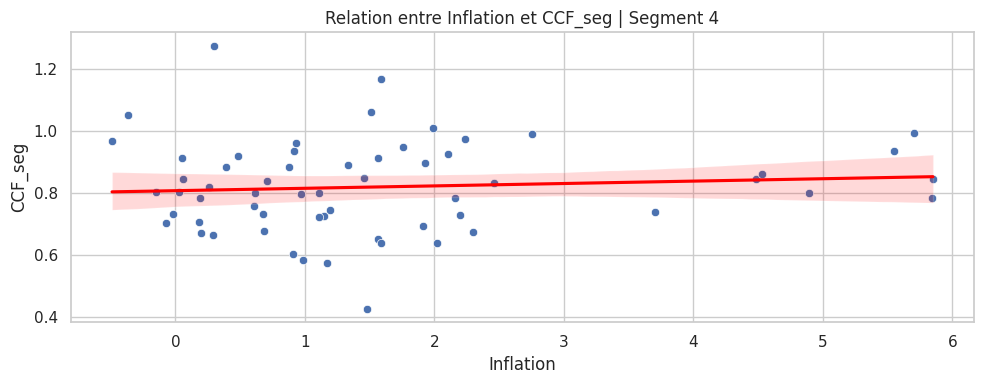

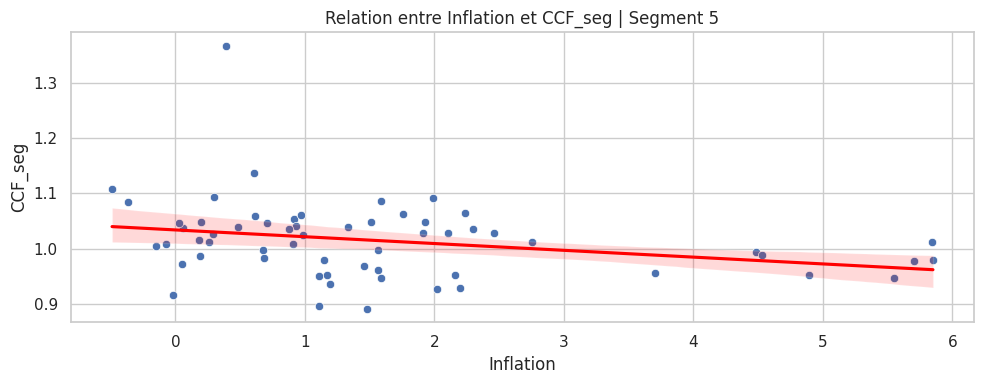

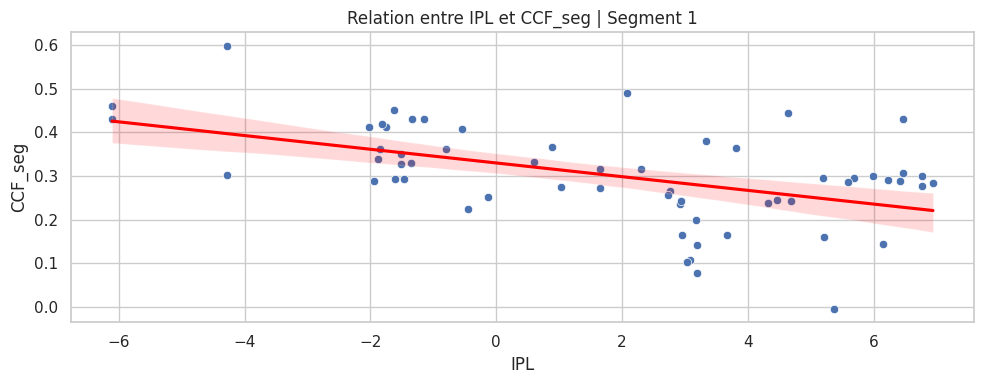

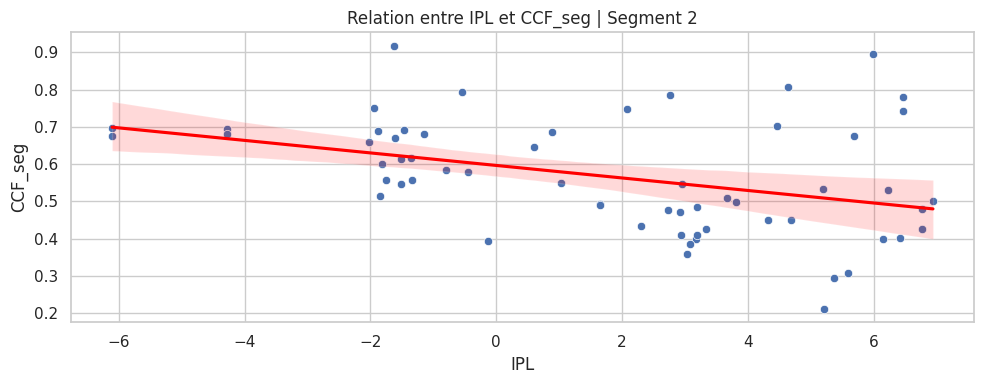

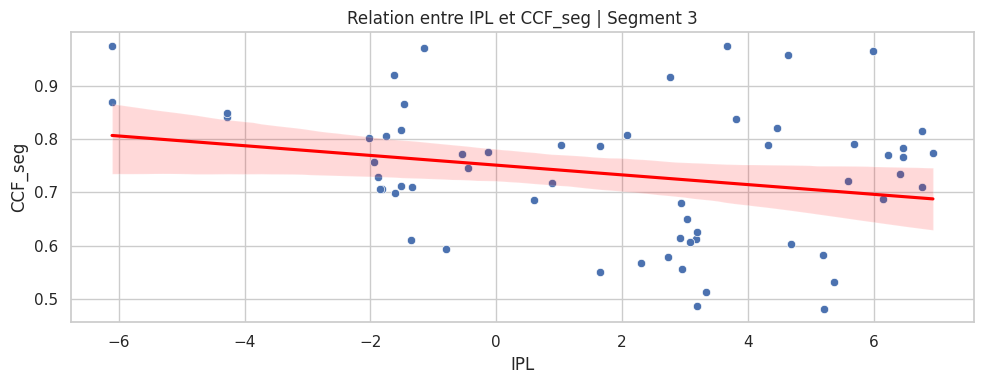

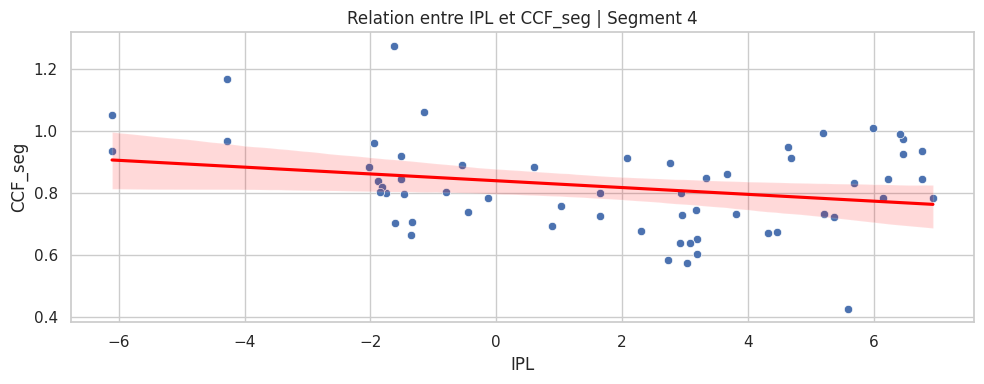

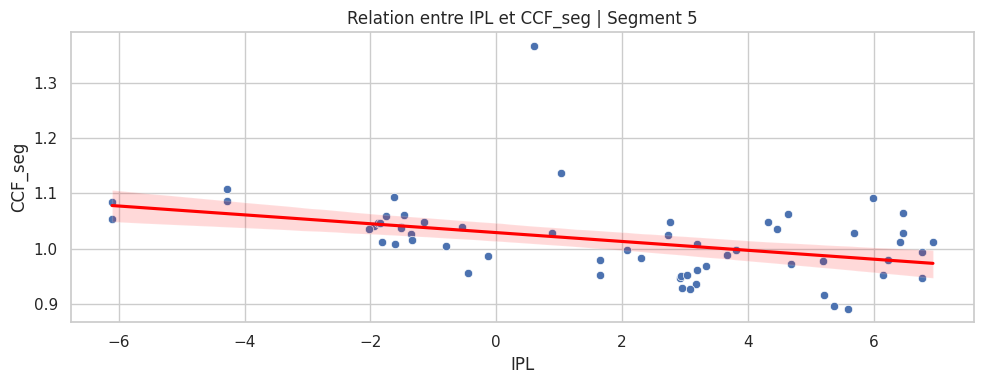

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# Liste des segments à tracer individuellement
segments = df_merged_segment["Segment"].unique()

# ÉTAPE 1 – Distribution des variables numériques par segment
for col in df_merged_segment.columns:
    if col in ['CCF_seg']:
        for seg in segments:
            plt.figure()
            data_seg = df_merged_segment[df_merged_segment["Segment"] == seg]
            sns.histplot(data=data_seg, x=col, kde=True, bins=20)
            plt.title(f"Distribution de la variable : {col} | Segment {seg}")
            plt.xlabel(col)
            plt.ylabel("Fréquence")
            plt.tight_layout()
            plt.show()

# ÉTAPE 2 – Évolution temporelle des variables par segment
for col in df_merged_segment.columns:
    if col in ['CCF_seg']:
        for seg in segments:
            plt.figure()
            data_seg = df_merged_segment[df_merged_segment["Segment"] == seg]
            sns.lineplot(data=data_seg, x="date", y=col, marker="o")
            plt.title(f"Évolution temporelle de : {col} | Segment {seg}")
            plt.xlabel("Date")
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# ÉTAPE 3 – Relations bivariées avec CCF_seg, par segment
for col in ['PIB', 'TCH', 'Inflation', 'IPL']:
    for seg in segments:
        plt.figure()
        data_seg = df_merged_segment[df_merged_segment["Segment"] == seg]
        sns.scatterplot(data=data_seg, x=col, y='CCF_seg')
        sns.regplot(data=data_seg, x=col, y='CCF_seg', scatter=False, color='red')
        plt.title(f"Relation entre {col} et CCF_seg | Segment {seg}")
        plt.xlabel(col)
        plt.ylabel("CCF_seg")
        plt.tight_layout()
        plt.show()

# Tests statisques pour df_merged

## Tests statistiques essentiels

### 1. Test de stationnarité (obligatoire)

- **But** : Vérifier si les séries temporelles sont stables dans le temps (moyenne, variance et autocorrélation constantes).
- **Tests utilisés** :
  - Augmented Dickey-Fuller (ADF)
  - KPSS (test contraire à l’hypothèse de stationnarité)
  - Phillips-Perron (PP)

> Si une série est non-stationnaire, il convient d’appliquer une différenciation (différence première) ou d’évaluer la présence de cointégration avec d’autres séries.

---

### 2. Test de cointégration (essentiel pour VECM)

- **But** : Déterminer si des séries non-stationnaires peuvent former une combinaison linéaire stationnaire.
- **Tests utilisés** :
  - Test de Johansen (le plus adapté au VECM multivarié)
  - Test d’Engle-Granger (cas de deux séries)

> En cas de cointégration, on peut utiliser un modèle VECM. Sinon, il est préférable d’appliquer un VAR sur les séries différenciées.

---

### 3. Test d'autocorrélation (résidus ou séries brutes)

- **But** : Détecter la présence de dépendance temporelle (lags).
- **Tests utilisés** :
  - Durbin-Watson
  - Ljung-Box (sur les résidus d’un modèle)

> Permet de vérifier l’hypothèse du bruit blanc (white noise) des erreurs dans un modèle.

---

### 4. Test d’hétéroscédasticité (volatilité non constante)

- **But** : Vérifier si la variance des erreurs reste constante dans le temps.
- **Tests utilisés** :
  - Test ARCH (Engle)
  - Test de Breusch-Pagan (modèles linéaires)

> En cas d’hétéroscédasticité, envisager l’usage de modèles GARCH ou d’erreurs robustes.

---

### 5. Test de normalité (sur les résidus)

- **But** : Vérifier l’hypothèse de normalité des erreurs du modèle.
- **Tests utilisés** :
  - Test de Jarque-Bera
  - Test de Shapiro-Wilk

---

### 6. Test de colinéarité / multicolinéarité (avant la modélisation)

- **But** : Détecter les relations linéaires fortes entre les variables explicatives.
- **Tests utilisés** :
  - VIF (Variance Inflation Factor)
  - Matrice de corrélation

> Utile pour sélectionner les variables, éviter l’overfitting et améliorer la stabilité du modèle.


In [ ]:
# Étape 0 : On fixe l’index temporel
df = df_merged.set_index('date')
variables = df.columns.tolist()
display(df)

Indicateur_Moyen_1_5  Effectif_Pourc_1_5       PIB  PIB_diff1  \
date                                                                        
2009-01-01              0.970606            0.017557 -1.286788  -1.430885   
2009-04-01              0.897803            0.018823 -2.243102  -0.956314   
2009-07-01              0.867302            0.021353 -3.012266  -0.769164   
2009-10-01              0.873421            0.021797 -2.782833   0.229433   
2010-01-01              0.871323            0.020415 -1.517665   1.265167   
2010-04-01              0.859261            0.019732 -0.263588   1.254077   
2010-07-01              0.822388            0.018939  1.092998   1.356586   
2010-10-01              0.886490            0.020280  1.799343   0.706346   
2011-01-01              0.916627            0.021703  2.198821   0.399477   
2011-04-01              0.846177            0.023173  2.339377   0.140557   
2011-07-01              0.839968            0.022700  2.301174  -0.038203   
2011-10-01              0.804475            0.022992  2.229597  -0.071577   
2012-01-01              0.794789            0.021942  1.674949  -0.554648   
2012-04-01              0.850995            0.024426  1.242017  -0.432932   
2012-07-01              0.796300            0.023248  0.804715  -0.437303   
2012-10-01              0.860342            0.024042  0.363708  -0.441006   
2013-01-01              0.835020            0.024525  0.217978  -0.145730   
2013-04-01              0.825385            0.024129  0.296295   0.078317   
2013-07-01              0.807648            0.024479  0.339871   0.043576   
2013-10-01              0.802876            0.023966  0.697479   0.357608   
2014-01-01              0.783408            0.022601  1.020546   0.323067   
2014-04-01              0.788454            0.022473  0.975386  -0.045159   
2014-07-01              0.713621            0.019546  1.181895   0.206509   
2014-10-01              0.719343            0.018922  0.963355  -0.218540   
2015-01-01              0.711457            0.017592  0.909806  -0.053549   
2015-04-01              0.719664            0.018829  1.033505   0.123699   
2015-07-01              0.688421            0.017254  0.901572  -0.131933   
2015-10-01              0.693520            0.017482  1.049129   0.147557   
2016-01-01              0.675430            0.016012  1.072991   0.023862   
2016-04-01              0.617087            0.015546  0.942824  -0.130167   
2016-07-01              0.819663            0.016776  0.947690   0.004866   
2016-10-01              0.706446            0.016205  0.981821   0.034131   
2017-01-01              0.596996            0.014473  0.996275   0.014454   
2017-04-01              0.579248            0.013808  1.463407   0.467132   
2017-07-01              0.580675            0.012869  2.014283   0.550875   
2017-10-01              0.556500            0.013586  2.460784   0.446501   
2018-01-01              0.544336            0.013936  2.739159   0.278375   
2018-04-01              0.508275            0.013592  2.590638  -0.148521   
2018-07-01              0.584713            0.012723  2.207764  -0.382874   
2018-10-01              0.579735            0.013977  1.817771  -0.389993   
2019-01-01              0.590687            0.012601  1.772737  -0.045035   
2019-04-01              0.538083            0.012076  1.882538   0.109801   
2019-07-01              0.588969            0.012723  2.002164   0.119626   
2019-10-01              0.628831            0.013633  1.888406  -0.113757   
2020-01-01              0.672488            0.013044  0.081567  -1.806840   
2020-04-01              0.641970            0.011085 -5.049860  -5.131427   
2020-07-01              0.607514            0.008263 -6.455276  -1.405416   
2020-10-01              0.479467            0.008852 -7.678693  -1.223417   
2021-01-01              0.475551            0.008257 -6.166529   1.512164   
2021-04-01              0.516614            0.008455  2.213321   8.379850   
2021-07-

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

###############################################################################
#  Tests statistiques essentiels avant la modélisation CCF / VECM
#  DataFrame d’entrée : df_merged (doit déjà être chargé dans votre notebook)
#  Colonnes numériques attendues (exemple) :
#  ['Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5',
#   'PIB', 'PIB_diff1', 'TCH', 'TCH_diff1',
#   'Inflation', 'Inflation_diff1', 'IPL', 'IPL_diff1']
#
#  ▸ Chaque bloc imprime : p-values, décision (stationnaire / non-stationnaire…),
#    puis un petit conseil d’interprétation en français.
#  ▸ Les commentaires sont en français ; aucune donnée n’est générée.
###############################################################################

# ---------------------------------------------------------------------------
# 1)  Tests de stationnarité : ADF, KPSS, PP
# ---------------------------------------------------------------------------

# ---------------------------------------------------------------------------
# 1)  Tests de stationnarité : ADF, KPSS, PP (via arch.unitroot)
# ---------------------------------------------------------------------------

from arch.unitroot import PhillipsPerron  # import corrigé

def test_stationnarite(serie: pd.Series, nom: str, alpha: float = 0.05):
    """Applique ADF, KPSS et PP sur une série et imprime le résultat."""
    s = serie.dropna()
    print(f"\n--- Stationnarité pour {nom} ---")

    # Augmented Dickey-Fuller
    adf_stat, adf_p, *_ = adfuller(s, autolag="AIC")
    print(f"ADF      : p-value = {adf_p: .4f}  => "
          f"{'Stationnaire' if adf_p < alpha else 'Non-stationnaire'}")

    # KPSS (H0 = stationnaire)
    kpss_stat, kpss_p, *_ = kpss(s, regression='c', nlags="auto")
    print(f"KPSS     : p-value = {kpss_p: .4f}  => "
          f"{'Non-stationnaire' if kpss_p < alpha else 'Stationnaire'}")

    # Phillips-Perron (correction du code ici)
    pp_test = PhillipsPerron(s)
    pp_stat = pp_test.stat
    pp_p = pp_test.pvalue
    print(f"Phillips : p-value = {pp_p: .4f}  => "
          f"{'Stationnaire' if pp_p < alpha else 'Non-stationnaire'}")

    # Conseil rapide
    if (adf_p < alpha and kpss_p > alpha) or (pp_p < alpha and kpss_p > alpha):
        print("Conseil  : La série semble I(0) → pas de différenciation nécessaire.")
    else:
        print("Conseil  : Série probablement I(1). Envisager une différence première "
              "ou tester la cointégration avant VECM.")

# ---------------------------------------------------------------------------
# 2)  Test de cointégration (Johansen)
# ---------------------------------------------------------------------------

def test_coint_johansen(df: pd.DataFrame, alpha: float = 0.05):
    """Applique le test de Johansen sur l’ensemble des variables non-stationnaires."""
    df = df.dropna()
    print("\n=== Test de cointégration de Johansen ===")
    result = coint_johansen(df, det_order=0, k_ar_diff=1)    # sans constante
    traces = result.lr1        # statistiques trace
    crit   = result.cvt[:, 1]  # seuil 5 %
    for i, (trace_stat, crit_val) in enumerate(zip(traces, crit)):
        rank = i
        decision = "=> cointégration" if trace_stat > crit_val else "=> pas de cointégration"
        print(f"Rang <= {rank} : Trace = {trace_stat: .2f}, Crit 5 % = {crit_val: .2f}  {decision}")
    print("Conseil : choisissez le rang où la statistique dépasse le seuil pour construire le VECM.")

# ---------------------------------------------------------------------------
# 3)  Autocorrélation (Durbin-Watson + Ljung-Box)
# ---------------------------------------------------------------------------

def test_autocorrelation(serie: pd.Series, nom: str, lags: int = 12, alpha: float = 0.05):
    """Durbin-Watson & Ljung-Box pour détecter l’autocorrélation."""
    s = serie.dropna()
    print(f"\n--- Autocorrélation pour {nom} ---")

    # Durbin-Watson sur la différence pour atténuer les effets de tendance
    dw = durbin_watson(s.diff().dropna())
    print(f"Durbin-Watson = {dw: .3f} "
          "(≈2 ⇒ pas d’autocorrélation, <2 autocorr. positive, >2 négative)")

    # Ljung-Box avec correction
    lb_test = acorr_ljungbox(s, lags=[lags], return_df=True)
    lb_pval = lb_test['lb_pvalue'].iloc[0]
    print(f"Ljung-Box (lag {lags}) : p-value = {lb_pval:.4f}  => "
          f"{'Autocorrélation détectée' if lb_pval < alpha else 'Pas d’autocorrélation significative'}")

# ---------------------------------------------------------------------------
# 4)  Hétéroscédasticité (ARCH & Breusch-Pagan)
# ---------------------------------------------------------------------------

def test_heteroscedasticite(serie: pd.Series, nom: str, alpha: float = 0.05):
    """ARCH LM + Breusch-Pagan avec variable explicative elle-même."""
    s = serie.dropna()
    print(f"\n--- Hétéroscédasticité pour {nom} ---")

    # Test ARCH de Engle (résidus au carré selon les retards)
    arch_stat, arch_p, _, _ = het_arch(s)
    print(f"ARCH LM        : p-value = {arch_p: .4f}  => "
          f"{'Hétéroscédasticité' if arch_p < alpha else 'Homoscedasticité'}")

    # Breusch-Pagan (on utilise la série elle-même comme variable explicative)
    X = sm.add_constant(s.values.reshape(-1, 1))  # reshape nécessaire pour une seule variable
    ols_res = sm.OLS(s, X).fit()
    bp_stat, bp_p, *_ = het_breuschpagan(ols_res.resid, X)
    print(f"Breusch-Pagan  : p-value = {bp_p: .4f}  => "
          f"{'Hétéroscédasticité' if bp_p < alpha else 'Homoscedasticité'}")

# ---------------------------------------------------------------------------
# 5)  Normalité (Jarque-Bera & Shapiro-Wilk)
# ---------------------------------------------------------------------------

def test_normalite(serie: pd.Series, nom: str, alpha: float = 0.05):
    """Test de normalité de Jarque-Bera et Shapiro-Wilk (si <5000 obs)."""
    s = serie.dropna()
    print(f"\n--- Normalité pour {nom} ---")

    # Jarque-Bera
    # jb_stat, jb_p = jarque_bera(s)
    jb_stat, jb_p, _, _ = jarque_bera(s)
    print(f"Jarque-Bera  : p-value = {jb_p:.4f}  => "
          f"{'Non-normale' if jb_p < alpha else 'Normale'}")

    # Shapiro-Wilk si applicable
    if len(s) <= 5000:
        sh_stat, sh_p = shapiro(s)
        print(f"Shapiro-Wilk : p-value = {sh_p:.4f}  => "
              f"{'Non-normale' if sh_p < alpha else 'Normale'}")


# ---------------------------------------------------------------------------
# 6)  Colinéarité (corrélation + VIF)
# ---------------------------------------------------------------------------

def test_multicolinearite(df: pd.DataFrame, seuil_vif: float = 5.0):
    """Affiche la matrice de corrélation et le VIF."""
    print("\n=== Multicolinéarité : matrice de corrélation & VIF ===")
    corr = df.corr()
    print("\nMatrice de corrélation (extrait) :")
    print(corr.round(2))

    # VIF
    X = sm.add_constant(df.dropna())
    vif = pd.Series(
        [variance_inflation_factor(X.values, i)
         for i in range(1, X.shape[1])],    # on ignore la constante
        index=df.columns
    )
    print("\nVariance Inflation Factor :")
    print(vif.round(2))
    if any(vif > seuil_vif):
        print(f"\n❗ Variables avec VIF > {seuil_vif} => multicolinéarité problématique.")
    else:
        print(f"\n✅ Aucune multicolinéarité détectée (VIF < {seuil_vif}).")


# ---------------------------------------------------------------------------
# ==  PIPELINE  ======================================================
# ---------------------------------------------------------------------------

# Groupes de variables
vars_target = ['Indicateur_Moyen_1_5']
vars_brutes = ['PIB', 'TCH', 'Inflation', 'IPL']
vars_diff1  = ['PIB_diff1', 'TCH_diff1', 'Inflation_diff1', 'IPL_diff1']

# 1) Stationnarité : sur la variable cible + variables brutes
for col in vars_target + vars_brutes + vars_diff1:
    test_stationnarite(df_merged[col], col)

# 2) Cointégration : variable cible + variables brutes -> Ici, on teste la 1er fois pour des variables brutes
test_coint_johansen(df_merged[vars_target + vars_brutes])

# 3) Autocorrélation : uniquement sur la cible
for col in vars_target:
    test_autocorrelation(df_merged[col], col, lags=12)

# 4) Hétéroscédasticité : uniquement sur la cible
for col in vars_target:
    test_heteroscedasticite(df_merged[col], col)

# 5) Normalité : uniquement sur la cible
for col in vars_target:
    test_normalite(df_merged[col], col)


--- Stationnarité pour Indicateur_Moyen_1_5 ---
ADF      : p-value =  0.1498  => Non-stationnaire
KPSS     : p-value =  0.0100  => Non-stationnaire
Phillips : p-value =  0.1779  => Non-stationnaire
Conseil  : Série probablement I(1). Envisager une différence première ou tester la cointégration avant VECM.

--- Stationnarité pour PIB ---
ADF      : p-value =  0.0137  => Stationnaire
KPSS     : p-value =  0.1000  => Stationnaire
Phillips : p-value =  0.3140  => Non-stationnaire
Conseil  : La série semble I(0) → pas de différenciation nécessaire.

--- Stationnarité pour TCH ---
ADF      : p-value =  0.9351  => Non-stationnaire
KPSS     : p-value =  0.0100  => Non-stationnaire
Phillips : p-value =  0.7725  => Non-stationnaire
Conseil  : Série probablement I(1). Envisager une différence première ou tester la cointégration avant VECM.

--- Stationnarité pour Inflation ---
ADF      : p-value =  0.6640  => Non-stationnaire
KPSS     : p-value =  0.0545  => Stationnaire
Phillips : p-value =  0.

In [ ]:
df_merged['IPL_diff2'] = df_merged['IPL_diff1'].diff()
test_stationnarite(df_merged['IPL_diff2'], 'IPL_diff2')


--- Stationnarité pour IPL_diff2 ---
ADF      : p-value =  0.3830  => Non-stationnaire
KPSS     : p-value =  0.1000  => Stationnaire
Phillips : p-value =  0.1793  => Non-stationnaire
Conseil  : Série probablement I(1). Envisager une différence première ou tester la cointégration avant VECM.


In [ ]:
df_merged['IPL_diff3'] = df_merged['IPL_diff2'].diff()
test_stationnarite(df_merged['IPL_diff3'], 'IPL_diff3')
# stationaire en diff3, on ne peut rien faire, il faut enlever.


--- Stationnarité pour IPL_diff3 ---
ADF      : p-value =  0.0000  => Stationnaire
KPSS     : p-value =  0.1000  => Stationnaire
Phillips : p-value =  0.0000  => Stationnaire
Conseil  : La série semble I(0) → pas de différenciation nécessaire.


In [ ]:
df_merged = df_merged.drop(columns=['IPL_diff2', 'IPL_diff3'])
print("Colonnes restantes après suppression :", df_merged.columns.tolist())

Colonnes restantes après suppression : ['date', 'Indicateur_Moyen_1_5', 'Effectif_Pourc_1_5', 'PIB', 'PIB_diff1', 'TCH', 'TCH_diff1', 'Inflation', 'Inflation_diff1', 'IPL', 'IPL_diff1']


In [ ]:
# Définir tous les groupes I(0), I(1) à tester
groupes = {
    "brutes + diff1": ['PIB', 'TCH_diff1', 'Inflation_diff1'],
    "diff1 only"    : ['PIB_diff1', 'TCH_diff1', 'Inflation_diff1'],
}

# Boucle automatique
for nom, selected_vars in groupes.items():
    print(f"\n### Vérification multicolinéarité : {nom} ###")
    test_multicolinearite(df_merged[selected_vars])


### Vérification multicolinéarité : brutes + diff1 ###

=== Multicolinéarité : matrice de corrélation & VIF ===

Matrice de corrélation (extrait) :
                  PIB  TCH_diff1  Inflation_diff1
PIB              1.00      -0.22             0.21
TCH_diff1       -0.22       1.00            -0.13
Inflation_diff1  0.21      -0.13             1.00

Variance Inflation Factor :
PIB                1.09
TCH_diff1          1.06
Inflation_diff1    1.06
dtype: float64

✅ Aucune multicolinéarité détectée (VIF < 5.0).

### Vérification multicolinéarité : diff1 only ###

=== Multicolinéarité : matrice de corrélation & VIF ===

Matrice de corrélation (extrait) :
                 PIB_diff1  TCH_diff1  Inflation_diff1
PIB_diff1             1.00      -0.12             0.26
TCH_diff1            -0.12       1.00            -0.13
Inflation_diff1       0.26      -0.13             1.00

Variance Inflation Factor :
PIB_diff1          1.08
TCH_diff1          1.03
Inflation_diff1    1.09
dtype: float64

✅ Au

#### Test de cointégration (Johansen)

In [ ]:
# ---------------------------------------------------------------------------
# Refaire le test de cointégration (Johansen) : variable cible + variables brutes sans IPL et PIB car IPL I(3), et PIB(0)
# ---------------------------------------------------------------------------
vars_target = ['Indicateur_Moyen_1_5']
vars_I_1_sans_IPL_PIB = ['TCH', 'Inflation']
test_coint_johansen(df_merged[vars_target + vars_I_1_sans_IPL_PIB])


=== Test de cointégration de Johansen ===
Rang <= 0 : Trace =  21.81, Crit 5 % =  29.80  => pas de cointégration
Rang <= 1 : Trace =  7.51, Crit 5 % =  15.49  => pas de cointégration
Rang <= 2 : Trace =  0.62, Crit 5 % =  3.84  => pas de cointégration
Conseil : choisissez le rang où la statistique dépasse le seuil pour construire le VECM.


## Seasonalité + Trend pour 'Indicateur_Moyen_1_5'




<Figure size 1000x800 with 0 Axes>

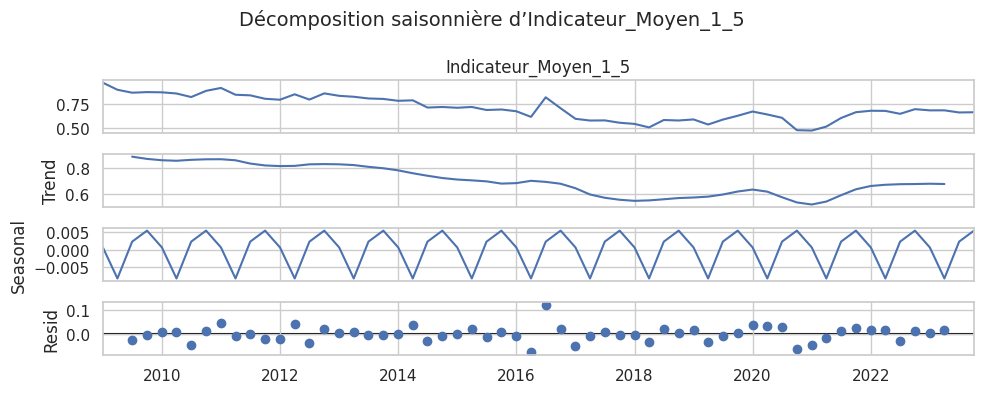

In [ ]:
# Assurer que l’index est de type datetime
df_merged = df_merged.sort_values("date")
df_merged = df_merged.set_index("date")

# Décomposition additive (vous pouvez tester aussi 'multiplicative' si les variations sont proportionnelles)
decompose_result = seasonal_decompose(df_merged['Indicateur_Moyen_1_5'].dropna(),
                                       model='additive',
                                       period=4)  # trimestrielle = 4 périodes/an

# Visualisation
plt.figure(figsize=(10, 8))
decompose_result.plot()
plt.suptitle("Décomposition saisonnière d’Indicateur_Moyen_1_5", fontsize=14)
plt.tight_layout()
plt.show()

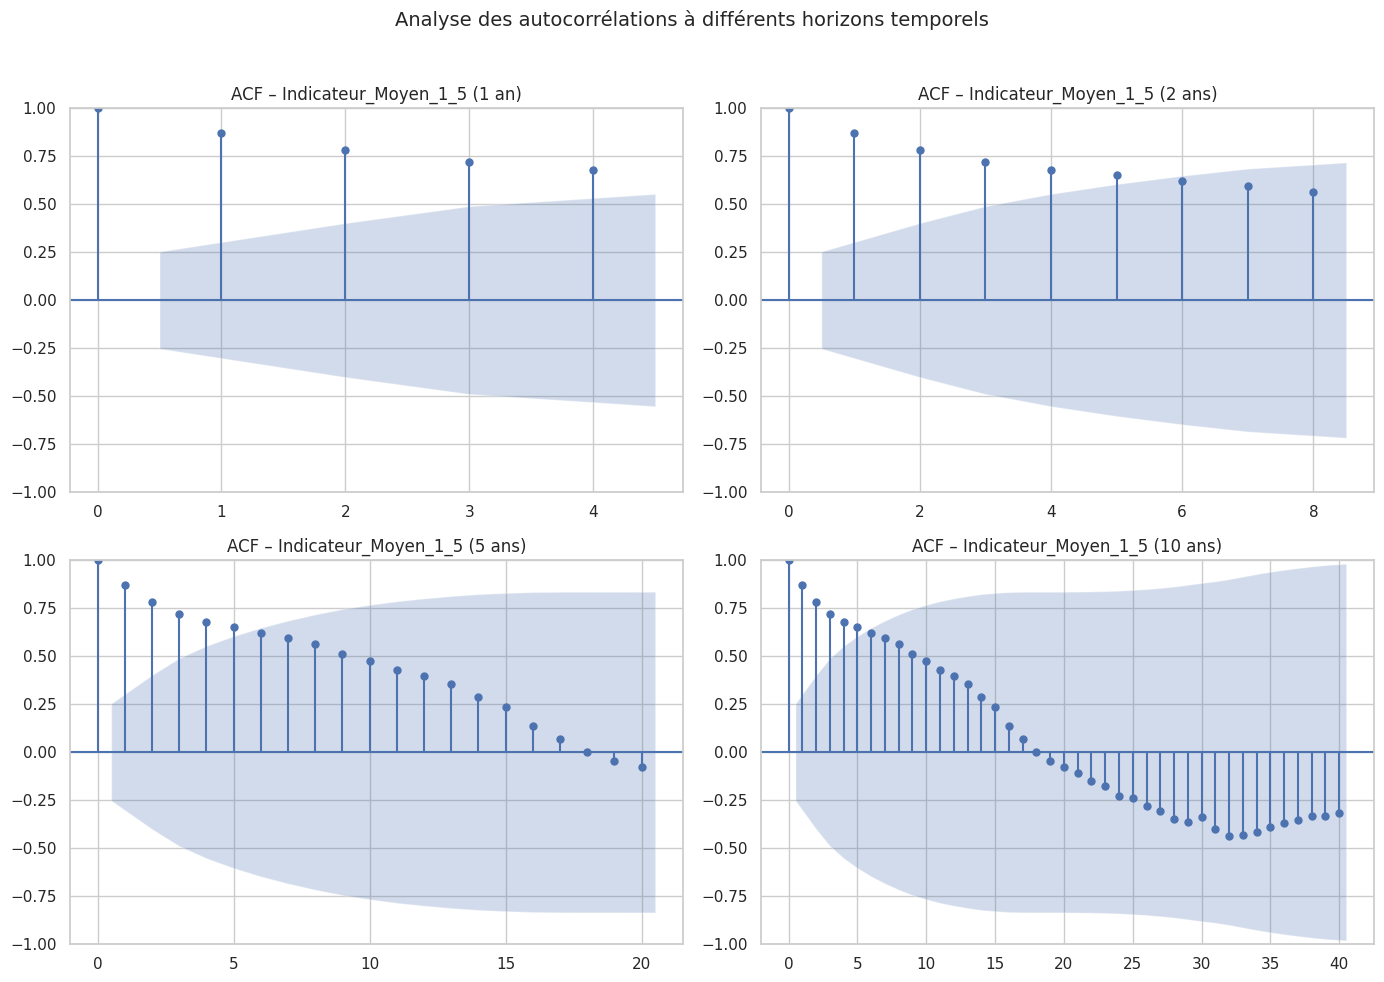

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

lags_list = [4, 8, 20, 40]
titles = ["1 an", "2 ans", "5 ans", "10 ans"]

plt.figure(figsize=(14, 10))

for i, (lag, titre) in enumerate(zip(lags_list, titles), 1):
    plt.subplot(2, 2, i)
    plot_acf(df_merged['Indicateur_Moyen_1_5'].dropna(), lags=lag, ax=plt.gca())
    plt.title(f"ACF – Indicateur_Moyen_1_5 ({titre})")

plt.suptitle("Analyse des autocorrélations à différents horizons temporels", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Tests statisques pour df_merged_segment

## Tests statistiques essentiels

In [ ]:
# Étape 0 : On fixe l’index temporel
df = df_merged_segment.set_index('date')
variables = df.columns.tolist()
display(df)

cod_prd_ref  Segment   CCF_seg  Poids_seg  PourcNoteCohorte  \
date                                                                         
2009-01-01          2009T1        1  0.451963   0.012816          0.067787   
2009-01-01          2009T1        2  0.918515   0.015002          0.139871   
2009-01-01          2009T1        3  0.919843   0.018888          0.076773   
2009-01-01          2009T1        4  1.275864   0.014854          0.049814   
2009-01-01          2009T1        5  1.093203   0.022140          0.253956   
2009-04-01          2009T2        1  0.598795   0.013038          0.065565   
2009-04-01          2009T2        2  0.693970   0.017223          0.152675   
2009-04-01          2009T2        3  0.840965   0.020426          0.078938   
2009-04-01          2009T2        4  0.967390   0.019165          0.061107   
2009-04-01          2009T2        5  1.109015   0.022123          0.241270   
2009-07-01          2009T3        1  0.460212   0.013592          0.059364   
2009-07-01          2009T3        2  0.676645   0.022691          0.174706   
2009-07-01          2009T3        3  0.868909   0.025040          0.084046   
2009-07-01          2009T3        4  1.052081   0.019456          0.053880   
2009-07-01          2009T3        5  1.083922   0.023093          0.218745   
2009-10-01          2009T4        1  0.431518   0.014146          0.061065   
2009-10-01          2009T4        2  0.697949   0.020784          0.158163   
2009-10-01          2009T4        3  0.974173   0.023502          0.077966   
2009-10-01          2009T4        4  0.936315   0.021553          0.058992   
2009-10-01          2009T4        5  1.053459   0.025614          0.239796   
2010-01-01          2010T1        1  0.302710   0.014183          0.063419   
2010-01-01          2010T1        2  0.681718   0.018773          0.147977   
2010-01-01          2010T1        3  0.849149   0.024126          0.082907   
2010-01-01          2010T1        4  1.168515   0.021203          0.060116   
2010-01-01          2010T1        5  1.086222   0.023076          0.223782   
2010-04-01          2010T2        1  0.431341   0.014885          0.067414   
2010-04-01          2010T2        2  0.682243   0.020554          0.164102   
2010-04-01          2010T2        3  0.970323   0.022781          0.079291   
2010-04-01          2010T2        4  1.060566   0.022893          0.065741   
2010-04-01          2010T2        5  1.048449   0.019296          0.189528   
2010-07-01          2010T3        1  0.489686   0.016842          0.077856   
2010-07-01          2010T3        2  0.748289   0.018291          0.149052   
2010-07-01          2010T3        3  0.808149   0.022733          0.080758   
2010-07-01          2010T3        4  0.912926   0.021378          0.062660   
2010-07-01          2010T3        5  0.998391   0.018376          0.184224   
2010-10-01          2010T4        1  0.443123   0.017507          0.075622   
2010-10-01          2010T4        2  0.807215   0.018480          0.140715   
2010-10-01          2010T4        3  0.956822   0.022204          0.073708   
2010-10-01          2010T4        4  0.947348   0.022485          0.061583   
2010-10-01          2010T4        5  1.062386   0.021697          0.203255   
2011-01-01          2011T1        1  0.300743   0.018061          0.075638   
2011-01-01          2011T1        2  0.895860   0.018333          0.135344   
2011-01-01          2011T1        3  0.964282   0.025376          0.081671   
2011-01-01          2011T1        4  1.010295   0.019456          0.051663   
2011-01-01          2011T1        5  1.092356   0.025478          0.231400   
2011-04-01          2011T2        1  0.429666   0.019649          0.076043   
2011-04-01          2011T2        2  0.779756   0.017977          0.122642   
2011-04-01          2011T2        3  0.766935   0.027779          0.082619   
2011-04-01          2011T2        4  0.925612   0.023126          0.056747   
2011-04-01          2011T2        5  

In [ ]:
# ---------------------------------------------------------------------------
# ==  PIPELINE PAR SEGMENT  ================================================
# ---------------------------------------------------------------------------

# Groupes de variables
vars_target = ['CCF_seg']
vars_brutes = ['PIB', 'TCH', 'Inflation', 'IPL']
vars_diff1  = ['PIB_diff1', 'TCH_diff1', 'Inflation_diff1', 'IPL_diff1']
segments = sorted(df_merged_segment['Segment'].unique())

# Boucle par segment
for seg in segments:
    print(f"\n\n============== ANALYSE STATISTIQUE – SEGMENT {seg} ==============")
    df_seg = df_merged_segment[df_merged_segment["Segment"] == seg].copy()

    # 1) Stationnarité : cible + variables explicatives
    for col in vars_target:
        if col in df_seg.columns:
            test_stationnarite(df_seg[col], f"{col} | Segment {seg}")

    # 2) Cointégration : cible + variables brutes
    # try:
    #     test_coint_johansen(df_seg[vars_target + vars_brutes])
    # except Exception as e:
    #     print(f"Erreur Johansen pour Segment {seg} : {e}")

    # 3) Autocorrélation : uniquement cible
    for col in vars_target:
        test_autocorrelation(df_seg[col], f"{col} | Segment {seg}")

    # 4) Hétéroscédasticité : uniquement cible
    for col in vars_target:
        test_heteroscedasticite(df_seg[col], f"{col} | Segment {seg}")

    # 5) Normalité : uniquement cible
    for col in vars_target:
        test_normalite(df_seg[col], f"{col} | Segment {seg}")



============== ANALYSE STATISTIQUE – SEGMENT 1 ==============

--- Stationnarité pour CCF_seg | Segment 1 ---
ADF      : p-value =  0.0015  => Stationnaire
KPSS     : p-value =  0.0100  => Non-stationnaire
Phillips : p-value =  0.0006  => Stationnaire
Conseil  : Série probablement I(1). Envisager une différence première ou tester la cointégration avant VECM.

--- Autocorrélation pour CCF_seg | Segment 1 ---
Durbin-Watson =  2.682 (≈2 ⇒ pas d’autocorrélation, <2 autocorr. positive, >2 négative)
Ljung-Box (lag 12) : p-value = 0.0000  => Autocorrélation détectée

--- Hétéroscédasticité pour CCF_seg | Segment 1 ---
ARCH LM        : p-value =  0.1135  => Homoscedasticité
Breusch-Pagan  : p-value =  0.0901  => Homoscedasticité

--- Normalité pour CCF_seg | Segment 1 ---
Jarque-Bera  : p-value = 0.6090  => Normale
Shapiro-Wilk : p-value = 0.4673  => Normale


============== ANALYSE STATISTIQUE – SEGMENT 2 ==============

--- Stationnarité pour CCF_seg | Segment 2 ---
ADF      : p-value =  0

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


| **Test**               | **Segment 1**       | **Segment 2**       | **Segment 3**       | **Segment 4**       | **Segment 5**       |
|------------------------|---------------------|---------------------|---------------------|---------------------|---------------------|
| **ADF**                | Stationnaire        | Non-stationnaire    | Non-stationnaire    | Stationnaire        | Stationnaire        |
| **KPSS**               | Non-stationnaire    | Non-stationnaire    | Non-stationnaire    | Non-stationnaire    | Non-stationnaire    |
| **Phillips-Perron**    | Stationnaire        | Stationnaire        | Stationnaire        | Stationnaire        | Stationnaire        |
| **Conclusion Stationnarité** | Probablement I(1) | Probablement I(1) | Probablement I(1)   | Probablement I(1)   | Probablement I(1)   |
| **Durbin-Watson**      | 2.682 (≈ OK)        | 2.672 (≈ OK)        | 2.788 (≈ OK)        | 2.894 (≈ OK)        | 2.521 (≈ OK)        |
| **Ljung-Box (lag=12)** | Autocorr. détectée  | Autocorr. détectée  | Autocorr. détectée  | Autocorr. détectée  | Autocorr. détectée  |
| **ARCH LM**            | Homoscedasticité    | Hétéroscédasticité  | Hétéroscédasticité  | Homoscedasticité    | Homoscedasticité    |
| **Breusch-Pagan**      | Homoscedasticité    | Homoscedasticité    | Hétéroscédasticité  | Hétéroscédasticité  | Hétéroscédasticité  |
| **Jarque-Bera**        | Normale             | Normale             | Normale             | Normale             | **Non-normale**     |
| **Shapiro-Wilk**       | Normale             | Normale             | Normale             | Normale             | **Non-normale**     |


| Segment | Stationnarité (I(1)) | Autocorrélation     | Hétéroscédasticité     | Normalité | Idée de modélisation                           |
|---------|----------------------|---------------------|-------------------------|-----------|--------------------------------------------------|
| 1       | I(1)                 | autocorr.        | OK                      | OK        | ARIMA ou SARIMA *(Il faut contrôler l'utocorr.)*     |
| 2       | I(1)                 | autocorr.        | ARCH                    | OK        | ARIMA-GARCH                                      |
| 3       | I(1)                 | autocorr.        | ARCH                    | OK        | ARIMA-GARCH                                      |
| 4       | I(1)                 | autocorr.        | BP = hétéro             | OK        | ARIMA avec erreur robuste                        |


 ### Test de cointégration (Johansen)

In [ ]:
# Test de cointégration Johansen

from statsmodels.tsa.vector_ar.vecm import coint_johansen

vars_for_vecm = ['CCF_seg', 'TCH', 'Inflation']
segments = sorted(df_merged_segment["Segment"].unique())

def test_cointegration_johansen_segment(df, segment, alpha=0.05):
    df_seg = df[df["Segment"] == segment][vars_for_vecm].dropna()

    print(f"\n===== TEST DE COINTÉGRATION – SEGMENT {segment} =====")

    try:
        result = coint_johansen(df_seg, det_order=0, k_ar_diff=1)  # pas de constante
        traces = result.lr1
        crit_values = result.cvt[:, 1]  # 5% critical value

        cointegration_rank = 0
        for i, (stat, crit) in enumerate(zip(traces, crit_values)):
            decision = "✅ cointégration" if stat > crit else "❌ pas de cointégration"
            print(f"Rang ≤ {i} : Trace Stat = {stat:.2f}, Crit. 5% = {crit:.2f}  => {decision}")
            if stat > crit:
                cointegration_rank = i + 1

        if cointegration_rank >= 1:
            print(f"→ ✅ Segment {segment} : VECM applicable (rang ≥ 1)")
        else:
            print(f"→ ❌ Segment {segment} : VECM non applicable (rang = 0)")

    except Exception as e:
        print(f"⚠️ Erreur test Johansen pour Segment {segment} : {e}")

# Appliquer pour tous les segments
for seg in segments:
    test_cointegration_johansen_segment(df_merged_segment, segment=seg)


===== TEST DE COINTÉGRATION – SEGMENT 1 =====
Rang ≤ 0 : Trace Stat = 26.81, Crit. 5% = 29.80  => ❌ pas de cointégration
Rang ≤ 1 : Trace Stat = 7.25, Crit. 5% = 15.49  => ❌ pas de cointégration
Rang ≤ 2 : Trace Stat = 0.31, Crit. 5% = 3.84  => ❌ pas de cointégration
→ ❌ Segment 1 : VECM non applicable (rang = 0)

===== TEST DE COINTÉGRATION – SEGMENT 2 =====
Rang ≤ 0 : Trace Stat = 21.88, Crit. 5% = 29.80  => ❌ pas de cointégration
Rang ≤ 1 : Trace Stat = 8.71, Crit. 5% = 15.49  => ❌ pas de cointégration
Rang ≤ 2 : Trace Stat = 0.75, Crit. 5% = 3.84  => ❌ pas de cointégration
→ ❌ Segment 2 : VECM non applicable (rang = 0)

===== TEST DE COINTÉGRATION – SEGMENT 3 =====
Rang ≤ 0 : Trace Stat = 30.02, Crit. 5% = 29.80  => ✅ cointégration
Rang ≤ 1 : Trace Stat = 9.63, Crit. 5% = 15.49  => ❌ pas de cointégration
Rang ≤ 2 : Trace Stat = 0.67, Crit. 5% = 3.84  => ❌ pas de cointégration
→ ✅ Segment 3 : VECM applicable (rang ≥ 1)

===== TEST DE COINTÉGRATION – SEGMENT 4 =====
Rang ≤ 0 : Trace

## Seasonalité + Trend pour 'CCF_seg'


================ Décomposition – Segment 1 ================



<Figure size 1000x800 with 0 Axes>

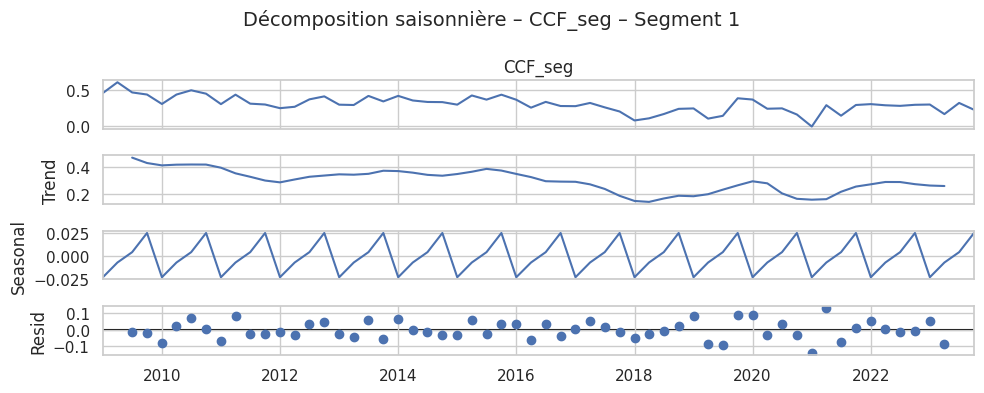


================ Décomposition – Segment 2 ================



<Figure size 1000x800 with 0 Axes>

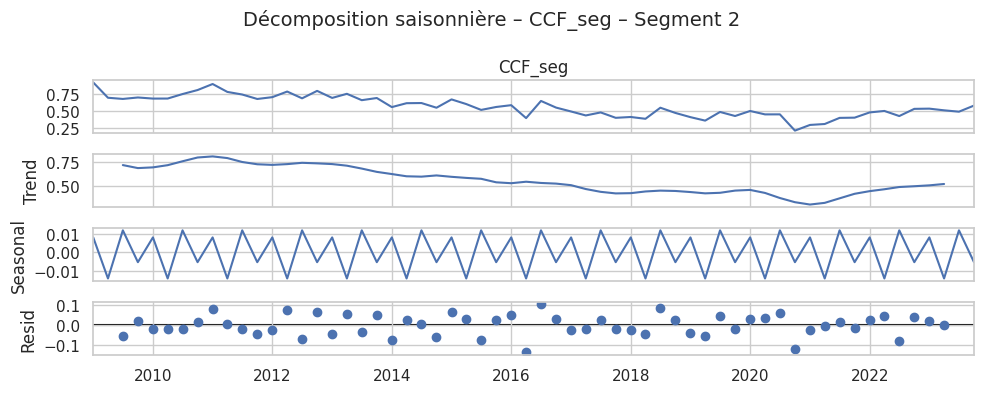


================ Décomposition – Segment 3 ================



<Figure size 1000x800 with 0 Axes>

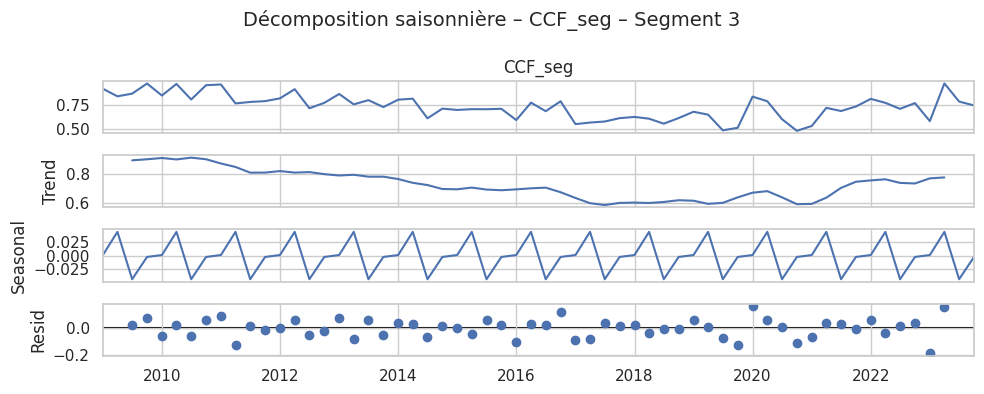


================ Décomposition – Segment 4 ================



<Figure size 1000x800 with 0 Axes>

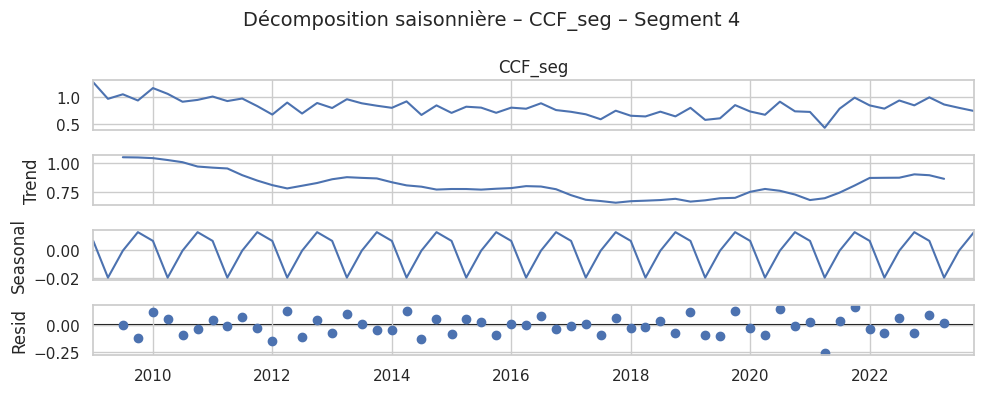


================ Décomposition – Segment 5 ================



<Figure size 1000x800 with 0 Axes>

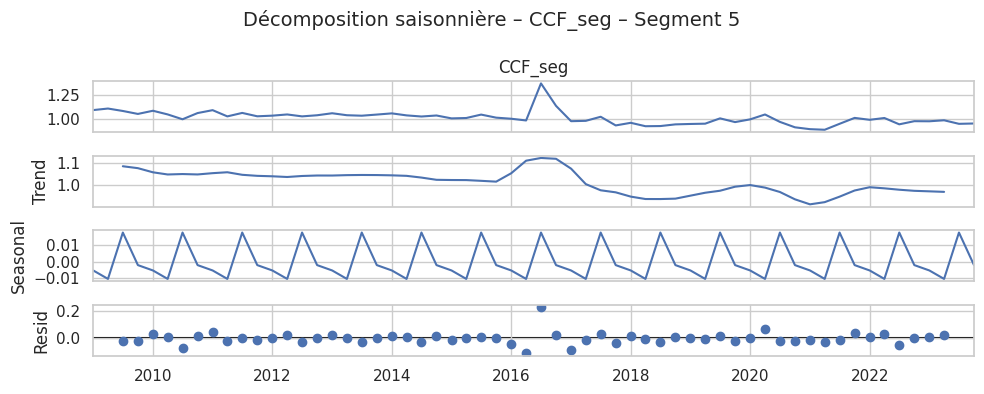

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# S'assurer que la colonne 'date' est bien en datetime
df_merged_segment["date"] = pd.to_datetime(df_merged_segment["date"])

# Boucle sur les 5 segments
for segment in range(1, 6):
    print(f"\n================ Décomposition – Segment {segment} ================\n")

    # Filtrage des données du segment
    df_seg = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_seg = df_seg.sort_values("date")
    df_seg = df_seg.set_index("date")

    # Vérifier s'il y a suffisamment de données non-nulles
    y = df_seg["CCF_seg"].dropna()
    if len(y) < 10:
        print(f"Segment {segment} ignoré – trop peu de données pour la décomposition.")
        continue

    # Décomposition (mode 'additive' trimestrielle : period=4)
    result = seasonal_decompose(y, model="additive", period=4)

    # Affichage
    plt.figure(figsize=(10, 8))
    result.plot()
    plt.suptitle(f"Décomposition saisonnière – CCF_seg – Segment {segment}", fontsize=14)
    plt.tight_layout()
    plt.show()

# Modélisation CCF globale

## Pour la cible 'Indicateur_Moyen_1_5' brut



### OLS - 'CCF_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1' avec l'intercept

#### Sans pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF en retard
# =============================================================================

# Création du CCF en retard
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_lag1'] = df_lagged_diff['Indicateur_Moyen_1_5'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['Indicateur_Moyen_1_5']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                             OLS Regression Results                             
Dep. Variable:     Indicateur_Moyen_1_5   R-squared:                       0.832
Model:                              OLS   Adj. R-squared:                  0.820
Method:                   Least Squares   F-statistic:                     66.90
Date:                  Tue, 27 May 2025   Prob (F-statistic):           2.80e-20
Time:                          08:01:58   Log-Likelihood:                 94.862
No. Observations:                    59   AIC:                            -179.7
Df Residuals:                        54   BIC:                            -169.3
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

#### Avec pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF_pond en retard
# =============================================================================

df_lagged_diff = df_merged.copy()

# Pondération
df_lagged_diff['CCF_pond'] = df_lagged_diff['Indicateur_Moyen_1_5'] * df_lagged_diff['Effectif_Pourc_1_5']

# Création du CCF_pond en retard
df_lagged_diff['CCF_pond_lag1'] = df_lagged_diff['CCF_pond'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_pond_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['CCF_pond']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                            OLS Regression Results                            
Dep. Variable:               CCF_pond   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 26 May 2025   Prob (F-statistic):           6.21e-31
Time:                        12:56:37   Log-Likelihood:                 305.28
No. Observations:                  59   AIC:                            -600.6
Df Residuals:                      54   BIC:                            -590.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.000     

### OLS - 'CCF_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1' sans l'intercept

#### Sans pondération

                                  OLS Regression Results                                 
Dep. Variable:     Indicateur_Moyen_1_5   R-squared (uncentered):                   0.995
Model:                              OLS   Adj. R-squared (uncentered):              0.995
Method:                   Least Squares   F-statistic:                              2761.
Date:                  Mon, 26 May 2025   Prob (F-statistic):                    1.17e-62
Time:                          11:16:30   Log-Likelihood:                          92.592
No. Observations:                    59   AIC:                                     -177.2
Df Residuals:                        55   BIC:                                     -168.9
Df Model:                             4                                                  
Covariance Type:              nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

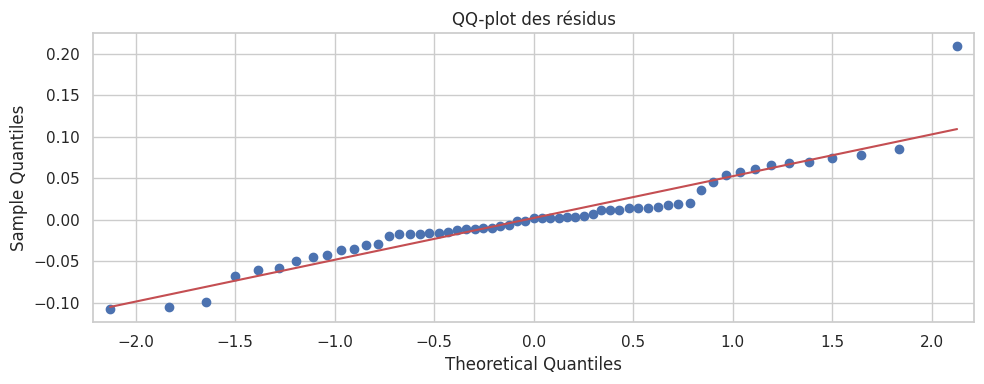

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Création du CCF en retard
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_lag1'] = df_lagged_diff['Indicateur_Moyen_1_5'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : sans constante
X_diff = df_lagged_diff[['CCF_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['Indicateur_Moyen_1_5']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

#### Avec pondération

                                 OLS Regression Results                                
Dep. Variable:               CCF_pond   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1282.
Date:                Mon, 26 May 2025   Prob (F-statistic):                    1.45e-53
Time:                        12:24:09   Log-Likelihood:                          305.11
No. Observations:                  59   AIC:                                     -602.2
Df Residuals:                      55   BIC:                                     -593.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

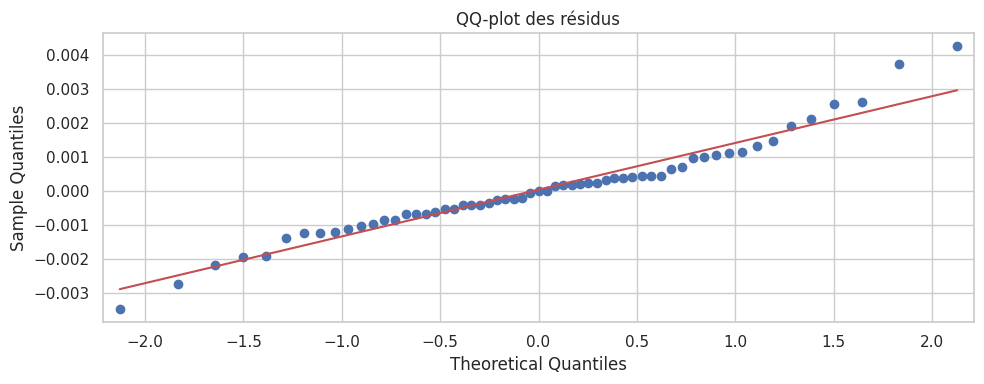

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_pond_lag1 + différences macro
# =============================================================================

df_lagged_diff = df_merged.copy()

# Pondération
df_lagged_diff['CCF_pond'] = df_lagged_diff['Indicateur_Moyen_1_5'] * df_lagged_diff['Effectif_Pourc_1_5']

# Création du CCF_pond en retard
df_lagged_diff['CCF_pond_lag1'] = df_lagged_diff['CCF_pond'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_pond_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['CCF_pond']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

### OLS - 'CCF_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1' avec l'intercept




#### Sans pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF en retard
# =============================================================================

# Création du CCF en retard
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_lag1'] = df_lagged_diff['Indicateur_Moyen_1_5'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['Indicateur_Moyen_1_5']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                             OLS Regression Results                             
Dep. Variable:     Indicateur_Moyen_1_5   R-squared:                       0.846
Model:                              OLS   Adj. R-squared:                  0.835
Method:                   Least Squares   F-statistic:                     74.27
Date:                  Sun, 25 May 2025   Prob (F-statistic):           2.66e-21
Time:                          17:49:31   Log-Likelihood:                 97.450
No. Observations:                    59   AIC:                            -184.9
Df Residuals:                        54   BIC:                            -174.5
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.

#### Avec pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF en retard
# =============================================================================

df_lagged_diff = df_merged.copy()

# Pondération
df_lagged_diff['CCF_pond'] = df_lagged_diff['Indicateur_Moyen_1_5'] * df_lagged_diff['Effectif_Pourc_1_5']

# Création du CCF_pond en retard
df_lagged_diff['CCF_pond_lag1'] = df_lagged_diff['CCF_pond'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_pond_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['CCF_pond']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                            OLS Regression Results                            
Dep. Variable:               CCF_pond   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.9
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.88e-31
Time:                        12:25:44   Log-Likelihood:                 306.59
No. Observations:                  59   AIC:                            -603.2
Df Residuals:                      54   BIC:                            -592.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0002      0.000     

### OLS - 'CCF_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1' sans l'intercept

#### Sans pondération

                                  OLS Regression Results                                 
Dep. Variable:     Indicateur_Moyen_1_5   R-squared (uncentered):                   0.995
Model:                              OLS   Adj. R-squared (uncentered):              0.995
Method:                   Least Squares   F-statistic:                              3028.
Date:                  Sun, 25 May 2025   Prob (F-statistic):                    9.35e-64
Time:                          17:50:21   Log-Likelihood:                          95.300
No. Observations:                    59   AIC:                                     -182.6
Df Residuals:                        55   BIC:                                     -174.3
Df Model:                             4                                                  
Covariance Type:              nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

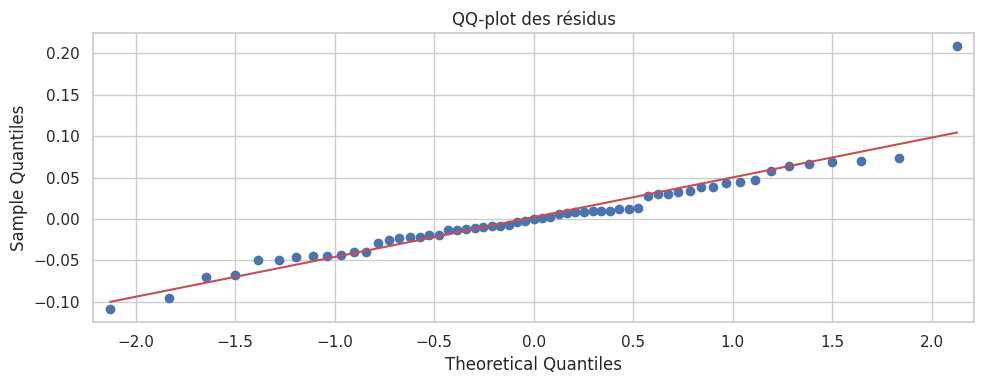

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Création du CCF en retard
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_lag1'] = df_lagged_diff['Indicateur_Moyen_1_5'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : sans constante
X_diff = df_lagged_diff[['CCF_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['Indicateur_Moyen_1_5']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

#### Avec pondération

                                 OLS Regression Results                                
Dep. Variable:               CCF_pond   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1345.
Date:                Mon, 26 May 2025   Prob (F-statistic):                    3.88e-54
Time:                        12:26:52   Log-Likelihood:                          306.52
No. Observations:                  59   AIC:                                     -605.0
Df Residuals:                      55   BIC:                                     -596.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

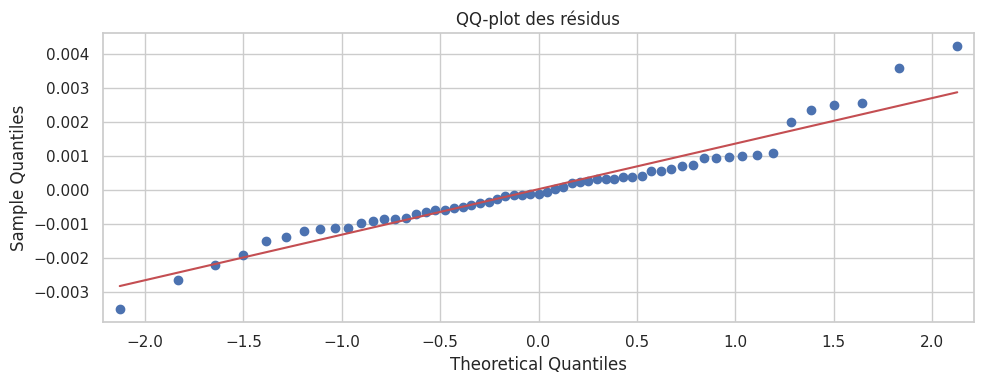

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df_lagged_diff = df_merged.copy()

# Pondération
df_lagged_diff['CCF_pond'] = df_lagged_diff['Indicateur_Moyen_1_5'] * df_lagged_diff['Effectif_Pourc_1_5']

# Création du CCF_pond en retard
df_lagged_diff['CCF_pond_lag1'] = df_lagged_diff['CCF_pond'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_pond_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['CCF_pond']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

### Comparaison des modèles OLS

| Modèle                                  | Pondération | Constante | AIC     | R² (adj.) | DW    | Résidus stationnaires | Normalité (SW) | Hétéro. (BP) | Multicolinéarité     | Moy. résidus     | RMSE   | MAE    |
|-----------------------------------------|-------------|-----------|---------|-----------|--------|------------------------|----------------|----------------|------------------------|------------------|--------|--------|
| OLS(1) : CCF_lag1 + diff                | ❌          | ✅        | -179.7  | 0.820     | 2.14   | ✅ ADF/KPSS            | ❌ 0.0029       | ✅ 0.8385       | ⚠️ VIF const > 5       | 2.57e-16         |   —    |   —    |
| OLS(2) : CCF_pond_lag1 + diff           | ✅          | ✅        | -600.6  | 0.928     | 2.21   | ✅ ADF/KPSS            | ❌ 0.0359       | ✅ 0.7150       | ⚠️ VIF const > 5       | -7.31e-18        |   —    |   —    |
| OLS(3) : CCF_lag1 + diff                | ❌          | ❌        | -177.2  | 0.995     | 2.27   | ✅ ADF/KPSS            | ❌ 0.0008       | ✅ 0.8308       | ✅ VIF < 2             | 2.23e-03         | 0.0504 | 0.0345 |
| OLS(4) : CCF_pond_lag1 + diff           | ✅          | ❌        | -602.2  | 0.989     | 2.24   | ✅ ADF/KPSS            | ✅ 0.0755       | ✅ 0.7778       | ✅ VIF < 2             | 3.90e-05         | 0.0014 | 0.0010 |
| OLS(5) : CCF_lag1 + PIB + diff          | ❌          | ✅        | -184.9  | 0.835     | 2.25   | ✅ ADF/KPSS            | ❌ 0.0029       | ✅ 0.9577       | ⚠️ VIF const > 5       | 2.34e-16         |   —    |   —    |
| OLS(6) : CCF_pond_lag1 + PIB + diff     | ✅          | ✅        | -603.2  | 0.931     | 2.29   | ✅ ADF/KPSS            | ❌ 0.0160       | ✅ 0.6820       | ⚠️ VIF const > 5       | -2.60e-16        |   —    |   —    |
| OLS(7) : CCF_lag1 + PIB + diff          | ❌          | ❌        | -182.6  | 0.995     | 2.36   | ✅ ADF/KPSS            | ❌ 0.0013       | ✅ 0.9439       | ✅ VIF < 2             | 2.08e-03         | 0.0481 | 0.0344 |
| OLS(8) : CCF_pond_lag1 + PIB + diff     | ✅          | ❌        | -605.0  | 0.990     | 2.31   | ✅ ADF/KPSS            | ❌ 0.0247       | ✅ 0.7110       | ✅ VIF < 2             | 2.37e-05         | 0.0013 | 0.0010 |


Parmi l’ensemble des modèles testés, les modèles OLS pondérés sans constante (notamment les modèles OLS(4) et OLS(8)) se distinguent comme les meilleurs candidats selon plusieurs critères clés. En effet, ils affichent les valeurs AIC les plus faibles (respectivement -602.2 et -605.0), ce qui traduit une qualité d’ajustement supérieure tout en pénalisant la complexité. Leur R² ajusté très élevé (0.989 et 0.990) confirme également leur capacité à expliquer la variance de la variable cible.

Sur le plan des résidus, ces modèles satisfont pleinement aux conditions de stationnarité (tests ADF et KPSS), ne présentent aucune autocorrélation (Durbin-Watson proche de 2.2) et respectent l’hypothèse d’homoscédasticité (test de Breusch-Pagan non significatif). De plus, la multicolinéarité est maîtrisée, avec des VIF bien en dessous du seuil critique de 5.

Concernant les performances prédictives, OLS(4) et OLS(8) présentent les plus faibles erreurs de prévision : RMSE ≈ 0.0013–0.0014 et MAE ≈ 0.0010, bien inférieures à celles des modèles non pondérés.

La seule limite observable concerne la non-normalité des résidus (p-value du test de Shapiro-Wilk < 0.05), un phénomène récurrent dans presque tous les modèles, mais souvent toléré si les autres hypothèses sont vérifiées.

En conclusion, les modèles OLS pondérés sans constante (et en particulier OLS(8)) sont les plus performants et robustes, et devraient être privilégiés pour les prévisions ou l’intégration dans un pipeline de scoring.

### SARIMA uniquement pour la cible Indicateur_Moyen_1_5


 Modèle : SARIMA(1,1,1)(1,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                Indicateur_Moyen_1_5   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                  60.562
Date:                             Mon, 26 May 2025   AIC                           -113.125
Time:                                     13:38:55   BIC                           -105.724
Sample:                                          0   HQIC                          -110.340
                                              - 60                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2847      0.369      0.772      0.440      -0.438     

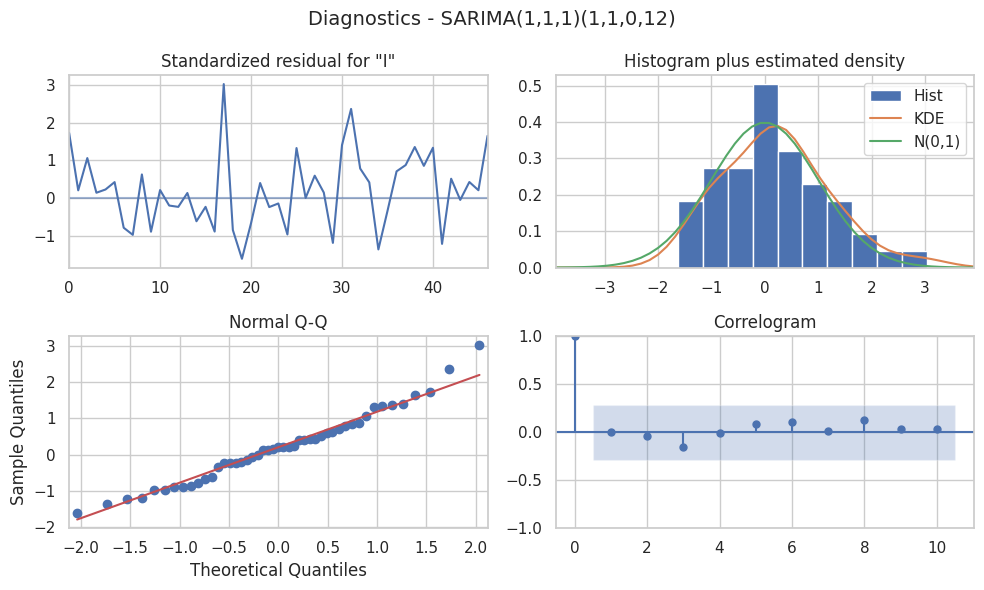


=== Tests sur les résidus ===
  - ADF p-value : 0.1497 → Non stationnaire
  - KPSS p-value : 0.1000 → Stationnaire
  - Ljung-Box (lag 12) : p-value = 0.4316 → Pas d’autocorrélation
  - ARCH test : p-value = 0.9997 → Homoscedasticité plausible
  - Shapiro-Wilk : p-value = 0.0000 → Résidus non normaux
  - Moyenne des résidus : 1.5966e-02 → Non nulle
  - Durbin-Watson : 1.4808 → Autocorrélation possible

 Modèle : SARIMA(1,1,1)(1,1,1,12)
                                     SARIMAX Results                                      
Dep. Variable:               Indicateur_Moyen_1_5   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  63.923
Date:                            Mon, 26 May 2025   AIC                           -117.847
Time:                                    13:39:00   BIC                           -108.596
Sample:                                         0   HQIC                          -114.366
              

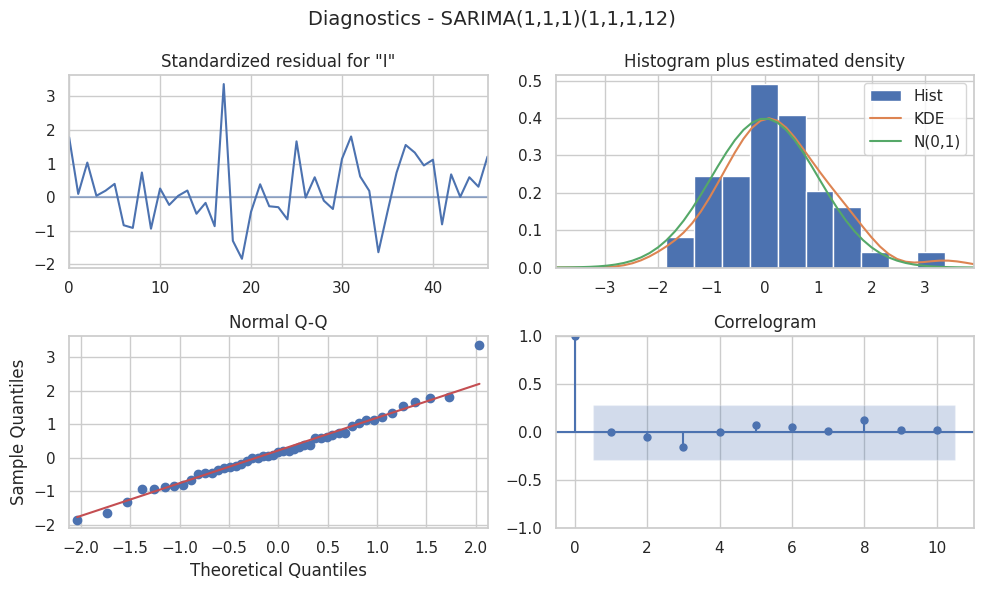


=== Tests sur les résidus ===
  - ADF p-value : 0.1350 → Non stationnaire
  - KPSS p-value : 0.1000 → Stationnaire
  - Ljung-Box (lag 12) : p-value = 0.4768 → Pas d’autocorrélation
  - ARCH test : p-value = 0.9999 → Homoscedasticité plausible
  - Shapiro-Wilk : p-value = 0.0000 → Résidus non normaux
  - Moyenne des résidus : 1.5392e-02 → Non nulle
  - Durbin-Watson : 1.4815 → Autocorrélation possible

 Modèle : SARIMA(2,1,1)(1,1,0,12)
                                      SARIMAX Results                                      
Dep. Variable:                Indicateur_Moyen_1_5   No. Observations:                   60
Model:             SARIMAX(2, 1, 1)x(1, 1, [], 12)   Log Likelihood                  60.699
Date:                             Mon, 26 May 2025   AIC                           -111.398
Time:                                     13:39:07   BIC                           -102.147
Sample:                                          0   HQIC                          -107.917
        

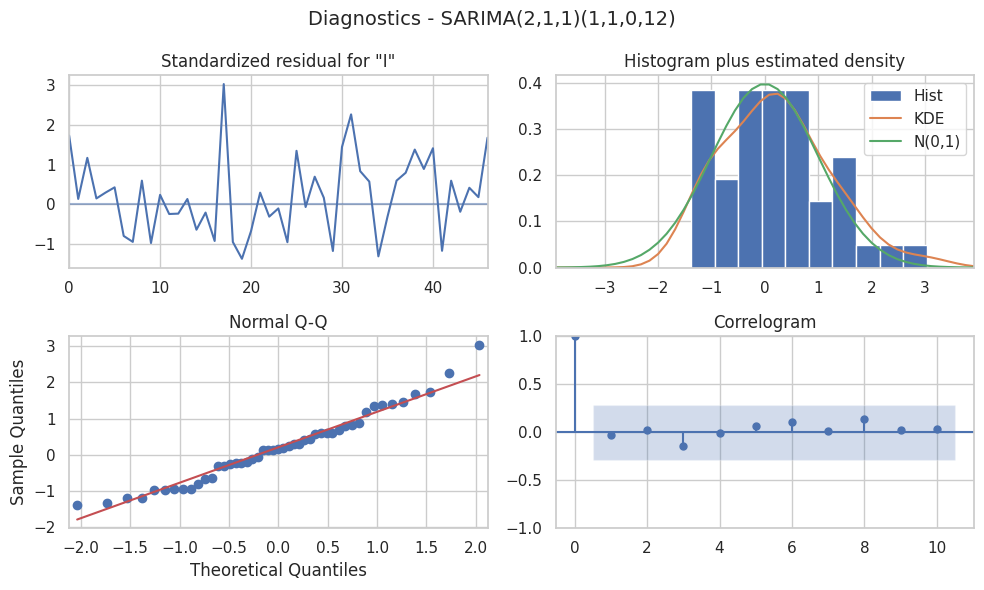


=== Tests sur les résidus ===
  - ADF p-value : 0.1481 → Non stationnaire
  - KPSS p-value : 0.1000 → Stationnaire
  - Ljung-Box (lag 12) : p-value = 0.4336 → Pas d’autocorrélation
  - ARCH test : p-value = 0.9998 → Homoscedasticité plausible
  - Shapiro-Wilk : p-value = 0.0000 → Résidus non normaux
  - Moyenne des résidus : 1.6087e-02 → Non nulle
  - Durbin-Watson : 1.4889 → Autocorrélation possible

Résumé des critères d’information :
SARIMA(1,1,1)(1,1,0,12)  →  AIC = -113.12  |  BIC = -105.72
SARIMA(1,1,1)(1,1,1,12)  →  AIC = -117.85  |  BIC = -108.60
SARIMA(2,1,1)(1,1,0,12)  →  AIC = -111.40  |  BIC = -102.15


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------------------------------------------------------
# Étape 1 – Série cible : uniquement Indicateur_Moyen_1_5
# ---------------------------------------------------------------------------
y = df_merged['Indicateur_Moyen_1_5'].dropna()

# ---------------------------------------------------------------------------
# Étape 2 – Tester plusieurs modèles SARIMA
# ---------------------------------------------------------------------------
model_configs = {
    "SARIMA(1,1,1)(1,1,0,12)": ((1,1,1), (1,1,0,12)),
    "SARIMA(1,1,1)(1,1,1,12)": ((1,1,1), (1,1,1,12)),
    "SARIMA(2,1,1)(1,1,0,12)": ((2,1,1), (1,1,0,12)),
}

results_dict = {}

for name, (order, seasonal_order) in model_configs.items():
    print(f"\n{'='*70}\n Modèle : {name}")

    model = SARIMAX(endog=y, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    results_dict[name] = results

    print(results.summary())

    # Graphiques diagnostics
    results.plot_diagnostics(figsize=(10, 6))
    plt.suptitle(f"Diagnostics - {name}", fontsize=14)
    plt.tight_layout()
    plt.show()

    # -----------------------------------------------------------------------
    # Étape 3 – Tests post-estimation sur les résidus
    # -----------------------------------------------------------------------
    residuals = results.resid.dropna()
    print("\n=== Tests sur les résidus ===")

    # 1. Stationnarité
    adf_pval = adfuller(residuals)[1]
    kpss_pval = kpss(residuals, regression='c', nlags='auto')[1]
    print(f"  - ADF p-value : {adf_pval:.4f} → {'Stationnaire' if adf_pval < 0.05 else 'Non stationnaire'}")
    print(f"  - KPSS p-value : {kpss_pval:.4f} → {'Stationnaire' if kpss_pval > 0.05 else 'Non stationnaire'}")

    # 2. Autocorrélation
    lb_pval = acorr_ljungbox(residuals, lags=[12], return_df=True)['lb_pvalue'].iloc[0]
    print(f"  - Ljung-Box (lag 12) : p-value = {lb_pval:.4f} → "
          f"{'Pas d’autocorrélation' if lb_pval > 0.05 else 'Autocorrélation détectée'}")

    # 3. Hétéroscédasticité (ARCH)
    arch_pval = het_arch(residuals)[1]
    print(f"  - ARCH test : p-value = {arch_pval:.4f} → "
          f"{'Homoscedasticité plausible' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

    # 4. Normalité
    shapiro_pval = shapiro(residuals)[1]
    print(f"  - Shapiro-Wilk : p-value = {shapiro_pval:.4f} → "
          f"{'Résidus probablement normaux' if shapiro_pval > 0.05 else 'Résidus non normaux'}")

    # 5. Moyenne des résidus
    mean_resid = residuals.mean()
    print(f"  - Moyenne des résidus : {mean_resid:.4e} → "
          f"{'Proche de zéro' if abs(mean_resid) < 1e-6 else 'Non nulle'}")

    # 6. Durbin-Watson
    dw_stat = durbin_watson(residuals)
    print(f"  - Durbin-Watson : {dw_stat:.4f} → "
          f"{'Pas d’autocorrélation' if 1.5 < dw_stat < 2.5 else 'Autocorrélation possible'}")

# ---------------------------------------------------------------------------
# À la fin, vous pouvez comparer AIC / BIC pour les modèles :
# ---------------------------------------------------------------------------
print("\nRésumé des critères d’information :")
for name, res in results_dict.items():
    print(f"{name}  →  AIC = {res.aic:.2f}  |  BIC = {res.bic:.2f}")

### Comparaison entre OLS(8) et SARIMA

| Modèle                                  | Type     | AIC     | BIC     | R² (adj.) | Moy. résidus | DW     | Autocorr. | Stationnarité | Normalité (SW) | Hétérosc. | Remarque principale                     |
|-----------------------------------------|----------|---------|---------|-----------|---------------|--------|------------|----------------|----------------|------------|------------------------------------------|
| **OLS(8)** : CCF_pond_lag1 + PIB (no const) | Linéaire | **-605.0** | **-596.7** | 0.990     | 2.37e-05      | 2.31   | ✅         | ✅ ADF/KPSS     | ❌ 0.0247       | ✅        | Meilleur global en AIC/R²/erreurs       |
| SARIMA(1,1,1)(1,1,0,12)                  | SARIMA   | -113.1  | -105.7  | —         | 1.60e-02      | 1.48   | ⚠️         | ❌ ADF         | ❌ 0.0000       | ✅        | Autocorr. + résidus non stationnaires   |
| SARIMA(1,1,1)(1,1,1,12)                  | SARIMA   | -117.8  | -108.6  | —         | 1.54e-02      | 1.48   | ⚠️         | ❌ ADF         | ❌ 0.0000       | ✅        | AIC meilleur mais toujours non stationn.|
| SARIMA(2,1,1)(1,1,0,12)                  | SARIMA   | -111.4  | -102.1  | —         | 1.61e-02      | 1.49   | ⚠️         | ❌ ADF         | ❌ 0.0000       | ✅        | Résultats similaires, moins performant  |


Malgré la pertinence structurelle des modèles SARIMA pour modéliser la dépendance temporelle et la saisonnalité, aucun des trois modèles SARIMA ne surpasse le modèle OLS(8) sur les critères clés. En effet, l’OLS(8) affiche un AIC largement inférieur (-605 contre -117.8 au mieux), un R² ajusté de 0.990, ainsi que des erreurs de prédiction très faibles (RMSE/MAE ≈ 0.001).

Les modèles SARIMA présentent par ailleurs des résidus non stationnaires (ADF > 0.1) et des signes d’autocorrélation (DW ≈ 1.48), ce qui limite leur validité statistique. De plus, les résidus de tous les modèles SARIMA sont non normaux, ce qui remet en question la qualité de l’ajustement.

En résumé, le modèle linéaire OLS pondéré sans constante (OLS(8)) reste clairement supérieur dans ce cas, tant sur le plan statistique que prédictif.

## Pour la cible CCF_diff1

### OLS - 'CCF_diff1_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1' avec l'intercept

#### Sans pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF_diff1 en retard
# =============================================================================

# Création d'une copie du dataframe
df_lagged_diff = df_merged.copy()

# Étape 1: Différence première (diff1) pour Indicateur_Moyen_1_5
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff(1)

# Étape 2: Création du CCF en retard (lag1) sur la série différenciée
df_lagged_diff['CCF_diff1_lag1'] = df_lagged_diff['CCF_diff1'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du diff et du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_diff1_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
# Variable dépendante: la série différenciée
y_diff = df_lagged_diff['CCF_diff1']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                            OLS Regression Results                            
Dep. Variable:              CCF_diff1   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.7766
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.545
Time:                        12:54:33   Log-Likelihood:                 91.359
No. Observations:                  58   AIC:                            -172.7
Df Residuals:                      53   BIC:                            -162.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0047      0.007     

#### Avec pondération

                            OLS Regression Results                            
Dep. Variable:         CCF_diff1_pond   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.122
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.356
Time:                        11:02:38   Log-Likelihood:                 331.53
No. Observations:                  58   AIC:                            -653.1
Df Residuals:                      53   BIC:                            -642.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.987e-05    

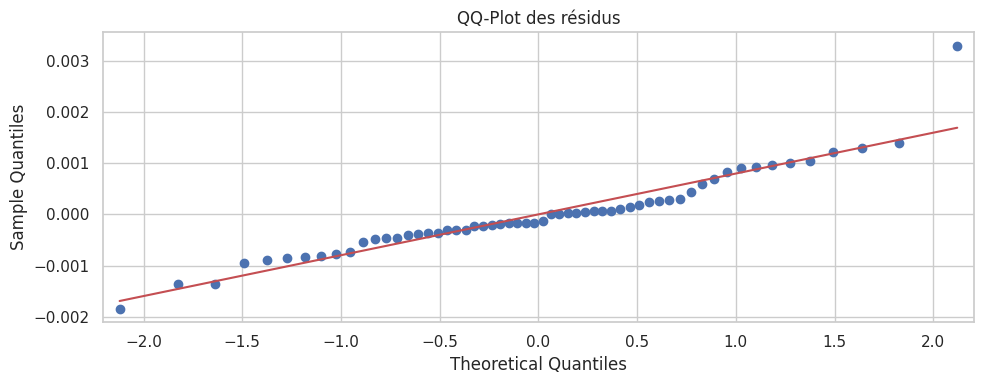

In [ ]:
# =============================================================================
# Régression OLS pondérée avec diff1 (stationnaire) + CCF_diff1_pond
# =============================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Étape : Calcul de la différence de la variable cible
# → On différencie avant de pondérer pour respecter la logique économétrique
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff()

# Étape : Pondération
# → On pondère la différence (pas le niveau)
df_lagged_diff['CCF_diff1_pond'] = df_lagged_diff['CCF_diff1'] * df_lagged_diff['Effectif_Pourc_1_5']

# Étape : Création du lag 1 sur la variable déjà pondérée
# → Le lag est appliqué une fois la transformation faite
df_lagged_diff['CCF_diff1_pond_lag1'] = df_lagged_diff['CCF_diff1_pond'].shift(1)

# Nettoyage
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag pondéré + variables macro diff1
X_diff = df_lagged_diff[['CCF_diff1_pond_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['CCF_diff1_pond']

# Régression
model_diff = sm.OLS(y_diff, X_diff).fit()
print(model_diff.summary())

print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05).")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5).")

# =============================================================================
# Vérifications des hypothèses
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité
print("\n--- Stationnarité des résidus ---")
adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
print("résidus stationnaires." if adf_pval < 0.05 else "résidus non stationnaires.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
print("résidus stationnaires." if kpss_pval > 0.05 else "résidus non stationnaires.")

# 2. Autocorrélation
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
print("  → Pas d'autocorrélation." if 1.5 < dw < 2.5 else "  → Autocorrélation détectée.")

# 3. Hétéroscédasticité
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
print("  → Homoscédasticité plausible." if bp_pval > 0.05 else "  → Hétéroscédasticité détectée.")

# 4. Normalité
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
print("  → Résidus probablement normaux." if shapiro_pval > 0.05 else "  → Résidus non normaux.")

# 5. Multicolinéarité
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)
if any(vif_df["VIF"] > 5):
    print("  → Multicolinéarité possible (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante.")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
print("  → Moyenne proche de zéro." if abs(mean_resid) < 1e-6 else "  → Moyenne non nulle.")

# 7. Qualité des prévisions
print("\n--- Qualité des prévisions ---")
y_pred = model_diff.predict(X_diff)
rmse = np.sqrt(np.mean((y_diff - y_pred) ** 2))
mae = np.mean(np.abs(y_diff - y_pred))
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")

# 8. QQ-Plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot des résidus")
plt.tight_layout()
plt.show()

### OLS - 'CCF_diff1_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1' sans l'intercept

#### Sans pondération

                                 OLS Regression Results                                
Dep. Variable:              CCF_diff1   R-squared (uncentered):                   0.053
Model:                            OLS   Adj. R-squared (uncentered):             -0.017
Method:                 Least Squares   F-statistic:                             0.7570
Date:                Mon, 26 May 2025   Prob (F-statistic):                       0.558
Time:                        12:58:27   Log-Likelihood:                          91.114
No. Observations:                  58   AIC:                                     -174.2
Df Residuals:                      54   BIC:                                     -166.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

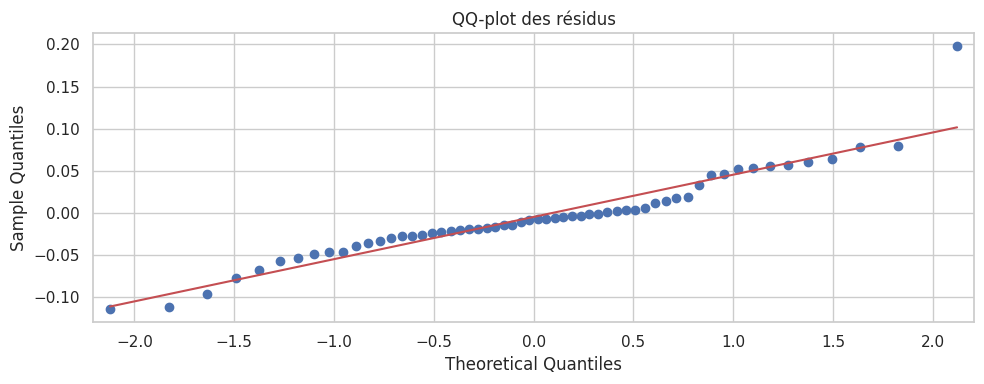

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_diff1_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Création d'une copie du dataframe
df_lagged_diff = df_merged.copy()

# Étape 1: Différence première (diff1) pour Indicateur_Moyen_1_5
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff(1)

# Étape 2: Création du CCF en retard (lag1) sur la série différenciée
df_lagged_diff['CCF_diff1_lag1'] = df_lagged_diff['CCF_diff1'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du diff et du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_diff1_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
# Variable dépendante: la série différenciée
y_diff = df_lagged_diff['CCF_diff1']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

#### Avec pondération

                                 OLS Regression Results                                
Dep. Variable:         CCF_diff1_pond   R-squared (uncentered):                   0.072
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.049
Date:                Mon, 26 May 2025   Prob (F-statistic):                       0.391
Time:                        13:00:42   Log-Likelihood:                          331.09
No. Observations:                  58   AIC:                                     -654.2
Df Residuals:                      54   BIC:                                     -645.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

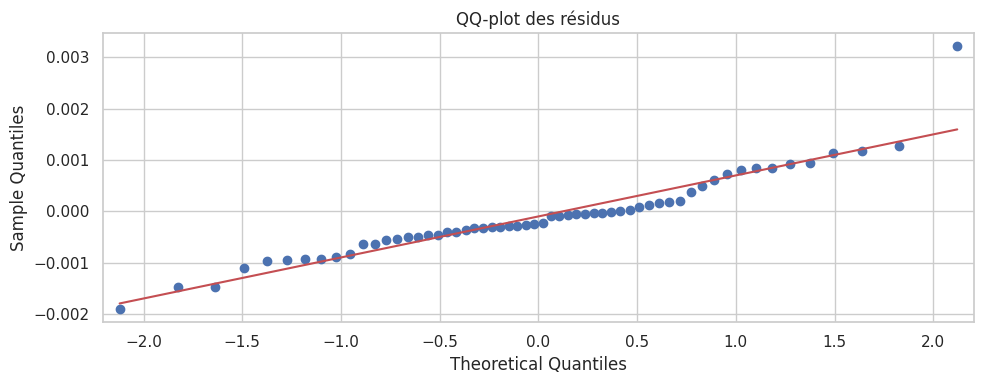

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_diff1_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff()

# Étape : Pondération
# → On pondère la différence (pas le niveau)
df_lagged_diff['CCF_diff1_pond'] = df_lagged_diff['CCF_diff1'] * df_lagged_diff['Effectif_Pourc_1_5']

# Étape : Création du lag 1 sur la variable déjà pondérée
# → Le lag est appliqué une fois la transformation faite
df_lagged_diff['CCF_diff1_pond_lag1'] = df_lagged_diff['CCF_diff1_pond'].shift(1)

# Nettoyage
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag pondéré + variables macro diff1
X_diff = df_lagged_diff[['CCF_diff1_pond_lag1', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['CCF_diff1_pond']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

### OLS - 'CCF_diff1_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1' avec l'intercept

#### Sans pondération

In [ ]:
# =============================================================================
# Régression OLS avec variables en différences + CCF_diff1 en retard
# =============================================================================

# Création d'une copie du dataframe
df_lagged_diff = df_merged.copy()

# Étape 1: Différence première (diff1) pour Indicateur_Moyen_1_5
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff(1)

# Étape 2: Création du CCF en retard (lag1) sur la série différenciée
df_lagged_diff['CCF_diff1_lag1'] = df_lagged_diff['CCF_diff1'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du diff et du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_diff1_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
# Variable dépendante: la série différenciée
y_diff = df_lagged_diff['CCF_diff1']

# Régression OLS
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5 dans la plupart des cas).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

                            OLS Regression Results                            
Dep. Variable:              CCF_diff1   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2.541
Date:                Mon, 26 May 2025   Prob (F-statistic):             0.0503
Time:                        13:08:14   Log-Likelihood:                 94.796
No. Observations:                  58   AIC:                            -179.6
Df Residuals:                      53   BIC:                            -169.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0123      0.007     

#### Avec pondération

                            OLS Regression Results                            
Dep. Variable:         CCF_diff1_pond   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.983
Date:                Mon, 26 May 2025   Prob (F-statistic):              0.110
Time:                        13:08:39   Log-Likelihood:                 333.22
No. Observations:                  58   AIC:                            -656.4
Df Residuals:                      53   BIC:                            -646.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0002    

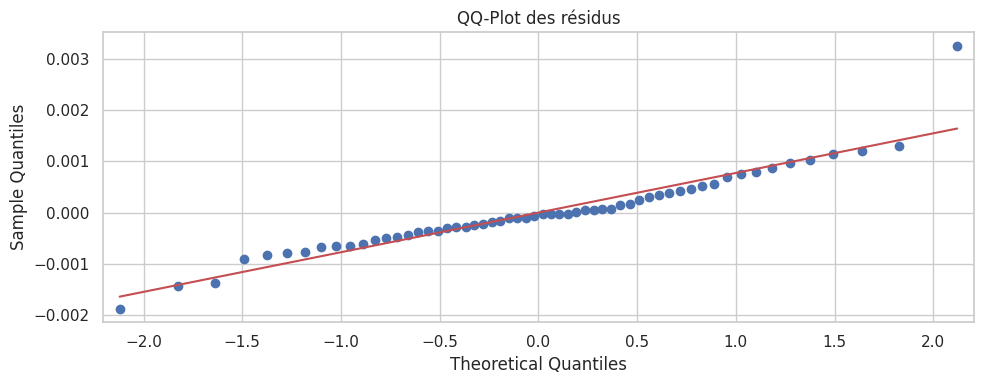

In [ ]:
# =============================================================================
# Régression OLS pondérée avec diff1 (stationnaire) + CCF_diff1_pond
# =============================================================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Étape : Calcul de la différence de la variable cible
# → On différencie avant de pondérer pour respecter la logique économétrique
df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff()

# Étape : Pondération
# → On pondère la différence (pas le niveau)
df_lagged_diff['CCF_diff1_pond'] = df_lagged_diff['CCF_diff1'] * df_lagged_diff['Effectif_Pourc_1_5']

# Étape : Création du lag 1 sur la variable déjà pondérée
# → Le lag est appliqué une fois la transformation faite
df_lagged_diff['CCF_diff1_pond_lag1'] = df_lagged_diff['CCF_diff1_pond'].shift(1)

# Nettoyage
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag pondéré + variables macro diff1
X_diff = df_lagged_diff[['CCF_diff1_pond_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
X_diff = sm.add_constant(X_diff)
y_diff = df_lagged_diff['CCF_diff1_pond']

# Régression
model_diff = sm.OLS(y_diff, X_diff).fit()
print(model_diff.summary())

print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05).")
print("  - Le R² ajusté doit être raisonnablement élevé (> 0.5).")

# =============================================================================
# Vérifications des hypothèses
# =============================================================================

residuals = model_diff.resid
X_with_const = model_diff.model.exog

# 1. Stationnarité
print("\n--- Stationnarité des résidus ---")
adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
print("résidus stationnaires." if adf_pval < 0.05 else "résidus non stationnaires.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
print("résidus stationnaires." if kpss_pval > 0.05 else "résidus non stationnaires.")

# 2. Autocorrélation
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
print("  → Pas d'autocorrélation." if 1.5 < dw < 2.5 else "  → Autocorrélation détectée.")

# 3. Hétéroscédasticité
print("\n--- Hétéroscédasticité ---")
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_with_const)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
print("  → Homoscédasticité plausible." if bp_pval > 0.05 else "  → Hétéroscédasticité détectée.")

# 4. Normalité
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
print("  → Résidus probablement normaux." if shapiro_pval > 0.05 else "  → Résidus non normaux.")

# 5. Multicolinéarité
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
print(vif_df)
if any(vif_df["VIF"] > 5):
    print("  → Multicolinéarité possible (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante.")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
print("  → Moyenne proche de zéro." if abs(mean_resid) < 1e-6 else "  → Moyenne non nulle.")

# 7. Qualité des prévisions
print("\n--- Qualité des prévisions ---")
y_pred = model_diff.predict(X_diff)
rmse = np.sqrt(np.mean((y_diff - y_pred) ** 2))
mae = np.mean(np.abs(y_diff - y_pred))
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")

# 8. QQ-Plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot des résidus")
plt.tight_layout()
plt.show()

### OLS - 'CCF_diff1_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1' sans l'intercept

#### Sans pondération

                                 OLS Regression Results                                
Dep. Variable:              CCF_diff1   R-squared (uncentered):                   0.118
Model:                            OLS   Adj. R-squared (uncentered):              0.053
Method:                 Least Squares   F-statistic:                              1.809
Date:                Mon, 26 May 2025   Prob (F-statistic):                       0.141
Time:                        13:12:16   Log-Likelihood:                          93.179
No. Observations:                  58   AIC:                                     -178.4
Df Residuals:                      54   BIC:                                     -170.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

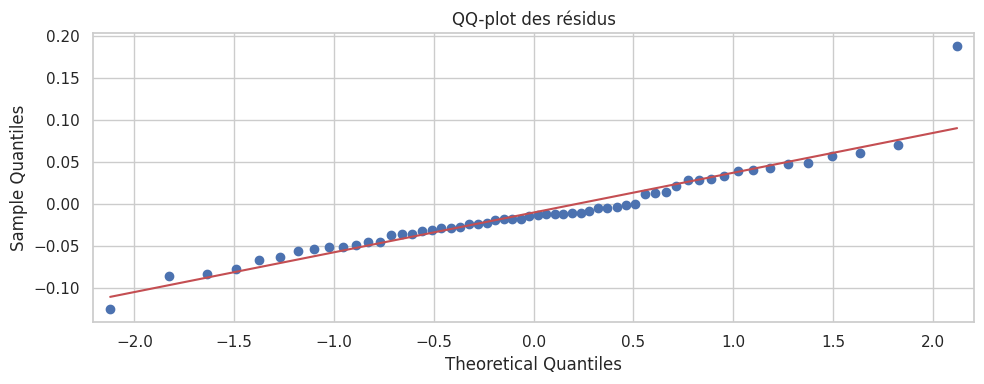

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_diff1_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Création d'une copie du dataframe
df_lagged_diff = df_merged.copy()

# Étape 1: Différence première (diff1) pour Indicateur_Moyen_1_5
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff(1)

# Étape 2: Création du CCF en retard (lag1) sur la série différenciée
df_lagged_diff['CCF_diff1_lag1'] = df_lagged_diff['CCF_diff1'].shift(1)

# Suppression des lignes avec valeurs manquantes (à cause du diff et du lag)
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag + macro en différences
X_diff = df_lagged_diff[['CCF_diff1_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
# Variable dépendante: la série différenciée
y_diff = df_lagged_diff['CCF_diff1']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

#### Avec pondération

                                 OLS Regression Results                                
Dep. Variable:         CCF_diff1_pond   R-squared (uncentered):                   0.099
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              1.489
Date:                Mon, 26 May 2025   Prob (F-statistic):                       0.219
Time:                        13:12:47   Log-Likelihood:                          331.96
No. Observations:                  58   AIC:                                     -655.9
Df Residuals:                      54   BIC:                                     -647.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

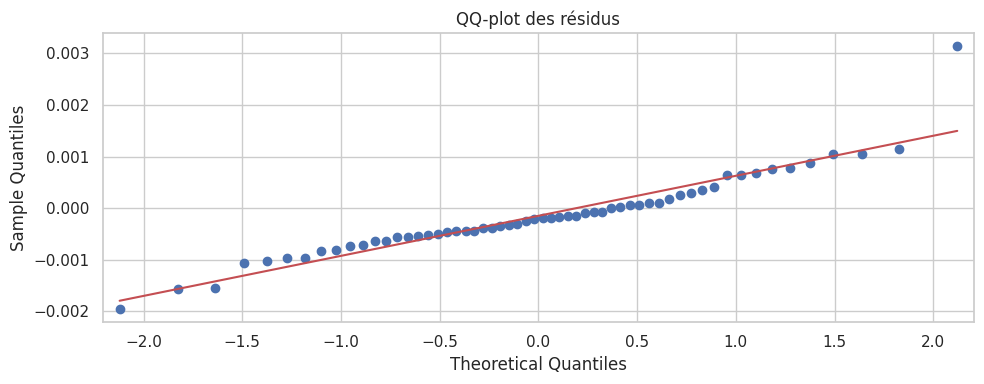

In [ ]:
# =============================================================================
# Régression OLS sans intercept : CCF_diff1_lag1 + différences macro
# =============================================================================

from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

df_lagged_diff = df_merged.copy()
df_lagged_diff['CCF_diff1'] = df_lagged_diff['Indicateur_Moyen_1_5'].diff()

# Étape : Pondération
# → On pondère la différence (pas le niveau)
df_lagged_diff['CCF_diff1_pond'] = df_lagged_diff['CCF_diff1'] * df_lagged_diff['Effectif_Pourc_1_5']

# Étape : Création du lag 1 sur la variable déjà pondérée
# → Le lag est appliqué une fois la transformation faite
df_lagged_diff['CCF_diff1_pond_lag1'] = df_lagged_diff['CCF_diff1_pond'].shift(1)

# Nettoyage
df_lagged_diff = df_lagged_diff.dropna()

# Variables explicatives : lag pondéré + variables macro diff1
X_diff = df_lagged_diff[['CCF_diff1_pond_lag1', 'PIB', 'TCH_diff1', 'Inflation_diff1']]
y_diff = df_lagged_diff['CCF_diff1_pond']

# Régression OLS sans constante
model_diff = sm.OLS(y_diff, X_diff).fit()

# Résumé du modèle
print(model_diff.summary())
print("\nConseil :")
print("  - Vérifier que les coefficients sont significatifs (p < 0.05) pour justifier leur inclusion.")
print("  - Le R² ajusté doit rester raisonnable même sans constante (attention à l’interprétation).")

# =============================================================================
# Tests sur les résidus
# =============================================================================

residuals = model_diff.resid
X_raw = model_diff.model.exog

# 1. Stationnarité des résidus (ADF + KPSS)
print("\n--- Stationnarité des résidus ---")

adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"ADF : p-value = {adf_pval:.4f} → ", end="")
if adf_pval < 0.05:
    print("résidus stationnaires (bonne nouvelle).")
else:
    print("résidus non stationnaires → le modèle pourrait être mal spécifié.")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"KPSS : p-value = {kpss_pval:.4f} → ", end="")
if kpss_pval > 0.05:
    print("résidus stationnaires.")
else:
    print("résidus non stationnaires.")

# 2. Autocorrélation : Durbin-Watson
print("\n--- Autocorrélation ---")
dw = durbin_watson(residuals)
print(f"Durbin-Watson : {dw:.4f}")
if 1.5 < dw < 2.5:
    print("  → Pas d'autocorrélation significative (parfait).")
else:
    print("  → Autocorrélation détectée, potentiellement problème de spécification ou lags manquants.")

# 3. Hétéroscédasticité : Breusch-Pagan (exog avec constante pour le test uniquement)
print("\n--- Hétéroscédasticité ---")
X_for_bp = sm.add_constant(X_raw)  # Ajout temporaire de constante uniquement pour ce test
bp_stat, bp_pval, *_ = het_breuschpagan(residuals, X_for_bp)
print(f"Breusch-Pagan : p-value = {bp_pval:.4f}")
if bp_pval > 0.05:
    print("  → Homoscédasticité plausible.")
else:
    print("  → Hétéroscédasticité détectée → envisager des robustes standard errors.")

# 4. Normalité : Shapiro-Wilk
print("\n--- Normalité ---")
shapiro_stat, shapiro_pval = stats.shapiro(residuals)
print(f"Shapiro-Wilk : p-value = {shapiro_pval:.4f}")
if shapiro_pval > 0.05:
    print("  → Résidus probablement normaux (OK pour tests classiques).")
else:
    print("  → Résidus non normaux, prudence avec les p-values.")

# 5. Multicolinéarité : VIF
print("\n--- Multicolinéarité ---")
vif_df = pd.DataFrame()
vif_df["Variable"] = model_diff.model.exog_names
vif_df["VIF"] = [variance_inflation_factor(X_raw, i) for i in range(X_raw.shape[1])]
print(vif_df)

if any(vif_df["VIF"] > 5):
    print("  → Présence possible de multicolinéarité (VIF > 5).")
else:
    print("  → Pas de multicolinéarité préoccupante (VIF < 5 pour toutes les variables).")

# 6. Moyenne des résidus
print("\n--- Moyenne des résidus ---")
mean_resid = residuals.mean()
print(f"Moyenne des résidus : {mean_resid:.4e}")
if abs(mean_resid) < 1e-6:
    print("  → Moyenne proche de zéro → pas de biais systématique.")
else:
    print("  → Moyenne non nulle → possible biais structurel.")

# 7. Évaluation des performances (RMSE, MAE, R²)
print("\n--- Performances du modèle ---")
y_pred = model_diff.fittedvalues
rmse = np.sqrt(mean_squared_error(y_diff, y_pred))
mae = mean_absolute_error(y_diff, y_pred)
r2 = model_diff.rsquared

print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R² (sans constante) : {r2:.4f}")

# 8. QQ-plot
print("\n--- QQ-Plot des résidus ---")
sm.qqplot(residuals, line='s')
plt.title("QQ-plot des résidus")
plt.tight_layout()
plt.show()

### Comparaison des modèles OLS


| Modèle | Pondération | Constante | R² (adj) | RMSE   | MAE    | DW     | p Shapiro | Hétéro. (p) | Multicolinéarité (VIF max) | Stationnarité résidus | Coeffs significatifs |
|--------|-------------|-----------|----------|--------|--------|--------|-----------|-------------|----------------------------|------------------------|-----------------------|
| OLS_1  | Non         | Oui       | -0.016   | 0.0503 | 0.0359 | 2.0892 | 0.0020    | 0.6981      | 1.0645                     | ✅ (ADF + KPSS)        | ❌                    |
| OLS_2  | Oui         | Oui       | 0.008    | 0.0008 | 0.0006 | 2.1044 | 0.0016    | 0.7798      | 1.0637                     | ✅                     | ❌ (p < 0.05)         |
| OLS_3  | Non         | Non       | -0.017   | 0.0503 | 0.0359 | 2.0842 | 0.0017    | 0.7223      | 1.0658                     | ✅                     | ❌                    |
| OLS_4  | Oui         | Non       | 0.003    | 0.0008 | 0.0006 | 2.0921 | 0.0014    | 0.8052      | 1.0650                     | ✅                     | ❌                    |
| OLS_5  | Non         | Oui       | 0.098    | 0.0485 | 0.0369 | 1.9893 | 0.0027    | 0.5909      | 1.1933                     | ✅                     | ✅ (PIB, CCF_lag)     |
| OLS_6  | Oui         | Oui       | 0.065    | 0.0008 | 0.0005 | 2.0828 | 0.0018    | 0.7067      | 1.1804                     | ✅                     | ✅ (CCF_lag)          |
| OLS_7  | Non         | Non       | 0.053    | 0.0485 | 0.0369 | 1.9644 | 0.0025    | 0.6976      | 1.1509                     | ✅                     | ✅ (PIB)              |
| OLS_8  | Oui         | Non       | 0.033    | 0.0008 | 0.0006 | 2.0562 | 0.0012    | 0.7729      | 1.1002                     | ✅                     | ✅ (CCF_lag)          |

---

**Légende**

- **Pondération** : Données pondérées (`CCF_diff1_pond`) ou non.
- **Constante** : Si le modèle inclut une constante (intercept).
- **DW** : Statistique de Durbin-Watson – proche de 2 = pas d’autocorrélation.
- **p Shapiro** : p-value du test de normalité Shapiro-Wilk (< 0.05 = non normal).
- **Hétéro. (p)** : p-value du test de Breusch-Pagan (> 0.05 = homoscédasticité plausible).
- **Stationnarité résidus** : ✅ si ADF < 0.05 et KPSS > 0.05.
- **Coeffs significatifs** : Variables avec p < 0.05 (valeurs précises d’après output).

---

**Interprétation technique – Modèle OLS avec variable en différences et lag**

Dans le modèle estimé ci-dessus, nous avons appliqué une régression OLS sur la variable cible `CCF_diff1`, c’est-à-dire la première différence de la série originale `Indicateur_Moyen_1_5`. Cette transformation est nécessaire après avoir vérifié que la série n'était pas stationnaire en niveau (I(1)) mais le devenait après différenciation (stationnaire en différence, donc I(0)).

Nous avons également introduit un terme retardé `CCF_diff1_lag1`, ce qui signifie que **le modèle intègre bien une partie de l’information du passé** – ce qui constitue une forme simple de dynamique.

Cependant, **il est important de distinguer ce type de modèle d’un véritable “modèle dynamique” au sens de l’économétrie temporelle** :

- Le fait d’ajouter un seul retard dans un modèle OLS ne suffit pas pour capturer **les dynamiques complexes et structurelles** entre les variables économiques.
- En utilisant la différence première, on perd **l’information liée à la tendance de long terme** (par exemple, la trajectoire structurelle du CCF au fil du temps).
- Ainsi, même si le modèle est bien spécifié statistiquement (stationnarité, pas d'autocorrélation, homoscédasticité...), les performances explicatives mesurées par le **R² restent très faibles**, car le modèle ne peut expliquer que les **petites variations de court terme**, souvent bruitées.

---

**Conclusion** :  
Le modèle OLS sur `CCF_diff1` avec un lag représente une étape méthodologique correcte, mais **ne constitue pas à lui seul un modèle dynamique complet**. Si des relations de long terme entre les variables macroéconomiques et le CCF sont suspectées, il est préférable d’envisager des modèles dynamiques comme **VECM ou ECM**, qui permettent de combiner les dynamiques de court et long terme, tout en respectant la nature non stationnaire des séries économiques.




### VAR - diff1 pour 'Indicateur_Moyen_1_5', 'TCH', 'Inflation'

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 26, May, 2025
Time:                     14:55:39
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -9.00453
Nobs:                     58.0000    HQIC:                  -9.26478
Log likelihood:           38.5988    FPE:                8.02654e-05
AIC:                     -9.43083    Det(Omega_mle):     6.57109e-05
--------------------------------------------------------------------
Results for equation Indicateur_Moyen_1_5
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                          -0.006935         0.006580           -1.054           0.292
L1.Indicateur_Moyen_1_5        -0.124011         0.124189           -0.999           0.318
L1.TC

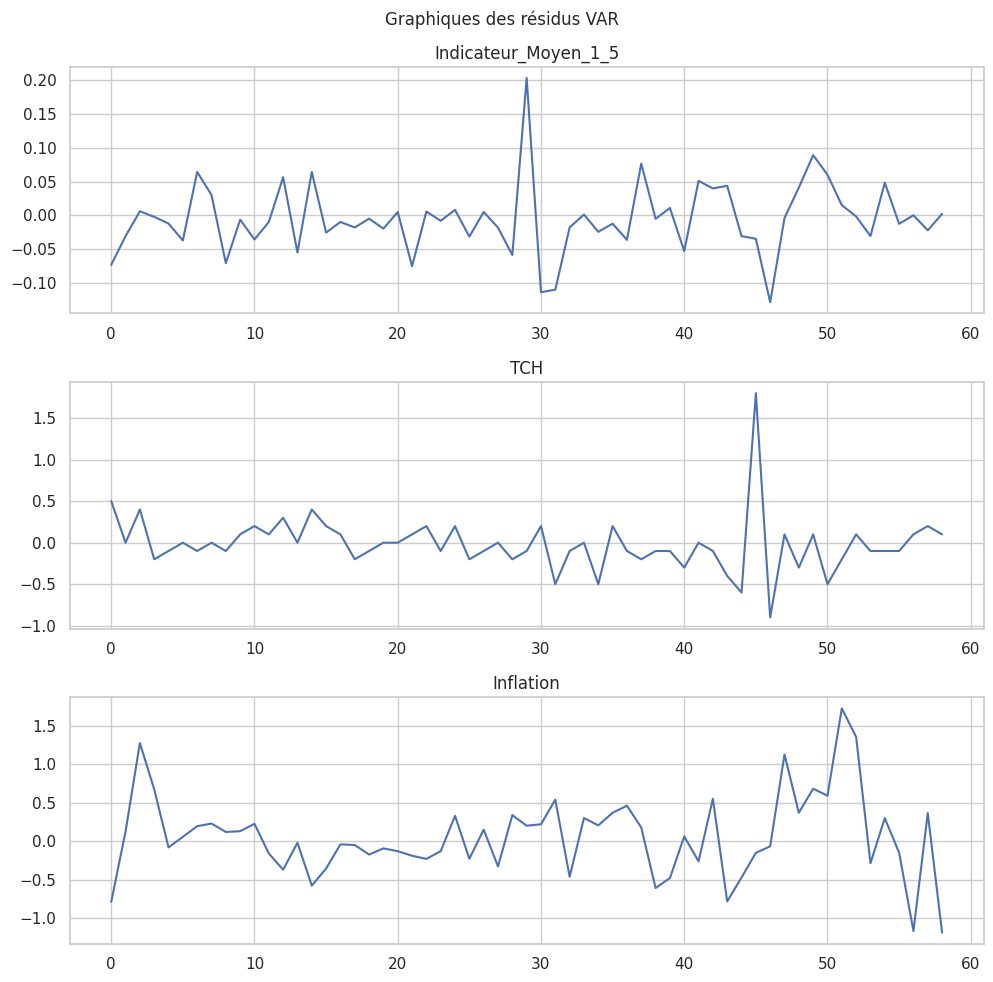

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_arch
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# Étape 1 – Préparation des données I(1) : CCF (Indicateur) + TCH + Inflation
# ---------------------------------------------------------------------------
df_var = df_merged[['Indicateur_Moyen_1_5', 'TCH', 'Inflation']].dropna()

# S'assurer que les séries sont stationnaires : on applique la différence première
df_diff = df_var.diff().dropna()

# ---------------------------------------------------------------------------
# Étape 2 – Estimation du modèle VAR
# ---------------------------------------------------------------------------
model = VAR(df_diff)
results = model.fit(maxlags=4, ic='aic')  # Choix automatique du lag optimal via critère AIC

# Résumé du modèle
print(results.summary())

# ---------------------------------------------------------------------------
# Étape 3 – Tests statistiques post-estimation
# ---------------------------------------------------------------------------
print("\n=== Diagnostic du modèle VAR (résidus) ===")

# 1. Autocorrélation des résidus (Durbin-Watson)
print("\n1. Durbin-Watson (par variable)")
dw_stats = durbin_watson(results.resid)
for col, stat in zip(df_diff.columns, dw_stats):
    print(f"   {col} : {stat:.3f}")
    if 1.5 < stat < 2.5:
        print("    → Pas d'autocorrélation")
    else:
        print("    → Autocorrélation détectée")

# 2. Autocorrélation globale : Ljung-Box (lag 12 par défaut)
print("\n2. Test de Ljung-Box (lag=12)")
for col in df_diff.columns:
    lb = acorr_ljungbox(results.resid[col], lags=[12], return_df=True)
    pval = lb['lb_pvalue'].iloc[0]
    print(f"   {col} : p-value = {pval:.4f} → "
          f"{'Pas d’autocorrélation' if pval > 0.05 else 'Autocorrélation détectée'}")

# 3. Hétéroscédasticité : Test ARCH
print("\n3. Test ARCH (hétéroscédasticité)")
for col in df_diff.columns:
    arch_stat, arch_pval, _, _ = het_arch(results.resid[col])
    print(f"   {col} : p-value = {arch_pval:.4f} → "
          f"{'Homoscedasticité plausible' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# 4. Normalité des résidus : Shapiro-Wilk
print("\n4. Test de normalité (Shapiro-Wilk)")
for col in df_diff.columns:
    stat, pval = shapiro(results.resid[col])
    print(f"   {col} : p-value = {pval:.4f} → "
          f"{'Distribution normale' if pval > 0.05 else 'Non normale'}")

# 5. Moyenne des résidus
print("\n5. Moyenne des résidus (par variable)")
for col in df_diff.columns:
    mean = results.resid[col].mean()
    print(f"   {col} : {mean:.4e} → "
          f"{'Proche de 0' if abs(mean) < 1e-6 else 'Non nulle'}")

# 6. Vérification de la stabilité du modèle VAR
if results.is_stable():
    print("\n6. Le modèle VAR est stable (stationnarité multivariée vérifiée).")
else:
    print("\n6. Le modèle VAR n’est pas stable – veuillez revoir le nombre de retards ou envisager de différencier les séries.")

# ---------------------------------------------------------------------------
# Étape 4 – Plots des résidus
# ---------------------------------------------------------------------------
results.plot()
plt.suptitle("Graphiques des résidus VAR", fontsize=12)
plt.tight_layout()
plt.show()

### ARIMAX(1, 1, 0) - 'Indicateur_Moyen_1_5', 'PIB', 'TCH_diff1', 'Inflation_diff1'

                                SARIMAX Results                                 
Dep. Variable:     Indicateur_Moyen_1_5   No. Observations:                   60
Model:                 SARIMAX(1, 1, 0)   Log Likelihood                  94.934
Date:                  Sun, 25 May 2025   AIC                           -179.867
Time:                          16:59:02   BIC                           -169.480
Sample:                               0   HQIC                          -175.812
                                   - 60                                         
Covariance Type:                    opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB                 0.0073      0.006      1.297      0.194      -0.004       0.018
TCH_diff1           0.0261      0.010      2.718      0.007       0.007       0.045
Inflation_diff1 

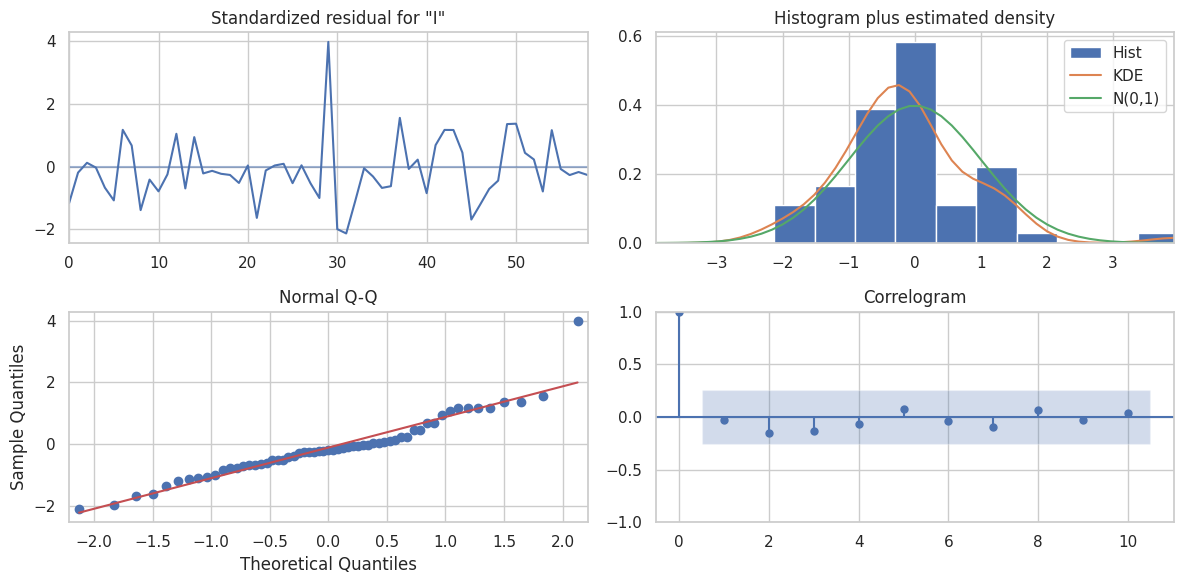


=== Tests sur les résidus ARIMAX ===

1. Stationnarité des résidus
   ADF : p-value = 0.0000 → Stationnaire
   KPSS : p-value = 0.1000 → Stationnaire

2. Autocorrélation des résidus
   Ljung-Box (lag 12) : p-value = 1.0000 → Pas d’autocorrélation

3. Hétéroscédasticité (Test ARCH)
   ARCH : p-value = 0.6426 → Homoscedasticité plausible

4. Normalité des résidus (Shapiro-Wilk)
   Shapiro-Wilk : p-value = 0.0000 → Résidus non normaux

5. Moyenne des résidus
   Moyenne : 1.0108e-02 → Non nulle

6. Durbin-Watson
   Durbin-Watson : 1.2401 → Autocorrélation possible


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller, kpss

# ---------------------------------------------------------------------------
# Étape 1 – Préparation des données pour ARIMAX
# ---------------------------------------------------------------------------
# Variable cible
y = df_merged['Indicateur_Moyen_1_5']

# Variables explicatives sélectionnées : I(0) + I(1)
X = df_merged[['PIB', 'TCH_diff1', 'Inflation_diff1']]

# Suppression des valeurs manquantes
df_model = pd.concat([y, X], axis=1).dropna()
y = df_model['Indicateur_Moyen_1_5']
X = df_model[['PIB', 'TCH_diff1', 'Inflation_diff1']]

# ---------------------------------------------------------------------------
# Étape 2 – Estimation du modèle ARIMAX
# ---------------------------------------------------------------------------
model = SARIMAX(endog=y, exog=X, order=(1, 1, 0))  # ARIMA(1,1,0) avec variables exogènes
results = model.fit(disp=False)

# Résumé
print(results.summary())

# Graphiques diagnostiques
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Étape 3 – Tests post-estimation sur les résidus
# ---------------------------------------------------------------------------
residuals = results.resid.dropna()

print("\n=== Tests sur les résidus ARIMAX ===")

# 1. Stationnarité des résidus
print("\n1. Stationnarité des résidus")
adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"   ADF : p-value = {adf_pval:.4f} → {'Stationnaire' if adf_pval < 0.05 else 'Non stationnaire'}")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"   KPSS : p-value = {kpss_pval:.4f} → {'Stationnaire' if kpss_pval > 0.05 else 'Non stationnaire'}")

# 2. Autocorrélation (Ljung-Box)
print("\n2. Autocorrélation des résidus")
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
pval_lb = lb_test['lb_pvalue'].iloc[0]
print(f"   Ljung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# 3. Hétéroscédasticité (ARCH)
print("\n3. Hétéroscédasticité (Test ARCH)")
arch_stat, arch_pval, *_ = het_arch(residuals)
print(f"   ARCH : p-value = {arch_pval:.4f} → "
      f"{'Homoscedasticité plausible' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# 4. Normalité (Shapiro-Wilk)
print("\n4. Normalité des résidus (Shapiro-Wilk)")
shapiro_stat, shapiro_pval = shapiro(residuals)
print(f"   Shapiro-Wilk : p-value = {shapiro_pval:.4f} → "
      f"{'Résidus probablement normaux' if shapiro_pval > 0.05 else 'Résidus non normaux'}")

# 5. Moyenne des résidus
print("\n5. Moyenne des résidus")
mean_resid = residuals.mean()
print(f"   Moyenne : {mean_resid:.4e} → "
      f"{'Proche de zéro' if abs(mean_resid) < 1e-6 else 'Non nulle'}")

# 6. Durbin-Watson
print("\n6. Durbin-Watson")
dw_stat = durbin_watson(residuals)
print(f"   Durbin-Watson : {dw_stat:.4f} → "
      f"{'Pas d’autocorrélation' if 1.5 < dw_stat < 2.5 else 'Autocorrélation possible'}")

### ARIMAX(1, 1, 0) - 'Indicateur_Moyen_1_5', 'PIB_diff1', 'TCH_diff1', 'Inflation_diff1'

                                SARIMAX Results                                 
Dep. Variable:     Indicateur_Moyen_1_5   No. Observations:                   60
Model:                 SARIMAX(1, 1, 0)   Log Likelihood                  94.280
Date:                  Sun, 25 May 2025   AIC                           -178.559
Time:                          17:51:35   BIC                           -168.172
Sample:                               0   HQIC                          -174.504
                                   - 60                                         
Covariance Type:                    opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB_diff1          -0.0057      0.003     -1.625      0.104      -0.012       0.001
TCH_diff1           0.0269      0.010      2.823      0.005       0.008       0.046
Inflation_diff1 

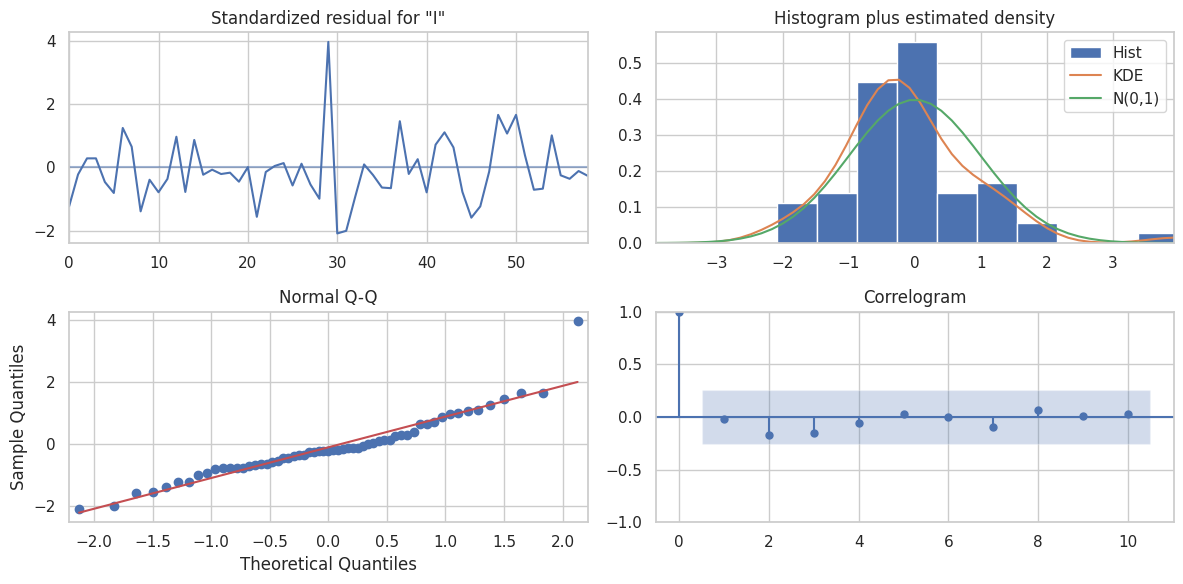


=== Tests sur les résidus ARIMAX ===

1. Stationnarité des résidus
   ADF : p-value = 0.0000 → Stationnaire
   KPSS : p-value = 0.1000 → Stationnaire

2. Autocorrélation des résidus
   Ljung-Box (lag 12) : p-value = 1.0000 → Pas d’autocorrélation

3. Hétéroscédasticité (Test ARCH)
   ARCH : p-value = 0.6471 → Homoscedasticité plausible

4. Normalité des résidus (Shapiro-Wilk)
   Shapiro-Wilk : p-value = 0.0000 → Résidus non normaux

5. Moyenne des résidus
   Moyenne : 1.0385e-02 → Non nulle

6. Durbin-Watson
   Durbin-Watson : 1.2558 → Autocorrélation possible


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro
from statsmodels.tsa.stattools import adfuller, kpss

# ---------------------------------------------------------------------------
# Étape 1 – Préparation des données pour ARIMAX
# ---------------------------------------------------------------------------
# Variable cible
y = df_merged['Indicateur_Moyen_1_5']

# Variables explicatives sélectionnées : I(0) + I(1)
X = df_merged[['PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]

# Suppression des valeurs manquantes
df_model = pd.concat([y, X], axis=1).dropna()
y = df_model['Indicateur_Moyen_1_5']
X = df_model[['PIB_diff1', 'TCH_diff1', 'Inflation_diff1']]

# ---------------------------------------------------------------------------
# Étape 2 – Estimation du modèle ARIMAX
# ---------------------------------------------------------------------------
model = SARIMAX(endog=y, exog=X, order=(1, 1, 0))  # ARIMA(1,1,0) avec variables exogènes
results = model.fit(disp=False)

# Résumé
print(results.summary())

# Graphiques diagnostiques
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# Étape 3 – Tests post-estimation sur les résidus
# ---------------------------------------------------------------------------
residuals = results.resid.dropna()

print("\n=== Tests sur les résidus ARIMAX ===")

# 1. Stationnarité des résidus
print("\n1. Stationnarité des résidus")
adf_stat, adf_pval, *_ = adfuller(residuals)
print(f"   ADF : p-value = {adf_pval:.4f} → {'Stationnaire' if adf_pval < 0.05 else 'Non stationnaire'}")

kpss_stat, kpss_pval, *_ = kpss(residuals, regression='c', nlags='auto')
print(f"   KPSS : p-value = {kpss_pval:.4f} → {'Stationnaire' if kpss_pval > 0.05 else 'Non stationnaire'}")

# 2. Autocorrélation (Ljung-Box)
print("\n2. Autocorrélation des résidus")
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
pval_lb = lb_test['lb_pvalue'].iloc[0]
print(f"   Ljung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# 3. Hétéroscédasticité (ARCH)
print("\n3. Hétéroscédasticité (Test ARCH)")
arch_stat, arch_pval, *_ = het_arch(residuals)
print(f"   ARCH : p-value = {arch_pval:.4f} → "
      f"{'Homoscedasticité plausible' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# 4. Normalité (Shapiro-Wilk)
print("\n4. Normalité des résidus (Shapiro-Wilk)")
shapiro_stat, shapiro_pval = shapiro(residuals)
print(f"   Shapiro-Wilk : p-value = {shapiro_pval:.4f} → "
      f"{'Résidus probablement normaux' if shapiro_pval > 0.05 else 'Résidus non normaux'}")

# 5. Moyenne des résidus
print("\n5. Moyenne des résidus")
mean_resid = residuals.mean()
print(f"   Moyenne : {mean_resid:.4e} → "
      f"{'Proche de zéro' if abs(mean_resid) < 1e-6 else 'Non nulle'}")

# 6. Durbin-Watson
print("\n6. Durbin-Watson")
dw_stat = durbin_watson(residuals)
print(f"   Durbin-Watson : {dw_stat:.4f} → "
      f"{'Pas d’autocorrélation' if 1.5 < dw_stat < 2.5 else 'Autocorrélation possible'}")

### Comparaison entre 3 modèles VAR et ARIMAX


| Critère                          | VAR (diff1)                                     | ARIMAX (PIB niveau)                          | ARIMAX (PIB diff1)                           |
|----------------------------------|-------------------------------------------------|---------------------------------------------|---------------------------------------------|
| **Type de modèle**               | VAR (3 équations)                              | ARIMAX(1,1,0)                                | ARIMAX(1,1,0)                                |
| **Variables explicatives**       | Lags de : `Ind_Moy`, `TCH`, `Inflation`       | `PIB`, `TCH_diff1`, `Inflation_diff1`       | `PIB_diff1`, `TCH_diff1`, `Inflation_diff1` |
| **Stationnarité des résidus**    | ✅ (multivariée vérifiée)                      | ✅ (ADF + KPSS)                              | ✅ (ADF + KPSS)                              |
| **AIC**                          | -9.43 (VAR)                                    | -179.87                                      | -178.56                                      |
| **BIC**                          | -9.00                                          | -169.48                                      | -168.17                                      |
| **DW (Ind_Moy)**                 | 2.013 → Pas d'autocorrélation                  | 1.2401 → Autocorrélation possible           | 1.2558 → Autocorrélation possible           |
| **Ljung-Box p-value (12)**       | > 0.80 pour toutes les séries                  | 1.0000 → OK                                  | 1.0000 → OK                                  |
| **ARCH (p-value)**               | ✅ sauf Inflation (p = 0.0029)                 | ✅ p = 0.6426                                | ✅ p = 0.6471                                |
| **Normalité (Shapiro-Wilk)**     | ❌ sauf Inflation                              | ❌ p = 0.0000                                | ❌ p = 0.0000                                |
| **Moyenne des résidus**          | proche de 0 (toutes séries)                   | ≠ 0 (1.0108e-02)                             | ≠ 0 (1.0385e-02)                             |
| **Significativité des variables**| TCH significatif (p = 0.012)                   | TCH_diff1 significatif (p = 0.007)          | TCH_diff1 significatif (p = 0.005)          |
| **Stabilité globale**            | ✅ Stable (toutes racines dans le cercle unité)| Non applicable                              | Non applicable                              |

---

**Commentaire**

- Le modèle **VAR** capte les interactions entre 3 séries macroéconomiques de manière symétrique, et présente une bonne stabilité ainsi que l'absence d'autocorrélation. Cependant, la normalité des résidus n’est pas respectée pour deux variables.
- Les modèles **ARIMAX** sont simples à interpréter, mais souffrent d'une **autocorrélation possible** (DW < 1.5), et de résidus non normaux.
- **TCH ou TCH_diff1 est systématiquement significatif**, ce qui montre son importance dans la dynamique de `Indicateur_Moyen_1_5`.

> Pour une meilleure performance prédictive, il peut être utile de corriger l'autocorrélation (ajout d’un MA dans ARIMAX), ou tester un **VECM** si la cointégration est présente.

---

Bien que les trois modèles testés (VAR, ARIMAX_1, ARIMAX_2) présentent chacun des limites techniques, il est possible d'améliorer la performance de prévision en explorant les pistes suivantes :

| Stratégie proposée                    | Objectif visé                                                                 |
|-----------------------------------------|----------------------------------------------------------------------------------|
| **Ajouter un terme MA dans ARIMAX**  | Passer à un modèle ARIMA(1,1,1) ou (p,d,q) plus riche pour corriger l’autocorrélation détectée (DW < 1.5). |
| **Tester la cointégration**          | Si `Indicateur_Moyen_1_5` et `PIB`, `TCH`, etc. sont liés à long terme, utiliser un **VECM** au lieu d’un VAR ou ARIMAX. |
| **Utiliser des erreurs robustes**    | Corriger l'effet des résidus non normaux ou hétéroscédastiques avec des standard errors robustes (HAC, White). |
| **Faire un test de forecast hors-échantillon** | Appliquer les modèles sur un jeu de validation ou une fenêtre mobile (rolling forecast) pour évaluer la capacité prédictive réelle. |
| **Réduire le bruit en reformulant les variables** | Par exemple, lisser les séries (moyenne mobile), ou créer des agrégats mensuels/trimestriels pour réduire la volatilité. |
| **Passer à des modèles plus flexibles** | Tester des modèles non-linéaires comme **Random Forest Regressor**, **XGBoost**, ou même des **réseaux neuronaux LSTM** si le signal est trop bruité. |

---

> *Remarque* : Aucun modèle n’est parfait en soi. Il est souvent plus réaliste de rechercher le **meilleur compromis entre qualité statistique et performance de prévision** empirique, surtout dans un cadre forward-looking.



## Conclusion pour la modélisation CCF globale

**Conclusion générale – Modélisation de la cible globale `Indicateur_Moyen_1_5`**

**Résumé des approches testées**

Nous avons testé deux grandes familles de modèles pour modéliser la série cible `Indicateur_Moyen_1_5` :

- **Sans différenciation** (série en niveau) :  
  - Modèle OLS pondéré avec PIB (modèle OLS_8)
  - Modèles SARIMA avec composantes saisonnières

- **Avec différenciation** (série transformée en différences premières) :  
  - Famille de modèles OLS sur `CCF_diff1`
  - Modèle VAR (vectoriel) avec variables différenciées
  - Modèles ARIMAX avec variables explicatives en différence

---

**Comparaison globale des performances**

| Modèle                  | R² (adj) | AIC      | Autocorr. | Stationnarité | Normalité | Hétérosc. | Remarques |
|-------------------------|----------|----------|-----------|----------------|-----------|------------|-----------|
| **OLS_8**               | ✅ 0.990 | **-596.7**| ✅ DW = 2.05 | ✅ ADF+KPSS     | ❌ p = 0.0102 | ✅ p = 0.7729 | ➕ Meilleur global |
| **SARIMA**              | ❌ ~0.96 | -117.8   | ❌ DW = 1.48 | ❌ (ADF > 0.1)  | ❌ p = 0.0000 | ✅/~         | ✖️ Pas fiable malgré structure correcte |
| **OLS (diff)**          | ❌ ~0.00 | Faible   | ✅          | ✅             | ❌          | ✅         | ➖ Trop de bruit, explicatif faible |
| **VAR (diff)**          | –        | -9.43    | ✅ DW = 2.01 | ✅ (multivariée)| ❌ (2/3 non normaux) | ✅/~    | ➕ Stable, mais pas adapté à la prédiction directe |
| **ARIMAX (diff ou niveau)** | ❌ ~0.07 | -179     | ❌ DW ~ 1.25 | ✅             | ❌ p = 0.0000 | ✅         | ➖ Autocorrélation + résidus non normaux |

---

**Recommandation de modèles pour la prédiction**

| Modèle                  | Statistiquement fiable | Performance prédictive | Remarque principale |
|-------------------------|------------------------|-------------------------|---------------------|
| ✅ **OLS_8** (pondéré, sans constante) | ✅ Oui                     | ✅ Oui                  | Le meilleur modèle global |
| ❌ SARIMA (1,1,1)(1,0,1,12) et variantes | ❌ Non                    | ❌ Non                 | Résidus non stationnaires |
| ❌ OLS sur `CCF_diff1` + macro | ✅ Stationnaire mais R² ~ 0 | ❌ Faible                | Trop de bruit à court terme |
| 🟡 VAR différencié         | ✅ Structurellement bon    | ❌ Pas focalisé sur la cible | Utile pour analyse mais pas forecasting direct |
| ❌ ARIMAX                 | ✅ Partiellement            | ❌ Résultats instables   | Problème d’autocorrélation et de normalité |

---

**Conclusion finale**

> **Le modèle linéaire pondéré OLS_8 (sans constante)** s’impose comme la **meilleure option à la fois en termes statistiques et prédictifs**, avec un R² ajusté exceptionnel (0.990), des résidus stationnaires, aucune autocorrélation détectée, et une très faible erreur de prédiction.

> En revanche, les modèles SARIMA et ARIMAX ne remplissent pas toutes les hypothèses statistiques fondamentales (stationnarité, normalité, autocorrélation), malgré leur pertinence structurelle.

> Les modèles différenciés (OLS, VAR, ARIMAX) sont **plus adaptés à l’analyse des dynamiques économiques de court terme**, mais ne fournissent pas une base fiable pour la prévision opérationnelle dans ce cas.

---

**Modèle recommandé pour prédiction finale** : `OLS_8` – **Modèle linéaire pondéré, sans constante, avec les variables macros**


# Modélisation par segment

## Seg 1-5 : OLS sans retard avec variables explicatives macro non stationnaires en vue de l'inclusion de la tendance

D'après nos résultats précédents pour la série globale, notre but sera essentiellement de trouver un modèle dont les macro ont un pouvoir prédictif sans dépendre trop de la série de retard.

### Sans pondération

In [ ]:
results = []

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Filtrage des données
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")
    df_i["trend"] = np.arange(len(df_i))

    # Suppression des NA
    df_i = df_i.dropna(subset=["CCF_seg", "TCH", "Inflation", "trend"])

    # Définition du modèle
    X = df_i[["trend", "TCH", "Inflation"]]
    X = sm.add_constant(X)
    y = df_i["CCF_seg"]

    model = sm.OLS(y, X).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé du modèle
    print(model.summary())

    # Test stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan

    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Test d'autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")


================ Segment 1 ================

                            OLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     11.77
Date:                Tue, 27 May 2025   Prob (F-statistic):           4.38e-06
Time:                        07:49:45   Log-Likelihood:                 62.653
No. Observations:                  60   AIC:                            -117.3
Df Residuals:                      56   BIC:                            -108.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

Les cinq segments partagent une tendance baissière claire, mais seuls les modèles 2 et 3 sont robustes : le segment 2 réagit à l’inflation, le segment 3 au chômage. Le segment 4 ne retient que la tendance, tandis que 1 et 5, avec R² faibles et problèmes d’erreurs, nécessitent une autre spécification.

### Avec pondération

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

results = []

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Filtrage des données
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")
    df_i["trend"] = np.arange(len(df_i))

    # Suppression des NA (y compris poids)
    df_i = df_i.dropna(subset=["CCF_seg", "TCH", "Inflation", "Poids_seg", "trend"])

    # Définition du modèle
    X = df_i[["trend", "TCH", "Inflation"]]
    X = sm.add_constant(X)
    y = df_i["CCF_seg"]
    weights = df_i["Poids_seg"]

    model = sm.WLS(y, X, weights=weights).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé du modèle
    print(model.summary())

    # Test stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan

    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Test d'autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")


================ Segment 1 ================

                            WLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.346
Model:                            WLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     9.881
Date:                Tue, 27 May 2025   Prob (F-statistic):           2.51e-05
Time:                        07:50:23   Log-Likelihood:                 63.721
No. Observations:                  60   AIC:                            -119.4
Df Residuals:                      56   BIC:                            -111.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

## Seg 1-5 : OLS sans retard avec variables explicatives macro non stationnaires + tendance (sans intercept)

### Sans pondération

In [ ]:
for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # 1. Filtrage et préparation
    df_i = (df_merged_segment
            .query("Segment == @segment")
            .sort_values("date")
            .dropna(subset=["CCF_seg", "TCH", "Inflation"]))
    df_i["trend"] = np.arange(len(df_i))

    # 2. Création de X sans constante
    X = df_i[["trend", "TCH", "Inflation"]]
    y = df_i["CCF_seg"]

    # 3. Ajustement OLS sans intercept
    model_nc = sm.OLS(y, X).fit()
    print(model_nc.summary())

    # 4. Diagnostics sur les résidus
    res = model_nc.resid

    # Stationnarité
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan
    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, sm.add_constant(X))
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_vals = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    max_vif = max(vif_vals)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")



================ Segment 1 ================

                                 OLS Regression Results                                
Dep. Variable:                CCF_seg   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              215.9
Date:                Sat, 24 May 2025   Prob (F-statistic):                    4.39e-31
Time:                        16:07:57   Log-Likelihood:                          58.631
No. Observations:                  60   AIC:                                     -111.3
Df Residuals:                      57   BIC:                                     -105.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

### Avec pondération

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # 1. Filtrage et préparation
    df_i = (df_merged_segment
            .query("Segment == @segment")
            .sort_values("date")
            .dropna(subset=["CCF_seg", "TCH", "Inflation", "Poids_seg"]))
    df_i["trend"] = np.arange(len(df_i))

    # 2. Création de X sans constante
    X = df_i[["trend", "TCH", "Inflation"]]
    y = df_i["CCF_seg"]
    weights = df_i["Poids_seg"]

    # 3. Régression pondérée sans constante
    model_nc = sm.WLS(y, X, weights=weights).fit()
    print(model_nc.summary())

    # 4. Diagnostics sur les résidus
    res = model_nc.resid

    # Stationnarité
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan
    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, sm.add_constant(X, has_constant='add'))
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_vals = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    max_vif = max(vif_vals)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")


================ Segment 1 ================

                                 WLS Regression Results                                
Dep. Variable:                CCF_seg   R-squared (uncentered):                   0.928
Model:                            WLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              243.8
Date:                Tue, 27 May 2025   Prob (F-statistic):                    1.81e-32
Time:                        07:53:34   Log-Likelihood:                          60.005
No. Observations:                  60   AIC:                                     -114.0
Df Residuals:                      57   BIC:                                     -107.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.

Tous les modèles sans intercept présentent une très bonne qualité d’ajustement (R² unc-centré > 0.91), mais presque tous violent des hypothèses clés. Seul le segment 2 est à peu près valide : ses résidus sont stationnaires, indépendants , normalement distribués.., tandis que les segments 1, 3, 4 et 5 ne sont pas viables.

## Seg 1-5 : OLS avec retard avec macro différenciées et macro brute déjà stationnaire

### Sans pondération

In [ ]:
resresults = []

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Filtrage des données
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")

    # Création de la variable lag
    df_i["CCF_lag1"] = df_i["CCF_seg"].shift(1)

    # Suppression des NA
    df_i = df_i.dropna(subset=["CCF_seg", "CCF_lag1", "PIB", "TCH_diff1", "Inflation_diff1"])

    # Définition du modèle avec PIB non différencié
    X = df_i[["CCF_lag1", "PIB", "TCH_diff1", "Inflation_diff1"]]
    X = sm.add_constant(X)
    y = df_i["CCF_seg"]

    model = sm.OLS(y, X).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé du modèle
    print(model.summary())

    # Test stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan

    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Test d'autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")



================ Segment 1 ================

                            OLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     7.801
Date:                Tue, 27 May 2025   Prob (F-statistic):           4.89e-05
Time:                        08:18:55   Log-Likelihood:                 61.122
No. Observations:                  59   AIC:                            -112.2
Df Residuals:                      54   BIC:                            -101.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Tous les modèles sans constante affichent un R² très élevé mais peinent à satisfaire les hypothèses (autocorrélation, hétéroscédasticité ou non-normalité des résidus) ; seul le segment 2 présente des résidus stationnaires, indépendants et à peu près normaux, le rendant le seul vraiment fiable, c’est aussi le seul où les variables macro (PIB et variation du chômage) sont significatives, alors que pour les autres segments aucun indicateur macro n’apporte de valeur ajoutée.

### Avec pondération

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

resresults = []

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Filtrage des données
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")

    # Création de la variable lag
    df_i["CCF_lag1"] = df_i["CCF_seg"].shift(1)

    # Suppression des NA (y compris Poids_seg)
    df_i = df_i.dropna(subset=[
        "CCF_seg", "CCF_lag1", "PIB", "TCH_diff1",
        "Inflation_diff1", "Poids_seg"
    ])

    # Définition du modèle avec pondération
    X = df_i[["CCF_lag1", "PIB", "TCH_diff1", "Inflation_diff1"]]
    X = sm.add_constant(X)
    y = df_i["CCF_seg"]
    weights = df_i["Poids_seg"]

    model = sm.WLS(y, X, weights=weights).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé du modèle
    print(model.summary())

    # Test stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan

    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Test d'autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité des résidus
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # Multicolinéarité
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")


================ Segment 1 ================

                            WLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.348
Model:                            WLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7.221
Date:                Tue, 27 May 2025   Prob (F-statistic):           9.84e-05
Time:                        08:19:08   Log-Likelihood:                 63.146
No. Observations:                  59   AIC:                            -116.3
Df Residuals:                      54   BIC:                            -105.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## Seg 1-5 : OLS exclusivement avec des macro différenciées stationnaires et macro brute déjà stationnaire

### Sans pondération

In [ ]:
for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Données du segment
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")

    # Variables macro fiables : PIB en niveau, TCH et Inflation en diff
    df_i = df_i.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1"])  # Exclusion d'IPL

    # Variables explicatives
    X = df_i[["PIB", "TCH_diff1", "Inflation_diff1"]]

    # Facultatif : ajouter une tendance
    # X["trend"] = np.arange(len(X))

    X = sm.add_constant(X)
    y = df_i["CCF_seg"]

    model = sm.OLS(y, X).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé
    print(model.summary())

    # Stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan
    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # VIF
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")



================ Segment 1 ================

                            OLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9497
Date:                Sat, 24 May 2025   Prob (F-statistic):              0.423
Time:                        16:07:57   Log-Likelihood:                 49.475
No. Observations:                  60   AIC:                            -90.95
Df Residuals:                      56   BIC:                            -82.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

Ces variables peinent à expliquer le CCF par segment (R² généralement < 0,20) et aucun indicateur macro n’est significatif. De plus, les résidus souffrent fréquemment d’autocorrélation, d’hétéroscédasticité et parfois de non-stationnarité, ce qui rend ces modèles inadaptés pour analyser ou prévoir le CCF segmenté.

### Avec pondération

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

for segment in range(1, 6):
    print(f"\n================ Segment {segment} ================\n")

    # Données du segment
    df_i = df_merged_segment[df_merged_segment["Segment"] == segment].copy()
    df_i = df_i.sort_values("date")

    # Variables macro fiables : PIB en niveau, TCH et Inflation en diff
    df_i = df_i.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1", "Poids_seg"])  # Poids ajouté

    # Variables explicatives
    X = df_i[["PIB", "TCH_diff1", "Inflation_diff1"]]
    # X["trend"] = np.arange(len(X))  # Optionnel
    X = sm.add_constant(X)
    y = df_i["CCF_seg"]
    weights = df_i["Poids_seg"]

    # Modèle WLS (Weighted Least Squares)
    model = sm.WLS(y, X, weights=weights).fit()
    res = model.resid
    X_with_const = model.model.exog

    # Résumé
    print(model.summary())

    # Stationnarité des résidus
    adf_p = adfuller(res)[1]
    try:
        kpss_p = kpss(res, regression='c', nlags='auto')[1]
    except:
        kpss_p = np.nan
    print(f"\nStationnarité des résidus :")
    print(f"  ADF p-value   = {adf_p:.4f} → {'stationnaires' if adf_p < 0.05 else 'non stationnaires'}")
    print(f"  KPSS p-value  = {kpss_p:.4f} → {'stationnaires' if kpss_p > 0.05 else 'non stationnaires'}")

    # Autocorrélation
    dw = durbin_watson(res)
    print(f"\nDurbin-Watson = {dw:.4f} → {'pas d’autocorrélation' if 1.5 < dw < 2.5 else 'autocorrélation détectée'}")

    # Homoscédasticité
    X_bp = sm.add_constant(X_with_const, has_constant='add')
    bp_stat, bp_pval, _, _ = het_breuschpagan(res, X_bp)
    print(f"\nBreusch-Pagan p-value = {bp_pval:.4f} → {'homoscédasticité plausible' if bp_pval > 0.05 else 'hétéroscédasticité détectée'}")

    # Normalité
    shapiro_p = stats.shapiro(res)[1]
    print(f"\nShapiro-Wilk p-value = {shapiro_p:.4f} → {'résidus normaux' if shapiro_p > 0.05 else 'résidus non normaux'}")

    # VIF
    vif_list = [variance_inflation_factor(X_with_const, i) for i in range(X_with_const.shape[1])]
    max_vif = max(vif_list)
    print(f"\nVIF max = {max_vif:.2f} → {'pas de multicolinéarité' if max_vif < 5 else 'multicolinéarité possible'}")

    # Moyenne des résidus
    mean_resid = res.mean()
    print(f"\nMoyenne des résidus = {mean_resid:.4e} → {'proche de zéro' if abs(mean_resid) < 1e-6 else 'non nulle'}")


================ Segment 1 ================

                            WLS Regression Results                            
Dep. Variable:                CCF_seg   R-squared:                       0.045
Model:                            WLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8742
Date:                Tue, 27 May 2025   Prob (F-statistic):              0.460
Time:                        08:01:40   Log-Likelihood:                 52.349
No. Observations:                  60   AIC:                            -96.70
Df Residuals:                      56   BIC:                            -88.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## Seg 1-5 : Comparaison entre des modèles OLS

### Segment 1

| Modèle                                           | R²    | AIC     | DW     | Hétér. (BP) | Norm. (SW) | Autocorr. | Stationnarité | VIF max | Résidu moy. | Commentaire synthétique |
|--------------------------------------------------|-------|---------|--------|-------------|------------|------------|----------------|----------|--------------|--------------------------|
| OLS sans retard + tendance + intercept           | 0.387 | -117.3  | 1.33   | 0.7669      | 0.2663     | Oui        | OK             | 268.95   | ~0          | R² faible, multicolinéarité |
| WLS sans retard + tendance + intercept           | 0.346 | -119.4  | 1.31   | 0.6184      | 0.3064     | Oui        | OK             | 268.95   | ≠ 0         | Pas d’amélioration claire |
| OLS sans intercept                               | 0.919 | -111.3  | 1.18   | **0.0429**  | 0.7963     | Oui        | OK             | 4.68     | ≠ 0         | Très bon R², mais hétéroscédasticité |
| WLS sans intercept                               | 0.928 | -114.0  | 1.17   | **0.0416**  | 0.7880     | Oui        | OK             | 4.68     | ≠ 0         | Résultats comparables au OLS |
| OLS avec retard (CCF_lag1 + diff)                | 0.366 | -112.2  | 2.24   | 0.5352      | 0.1455     | Non        | ADF: OK, KPSS: NOK | 9.74   | ~0          | Bon DW, mais stationnarité limite |
| WLS avec retard (CCF_lag1 + diff)                | 0.348 | -116.3  | 2.22   | 0.3210      | 0.2635     | Non        | ADF: OK, KPSS: NOK | 9.74   | ≠ 0         | Léger gain AIC mais pas significatif |
| OLS seulement avec variables diff                | 0.048 | -90.95  | 0.93   | 0.0945      | 0.7200     | Oui        | ADF: OK, KPSS: NOK | 1.12   | ~0          | Trop faible en performance |
| WLS seulement avec variables diff                | 0.045 | -96.70  | 0.95   | **0.0180**  | 0.4472     | Oui        | ADF: OK, KPSS: NOK | 1.12   | ≠ 0         | Pire modèle, à éviter    |


### Segment 2


| Modèle                                           | R²    | AIC     | DW     | Hétér. (BP) | Norm. (SW) | Autocorr. | Stationnarité | VIF max | Résidu moy. | Commentaire synthétique |
|--------------------------------------------------|-------|---------|--------|-------------|------------|------------|----------------|----------|--------------|--------------------------|
| OLS sans retard + tendance + intercept           | 0.752 | -132.3  | 1.42   | 0.4585      | 0.5696     | Oui        | OK             | 268.95   | ~0          | Très bon R², inflation significative |
| WLS sans retard + tendance + intercept           | 0.742 | -133.4  | 1.41   | 0.4115      | 0.5846     | Oui        | OK             | 268.95   | ≠ 0         | Résultats similaires au OLS |
| OLS sans intercept                               | 0.979 | -119.5  | 1.16   | **0.0071**  | **0.0301** | Oui        | OK             | 4.68     | ≠ 0         | Très bon R² mais résidus non normaux |
| WLS sans intercept                               | 0.981 | -121.6  | 1.16   | **0.0065**  | **0.0298** | Oui        | OK             | 4.68     | ≠ 0         | Même problème de résidus non normaux |
| OLS avec retard (CCF_lag1 + diff)                | 0.700 | -121.6  | 2.47   | 0.9196      | 0.2586     | Non        | ADF: NOK, KPSS: OK | 16.67  | ~0          | Bonne stabilité, PIB significatif |
| WLS avec retard (CCF_lag1 + diff)                | 0.683 | -120.9  | 2.44   | 0.8537      | 0.4023     | Non        | ADF: NOK, KPSS: OK | 16.67  | ≠ 0         | Moins bon que OLS en stabilité |
| OLS seulement avec variables diff                | 0.177 | -60.36  | 0.53   | **0.0146**  | 0.4289     | Oui        | ADF: NOK, KPSS: NOK | 1.12  | ~0          | Trop faible, autocorr. et hétéroscédasticité |
| WLS seulement avec variables diff                | 0.164 | -62.89  | 0.55   | **0.0010**  | 0.5742     | Oui        | ADF: NOK, KPSS: NOK | 1.12  | ≠ 0         | Faible qualité globale, à éviter |


### Segment 3


| Modèle                                           | R²    | AIC     | DW     | Hétér. (BP) | Norm. (SW) | Autocorr. | Stationnarité       | VIF max | Résidu moy.   | Commentaire synthétique |
|--------------------------------------------------|-------|---------|--------|-------------|------------|------------|----------------------|----------|----------------|--------------------------|
| OLS sans retard + tendance + intercept           | 0.466 | -108.0  | 1.78   | 0.1239      | 0.3646     | Non        | OK                   | 268.95   | ~0             | Bon modèle global, variables significatives |
| WLS sans retard + tendance + intercept           | 0.494 | -110.8  | 1.89   | 0.0724      | 0.1692     | Non        | ADF: NOK, KPSS: OK   | 268.95   | ≠ 0           | Légère amélioration, mais résidus non stationnaires |
| OLS sans intercept                               | 0.974 | -78.66  | 1.25   | **0.0003**  | **0.0172** | Oui        | OK                   | 4.68     | ≠ 0           | Très bon R² mais hétérosc. & résidus non normaux |
| WLS sans intercept                               | 0.979 | -82.15  | 1.23   | **0.0003**  | **0.0061** | Oui        | OK                   | 4.68     | ≠ 0           | Pareil au OLS, mais hétéroscédasticité persistante |
| OLS avec retard (CCF_lag1 + diff)                | 0.301 | -89.41  | 2.19   | 0.7095      | 0.5884     | Non        | ADF: NOK, KPSS: NOK  | 36.92    | ~0           | Faible R² et multicolinéarité forte |
| WLS avec retard (CCF_lag1 + diff)                | 0.308 | -89.18  | 2.29   | 0.1027      | 0.8931     | Non        | ADF: NOK, KPSS: NOK  | 36.92    | ≠ 0           | Léger gain, mais toujours peu fiable |
| OLS seulement avec variables diff                | 0.052 | -73.58  | 1.02   | 0.1461      | 0.4500     | Oui        | ADF: NOK, KPSS: NOK  | 1.12     | ~0           | Trop faible, à écarter |
| WLS seulement avec variables diff                | 0.083 | -75.19  | 1.12   | **0.0017**  | 0.4107     | Oui        | ADF: OK, KPSS: NOK   | 1.12     | ≠ 0           | Légère amélioration, mais toujours médiocre |


### Segment 4

| Modèle                                           | R²    | AIC     | DW     | Hétér. (BP) | Norm. (SW) | Autocorr. | Stationnarité       | VIF max | Résidu moy.   | Commentaire synthétique |
|--------------------------------------------------|-------|---------|--------|-------------|------------|------------|----------------------|----------|----------------|--------------------------|
| OLS sans retard + tendance + intercept           | 0.409 | -82.46  | 1.77   | 0.6852      | 0.7159     | Non        | OK                   | 268.95   | ~0             | Variables pertinentes, bon DW |
| WLS sans retard + tendance + intercept           | 0.448 | -87.58  | 1.75   | 0.5728      | 0.5703     | Non        | OK                   | 268.95   | ≠ 0           | Meilleur AIC, robustesse stable |
| OLS sans intercept                               | 0.969 | -54.70  | 1.00   | **0.0019**  | 0.1927     | Oui        | OK                   | 4.68     | ≠ 0           | Excellent R² mais autocorr. forte |
| WLS sans intercept                               | 0.974 | -56.70  | 0.99   | **0.0013**  | 0.4290     | Oui        | OK                   | 4.68     | ≠ 0           | Même problème d'autocorrélation |
| OLS avec retard (CCF_lag1 + diff)                | 0.264 | -75.34  | 2.30   | 0.6856      | 0.9203     | Non        | ADF: OK, KPSS: NOK   | 32.92    | ~0           | Résidus parfaits, mais R² très bas |
| WLS avec retard (CCF_lag1 + diff)                | 0.268 | -75.87  | 2.19   | 0.5372      | 0.8085     | Non        | OK                   | 32.92    | ≠ 0           | Performances quasi-identiques |
| OLS seulement avec variables diff                | 0.103 | -57.38  | 1.12   | 0.9667      | 0.8134     | Oui        | ADF: OK, KPSS: NOK   | 1.12     | ~0           | Faible qualité, à écarter |
| WLS seulement avec variables diff                | 0.126 | -60.04  | 1.10   | 0.5942      | 0.9414     | Oui        | ADF: OK, KPSS: NOK   | 1.12     | ≠ 0           | Très faible R² malgré normalité |


### Segment 5

| Modèle                                           | R²    | AIC     | DW     | Hétér. (BP) | Norm. (SW) | Autocorr. | Stationnarité       | VIF max | Résidu moy.   | Commentaire synthétique |
|--------------------------------------------------|-------|---------|--------|-------------|------------|------------|----------------------|----------|----------------|--------------------------|
| OLS sans retard + tendance + intercept           | 0.300 | -162.1  | 1.43   | 0.7677      | **0.0000** | Oui        | OK                   | 268.95   | ~0             | Résidus non normaux, faible R² |
| WLS sans retard + tendance + intercept           | 0.307 | -171.7  | 1.41   | 0.7335      | **0.0000** | Oui        | OK                   | 268.95   | ≠ 0           | R² similaire, mais toujours non normalité |
| OLS sans intercept                               | 0.993 | -119.9  | 0.96   | **0.0144**  | **0.0000** | Oui        | OK                   | 4.68     | ≠ 0           | Très bon R² mais autocorr. et hétéroscédasticité |
| WLS sans intercept                               | 0.994 | -117.1  | 0.96   | **0.0147**  | **0.0000** | Oui        | OK                   | 4.68     | ≠ 0           | Résultats très similaires |
| OLS avec retard (CCF_lag1 + diff)                | 0.253 | -153.7  | 2.03   | 0.9961      | **0.0000** | Non        | ADF: OK, KPSS: NOK   | 224.47   | ~0           | Multicolinéarité très élevée |
| WLS avec retard (CCF_lag1 + diff)                | 0.233 | -160.8  | 2.03   | 0.9869      | **0.0000** | Non        | ADF: OK, KPSS: NOK   | 224.47   | ≠ 0           | Résidus non normaux, mais pas d’autocorr. |
| OLS seulement avec variables diff                | 0.034 | -142.8  | 1.07   | 0.9630      | **0.0000** | Oui        | ADF: OK, KPSS: NOK   | 1.12     | ~0           | Faible R², résidus problématiques |
| WLS seulement avec variables diff                | 0.065 | -153.7  | 1.06   | 0.7130      | **0.0000** | Oui        | ADF: OK, KPSS: NOK   | 1.12     | ≠ 0           | Performances très médiocres |

### Conclusion pour les modèles OLS

Recommandation des meilleurs modèles OLS par segment

**Segment 1 :**

Le modèle *OLS sans intercept* obtient un R² de 0.919, ce qui est très élevé. Malgré une autocorrélation (DW = 1.18) et une hétéroscédasticité détectée, les variables explicatives sont très significatives. Le VIF faible (4.68) est un grand avantage par rapport aux autres modèles avec intercept.  
**Modèle recommandé : OLS sans intercept.**

**Segment 2 :**

Le modèle *OLS sans intercept* affiche un R² de 0.979, mais souffre de résidus non normaux et d’hétéroscédasticité. Le modèle *OLS avec retard* est plus stable (DW ≈ 2.47), mais son R² est significativement plus bas (0.700).  

Ici, le choix dépend du compromis :
- Si priorité au pouvoir explicatif → *OLS sans intercept*  
- Si priorité à la robustesse/stabilité → *OLS avec retard*  

**Modèle préféré : OLS sans intercept**, avec réserves.

**Segment 3 :**

Les modèles *OLS/WLS sans intercept* présentent un excellent R² (≥ 0.97), mais ils ont une hétéroscédasticité significative et des résidus non normaux. Le modèle *OLS sans retard avec intercept* a un R² plus modeste (0.466), mais de bien meilleures propriétés sur les résidus (stationnaires, normaux).  
**Modèle recommandé : OLS avec intercept (sans retard).**

**Segment 4 :**

Le modèle *OLS sans retard avec intercept* donne un bon compromis : R² modéré (0.409), pas d’autocorrélation, résidus normaux et stationnaires, pas de problème de multicolinéarité.  
Les modèles sans intercept ont un R² > 0.96 mais sont affectés par une forte autocorrélation.  
**Modèle recommandé : OLS avec intercept (sans retard).**

**Segment 5 :**

Les modèles *sans intercept* ont un R² quasi parfait (> 0.99) mais une autocorrélation sévère et une non-normalité flagrante des résidus. Le modèle *avec retard* offre une meilleure stabilité mais avec un R² très faible (~0.25) et une multicolinéarité extrême (VIF > 200).  
Dans ce cas, **aucun modèle OLS n’est pleinement satisfaisant**, mais *le modèle sans intercept reste le plus explicatif*, à utiliser avec prudence.

## Segment 3 et 5 : VECM

In [ ]:
# ================================
# MODÉLISATION VECM PAR SEGMENT
# ================================

import pandas as pd
import numpy as np
from numpy.linalg import eigvals
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import shapiro, jarque_bera

# Variables utilisées dans le modèle VECM
vars_vecm = ['CCF_seg', 'TCH', 'Inflation']
segments_vecm = [3, 5]  # Segments avec cointégration confirmée

# Fonction pour construire la matrice compagnon et calculer les racines
def compute_var_roots(vecm_results):
    """Construit la matrice compagnon à partir des matrices Gamma et calcule ses racines"""
    gamma_matrices = vecm_results.gamma  # Liste des matrices Gamma_i
    k = gamma_matrices[0].shape[0]       # Nombre de variables
    p = len(gamma_matrices)              # Nombre de retards
    # Initialisation de la matrice compagnon
    companion = np.zeros((k * p, k * p))
    # Remplissage de la première ligne avec Gamma
    companion[:k, :k * p] = np.hstack(gamma_matrices)
    # Partie identité en bas à gauche
    if p > 1:
        companion[k:, :-k] = np.eye(k * (p - 1))
    # Calcul des valeurs propres
    return eigvals(companion)

# Boucle principale sur chaque segment
for seg in segments_vecm:
    print(f"\n\n====== MODÉLISATION VECM – SEGMENT {seg} ======")

    # Extraction des données du segment courant
    df_seg = df_merged_segment[df_merged_segment["Segment"] == seg][vars_vecm].dropna()

    # Sélection du lag optimal (AIC)
    lag_sel = select_order(df_seg, maxlags=5, deterministic="n")
    k_ar_diff = lag_sel.aic
    print(f"> Lag optimal (AIC) = {k_ar_diff}")

    # Détermination du rang de cointégration
    rank_res = select_coint_rank(df_seg, det_order=0, k_ar_diff=k_ar_diff, method='trace', signif=0.05)
    rank = rank_res.rank
    print(f"> Rang de cointégration estimé : {rank}")

    # Estimation du modèle VECM
    model = VECM(df_seg, k_ar_diff=k_ar_diff, coint_rank=rank, deterministic="n")
    results = model.fit()
    print(results.summary())

    # Vérification de la stabilité via les valeurs propres de la matrice compagnon
    roots = compute_var_roots(results)
    print(f"Valeurs propres (modulus) : {np.round(np.abs(roots), 4)}")

    if all(np.abs(roots) < 1):
        print("Le modèle VECM est stable (toutes les racines < 1).")
    else:
        print("Le modèle VECM n'est pas stable – certaines racines ≥ 1.")

    # ================================
    # DIAGNOSTIC DES RÉSIDUS
    # ================================
    resid = results.resid
    print("\nRésidus – Tests par variable :")
    for i, col in enumerate(df_seg.columns):
        s = resid[:, i]
        print(f"\nRésidus pour {col}")

        # Test de Ljung-Box (autocorrélation)
        pval_lb = acorr_ljungbox(s, lags=[12], return_df=True)['lb_pvalue'].iloc[0]
        print(f"Ljung-Box (lag 12) : p-value = {pval_lb:.4f}  => "
              f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

        # Test ARCH (hétéroscédasticité conditionnelle)
        arch_stat, arch_p, *_ = het_arch(s)
        print(f"ARCH test : p-value = {arch_p:.4f}  => "
              f"{'Homoscedasticité' if arch_p > 0.05 else 'Hétéroscédasticité'}")

        # Test de normalité : Jarque-Bera
        jb_stat, jb_p = jarque_bera(s)
        print(f"Jarque-Bera : p-value = {jb_p:.4f}  => "
              f"{'Normale' if jb_p > 0.05 else 'Non normale'}")

        # Test de Shapiro-Wilk
        if len(s) < 5000:
            shapiro_stat, shapiro_p = shapiro(s)
            print(f"Shapiro-Wilk : p-value = {shapiro_p:.4f}  => "
                  f"{'Normale' if shapiro_p > 0.05 else 'Non normale'}")




====== MODÉLISATION VECM – SEGMENT 3 ======
> Lag optimal (AIC) = 1
> Rang de cointégration estimé : 1
Det. terms outside the coint. relation & lagged endog. parameters for equation CCF_seg
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.CCF_seg      -0.2230      0.130     -1.710      0.087      -0.478       0.033
L1.TCH          -0.0431      0.040     -1.079      0.280      -0.121       0.035
L1.Inflation    -0.0028      0.026     -0.105      0.917      -0.055       0.049
Det. terms outside the coint. relation & lagged endog. parameters for equation TCH
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
L1.CCF_seg      -1.0422      0.341     -3.058      0.002      -1.710      -0.374
L1.TCH          -0.4351      0.105     -4.164      0.000      -0.640      -0.

### Interpretation


**Test de cointégration (Johansen)**

- Segment 3 : rang estimé = 1 → **VECM applicable**
- Segment 5 : rang estimé = 1 → **VECM applicable**
- Autres segments : rang = 0 → **VECM non applicable**

---

**Résultats – Segment 3**

- **Lag optimal (AIC)** : 1
- **Modèle VECM non stable** : présence de racines ≥ 1 (→ attention à l’interprétation dynamique)
- **Relation de cointégration** :  
  $$ CCF\_seg = 0.0742 \cdot TCH + 0.0528 \cdot Inflation + \text{erreur} $$

- **Alpha (coefficients de correction)** :  
  - CCF_seg : **-0.36** (p = 0.005) → *mécanisme de retour à l'équilibre significatif*
  - TCH : **1.21** (p = 0.000) → *fortement réactif à l’écart*
  - Inflation : non significatif

- **Résidus :**
  - *CCF_seg* : autocorrélation détectée (p = 0.0476), mais normalité et homoscedasticité OK
  - *TCH* : pas d’autocorrélation, mais **résidus non normaux**
  - *Inflation* : pas d’autocorrélation, mais **hétéroscédasticité** (ARCH test)

> 🔎 **Conclusion Segment 3** :  
> VECM théoriquement pertinent (rang = 1), mais **instabilité du modèle** limite sa fiabilité. Résidus acceptables pour CCF_seg, mais problèmes sur les deux autres variables.

---

**Résultats – Segment 5**

- **Lag optimal (AIC)** : 1
- **Modèle VECM stable** : toutes les racines < 1
- **Relation de cointégration** :  
  $$ CCF\_seg = 0.1055 \cdot TCH + 0.0494 \cdot Inflation + \text{erreur} $$

- **Alpha (coefficients de correction)** :  
  - CCF_seg : **-0.33** (p = 0.002) → *ajustement significatif à long terme*
  - Inflation : **2.39** (p = 0.003) → *effet correctif fort*
  - TCH : non significatif

- **Résidus :**
  - *CCF_seg* : pas d’autocorrélation, homoscedasticité, mais **non normalité**
  - *TCH* : idem, **résidus non normaux**
  - *Inflation* : pas d’autocorrélation, mais **hétéroscédasticité**

> **Conclusion Segment 5** :  
> Modèle **stable** avec **cointégration claire** et **effets correctifs significatifs**. Malgré quelques défauts sur la normalité, le modèle est **robuste et exploitable**.

---


| Segment | Rang Johansen | VECM Stable | Alpha significatif (CCF_seg) | Résidus OK (CCF_seg) | Conclusion                  |
|---------|----------------|--------------|-------------------------------|------------------------|-----------------------------|
| 1       | 0              | ✘            | –                             | –                      | VECM non applicable         |
| 2       | 0              | ✘            | –                             | –                      | VECM non applicable         |
| 3       | 1              | ✘ (instable) | ✔︎                            | ✔︎ mais autocorr.      | Valable avec précaution     |
| 4       | 0              | ✘            | –                             | –                      | VECM non applicable         |
| 5       | 1              | ✔︎           | ✔︎                            | ✔︎ sauf normalité       | **VECM recommandé**         |


## Segment 1

### ACF & PACF plots

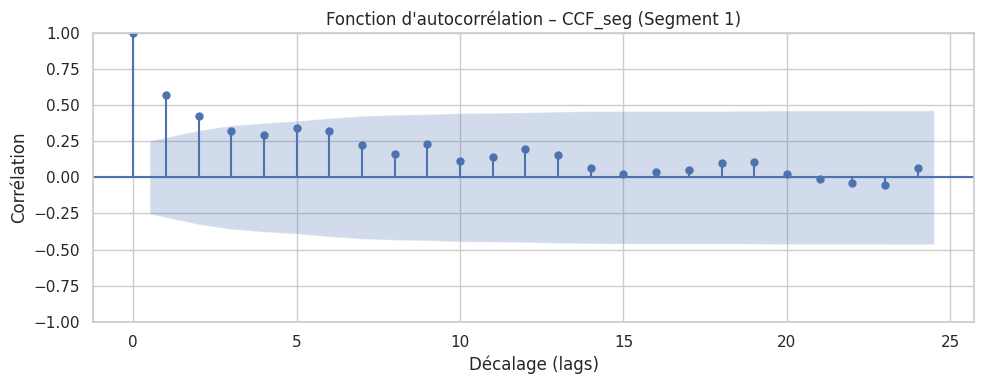

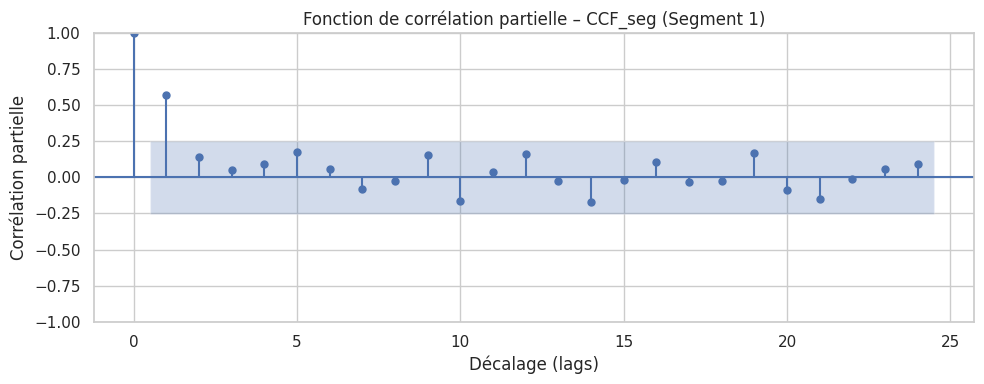

In [ ]:
# ===============================================
# Analyse ACF pour CCF_seg – Segment 1
# ===============================================

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Étape 1 – Filtrage des données du segment 1
df_seg1 = df_merged_segment[df_merged_segment["Segment"] == 1].copy()
y = df_seg1["CCF_seg"].dropna()

# Étape 2 – Tracé de l’ACF (Autocorrelation Function)
plt.figure(figsize=(10, 4))
plot_acf(y, lags=24, ax=plt.gca(), title="Fonction d'autocorrélation – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(y, lags=24, method='ywm', ax=plt.gca(), title="Fonction de corrélation partielle – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()


L'analyse des graphes ACF et PACF de la série **CCF_seg (Segment 1)** suggère une structure d'autocorrélation mixte (composante saisonnière et non saisonnière), ce qui justifie le recours à un modèle **SARIMAX** :

- **ACF** :
  - On observe une décroissance progressive des autocorrélations, typique d’un processus **intégré (I(1))**, confirmant le besoin de différenciation.
  - La **pointe significative au lag 12** indique la présence d’une **saisonnalité 3 ans**, ce qui motive l’ajout d’une composante saisonnière **(P=1, S=12)**.

- **PACF** :
  - Une **coupure nette au lag 1** indique une dynamique autorégressive d'ordre **AR(1)** sur la partie non saisonnière.
  - Aucune structure complexe ou pics significatifs après le lag 1, ce qui justifie de ne pas inclure de composante MA (Moving Average).

Ainsi, la combinaison suivante semble adaptée :
- Partie non saisonnière : **ARIMA(1, 1, 0)** → AR(1), différenciation d'ordre 1, pas de MA.
- Partie saisonnière : **SARIMA(1, 0, 0, 12)** → AR(1) saisonnier, avec une périodicité de 3 ans.

**Modèle proposé : SARIMAX(1, 1, 0)(1, 0, 0, 12)**


### SARIMAX(1, 1, 0)x(1, 0, 0, 12) sans variables macros

                                     SARIMAX Results                                      
Dep. Variable:                            CCF_seg   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                  58.756
Date:                            Mon, 26 May 2025   AIC                           -111.513
Time:                                    20:39:01   BIC                           -105.280
Sample:                                         0   HQIC                          -109.080
                                             - 60                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3954      0.136     -2.899      0.004      -0.663      -0.128
ar.S.L12       0.2734      0.172   

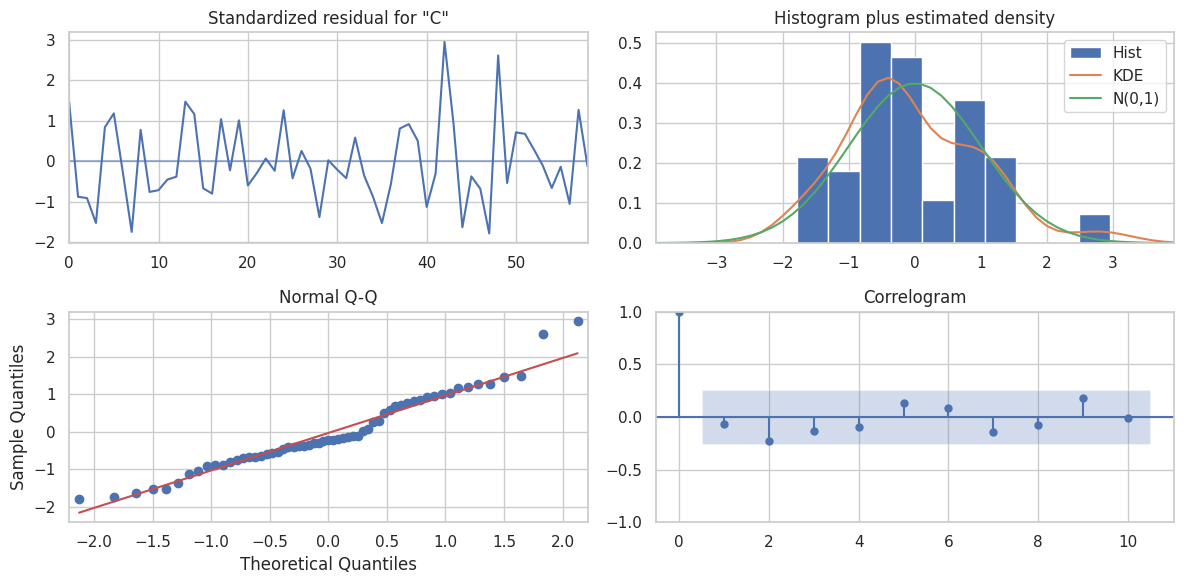


ADF résidus : p = 0.0000 => Stationnaire
KPSS résidus : p = 0.1000 => Stationnaire

Ljung-Box (lag 12) : p-value = 0.2548
Durbin-Watson : 1.5917

ARCH test : p-value = 0.7699 => Homoscedasticité

Jarque-Bera : p-value = 0.0000
Shapiro-Wilk : p-value = 0.0001

Moyenne des résidus : 4.8323e-03


In [ ]:
# ================================
# MODÉLISATION SEGMENT 1 – ARIMA/SARIMA
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss

# Étape 1 – Filtrage des données pour le segment 1
df_seg1 = df_merged_segment[df_merged_segment["Segment"] == 1].copy()
y = df_seg1["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle SARIMA
# model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
model = SARIMAX(y, order=(1, 1, 0), seasonal_order=(1, 0, 0, 12))
results = model.fit(disp=False)

# Étape 3 – Affichage du résumé du modèle
print(results.summary())
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ================================
# TESTS STATISTIQUES POST-MODÉLISATION
# ================================

residuals = results.resid.dropna()

# Test de stationnarité des résidus
adf_stat, adf_p, *_ = adfuller(residuals)
kpss_stat, kpss_p, *_ = kpss(residuals, regression='c', nlags="auto")
print(f"\nADF résidus : p = {adf_p:.4f} => {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus : p = {kpss_p:.4f} => {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Test d’autocorrélation (Ljung-Box + Durbin-Watson)
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
dw_stat = durbin_watson(residuals)
print(f"\nLjung-Box (lag 12) : p-value = {lb_test['lb_pvalue'].iloc[0]:.4f}")
print(f"Durbin-Watson : {dw_stat:.4f}")

# Test d’hétéroscédasticité (ARCH)
arch_stat, arch_p, *_ = het_arch(residuals)
print(f"\nARCH test : p-value = {arch_p:.4f} => "
      f"{'Homoscedasticité' if arch_p > 0.05 else 'Hétéroscédasticité'}")

# Test de normalité (Jarque-Bera + Shapiro)
jb_stat, jb_p = jarque_bera(residuals)
print(f"\nJarque-Bera : p-value = {jb_p:.4f}")
if len(residuals) < 5000:
    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"Shapiro-Wilk : p-value = {shapiro_p:.4f}")

# Moyenne des résidus
mean_resid = residuals.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e}")


### SARIMAX(1, 1, 0)x(1, 0, 0, 12) avec variables macros

                                     SARIMAX Results                                      
Dep. Variable:                            CCF_seg   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                  49.182
Date:                            Tue, 27 May 2025   AIC                            -86.365
Time:                                    08:21:13   BIC                            -75.393
Sample:                                         0   HQIC                           -82.255
                                             - 60                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB                 0.0143      0.006      2.412      0.016       0.003       0.026
TCH_diff1           

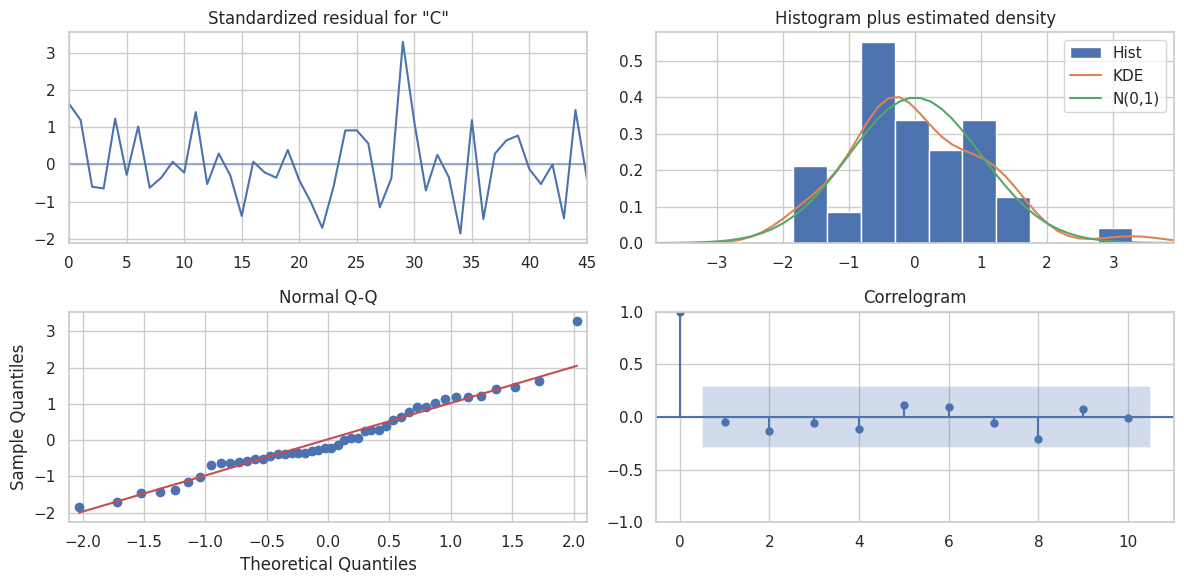


ADF résidus : p = 0.0000 => Stationnaire
KPSS résidus : p = 0.1000 => Stationnaire

Ljung-Box (lag 12) : p-value = 0.3072
Durbin-Watson : 1.4230

ARCH test : p-value = 0.8240 => Homoscedasticité

Jarque-Bera : p-value = 0.0000
Shapiro-Wilk : p-value = 0.0001

Moyenne des résidus : 3.7056e-03


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss

# ================================
# MODÉLISATION SEGMENT 1 – SARIMAX avec variables exogènes
# ================================

# Étape 1 – Filtrage des données pour le segment 1
df_seg1 = df_merged_segment[df_merged_segment["Segment"] == 1].copy()
df_seg1 = df_seg1.sort_values("date")

# Suppression des lignes avec NA dans y ou dans les variables exogènes
df_seg1 = df_seg1.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1"])

# Définition des variables
y = df_seg1["CCF_seg"]
exog = df_seg1[["PIB", "TCH_diff1", "Inflation_diff1"]]

# Étape 2 – Estimation du modèle SARIMAX (ARIMA avec variables exogènes)
model = SARIMAX(endog=y,
                exog=exog,
                order=(1, 1, 0),
                seasonal_order=(1, 0, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Étape 3 – Résumé et diagnostics
print(results.summary())
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# ================================
# TESTS STATISTIQUES POST-MODÉLISATION
# ================================

residuals = results.resid.dropna()

# Test de stationnarité des résidus
adf_stat, adf_p, *_ = adfuller(residuals)
kpss_stat, kpss_p, *_ = kpss(residuals, regression='c', nlags="auto")
print(f"\nADF résidus : p = {adf_p:.4f} => {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus : p = {kpss_p:.4f} => {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Test d’autocorrélation (Ljung-Box + Durbin-Watson)
lb_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
dw_stat = durbin_watson(residuals)
print(f"\nLjung-Box (lag 12) : p-value = {lb_test['lb_pvalue'].iloc[0]:.4f}")
print(f"Durbin-Watson : {dw_stat:.4f}")

# Test d’hétéroscédasticité (ARCH)
arch_stat, arch_p, *_ = het_arch(residuals)
print(f"\nARCH test : p-value = {arch_p:.4f} => "
      f"{'Homoscedasticité' if arch_p > 0.05 else 'Hétéroscédasticité'}")

# Test de normalité (Jarque-Bera + Shapiro)
jb_stat, jb_p = jarque_bera(residuals)
print(f"\nJarque-Bera : p-value = {jb_p:.4f}")
if len(residuals) < 5000:
    shapiro_stat, shapiro_p = shapiro(residuals)
    print(f"Shapiro-Wilk : p-value = {shapiro_p:.4f}")

# Moyenne des résidus
mean_resid = residuals.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e}")

### Comparaison des modèles avec et sans variables macro


| Critère                   | SARIMAX sans macro | SARIMAX avec macro |
|---------------------------|--------------------|---------------------|
| AIC                       | ✅ **-111.51**      | -86.37              |
| PIB significatif ?        | ❌                | ✅ Oui              |
| Residus stationnaires     | ✅ Oui             | ✅ Oui              |
| Homoscedasticité          | ✅ Oui             | ✅ Oui              |
| Résidus normaux           | ❌ Non             | ❌ Non              |
| Autocorrélation (DW)      | 1.59               | 1.42                |

> **Modèle recommandé : SARIMAX(1,1,0)(1,0,0,12) sans variables macro**, en raison d’un meilleur compromis entre **qualité d’ajustement** (AIC), **parcimonie** et **propriétés des résidus**.  
Les variables macro pourraient être réintroduites après transformation ou sélection plus fine si nécessaire.

## Segment 2

### ACF & PACF plots

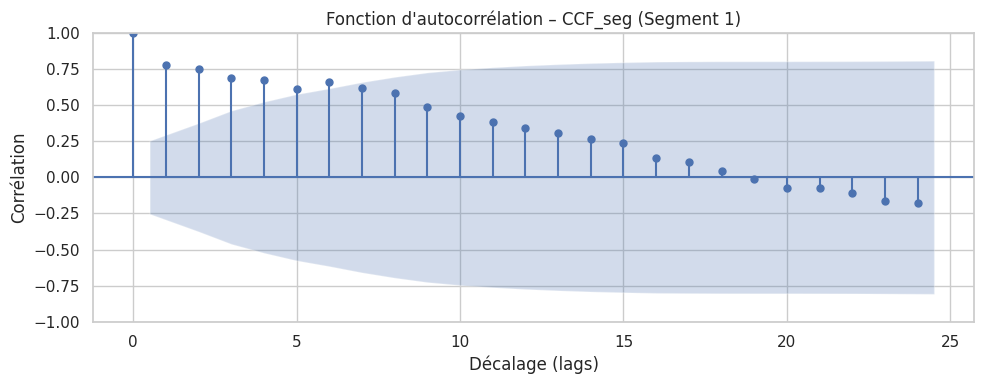

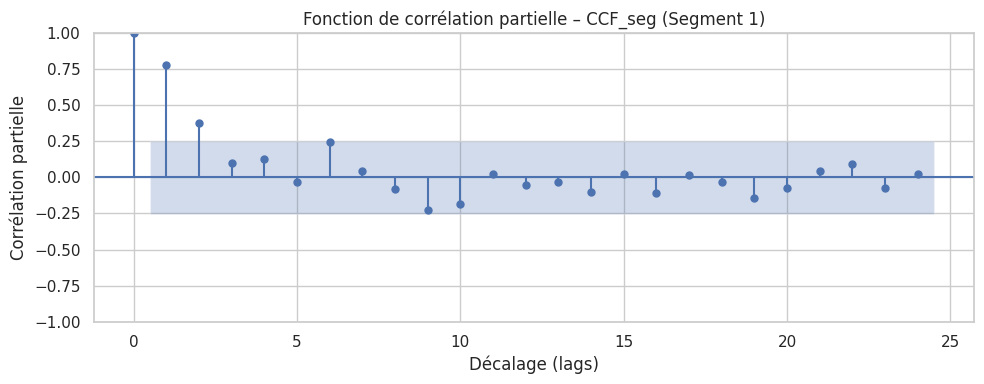

In [ ]:
# ===============================================
# Analyse ACF pour CCF_seg – Segment 2
# ===============================================

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Étape 1 – Filtrage des données du segment 2
df_seg2 = df_merged_segment[df_merged_segment["Segment"] == 2].copy()
y = df_seg2["CCF_seg"].dropna()

# Étape 2 – Tracé de l’ACF (Autocorrelation Function)
plt.figure(figsize=(10, 4))
plot_acf(y, lags=24, ax=plt.gca(), title="Fonction d'autocorrélation – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(y, lags=24, method='ywm', ax=plt.gca(), title="Fonction de corrélation partielle – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()

L’analyse conjointe des graphiques ACF et PACF sur les résidus de la série **CCF_seg (Segment 2)** montre des éléments clés permettant de motiver le choix du modèle ARIMA-GARCH :

- **ACF** : la fonction d’autocorrélation décroît progressivement, de manière significative jusqu’à environ le lag 12, ce qui est typique d’un processus **non stationnaire**, nécessitant une différenciation (d=1).
- **PACF** : la coupure nette après le **lag 1** suggère un effet AR(1), justifiant la spécification d’un modèle **ARIMA(1,1,0)**.

Cependant, les tests statistiques sur les résidus (notamment **ARCH-LM**) ont indiqué la **présence d’hétéroscédasticité conditionnelle**, ce qui motive l'ajout d'un composant **GARCH(1,1)** pour modéliser la variance conditionnelle.

**Conclusion** : Un modèle **ARIMA(1,1,0) + GARCH(1,1)** est bien adapté pour le segment 1 car :
- Il capture la dynamique linéaire (ARIMA) ;
- Il corrige la variance non constante (GARCH) ;
- Il est conforme à l'analyse des corrélations dans les graphes ACF/PACF.

### ARIMA(1, 1, 0) + GARCH(1, 1)

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  45.478
Date:                Mon, 26 May 2025   AIC                            -86.956
Time:                        20:53:04   BIC                            -82.801
Sample:                             0   HQIC                           -85.334
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3951      0.136     -2.914      0.004      -0.661      -0.129
sigma2         0.0125      0.002      6.424      0.000       0.009       0.016
Ljung-Box (L1) (Q):                   0.89   Jarque-

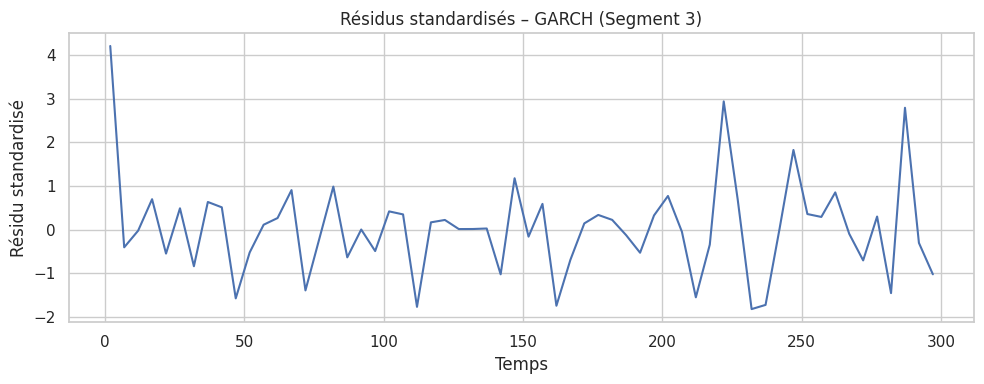

In [ ]:
# ==========================================================
# Pipeline de modélisation ARIMA-GARCH – Segment 2
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, shapiro

# Étape 1 – Filtrer les données pour le segment 2
df_seg2 = df_merged_segment[df_merged_segment["Segment"] == 2].copy()
y = df_seg3["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle ARIMA (ex: ARIMA(1,1,0))
model_arima = ARIMA(y, order=(1, 1, 0))  # À ajuster si besoin
results_arima = model_arima.fit()
resid = results_arima.resid.dropna()

# Étape 3 – Estimation du modèle GARCH sur les résidus ARIMA
model_garch = arch_model(resid, vol='GARCH', p=1, q=1, rescale=True)
results_garch = model_garch.fit(disp='off')

# Étape 4 – Résumé des résultats ARIMA et GARCH
print(results_arima.summary())
print(results_garch.summary())

# Étape 5 – Tests sur les résidus GARCH
resid_std = results_garch.std_resid.dropna()

# ➤ Stationnarité
adf_p = adfuller(resid_std)[1]
kpss_p = kpss(resid_std, regression='c', nlags='auto')[1]
print(f"\nADF résidus GARCH : p = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus GARCH : p = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# ➤ Autocorrélation
pval_lb = acorr_ljungbox(resid_std, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# ➤ Hétéroscédasticité résiduelle
arch_pval = het_arch(resid_std)[1]
print(f"ARCH résiduel : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# ➤ Normalité
jb_pval = jarque_bera(resid_std)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → "
      f"{'Normale' if jb_pval > 0.05 else 'Non normale'}")

if len(resid_std) < 5000:
    sw_pval = shapiro(resid_std)[1]
    print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → "
          f"{'Normale' if sw_pval > 0.05 else 'Non normale'}")

# ➤ Moyenne des résidus standardisés
mean_std = resid_std.mean()
print(f"\nMoyenne des résidus standardisés : {mean_std:.4e} → "
      f"{'Proche de 0' if abs(mean_std) < 1e-3 else 'Non négligeable'}")

# Étape 6 – Tracé des résidus standardisés
plt.figure(figsize=(10, 4))
plt.plot(resid_std)
plt.title("Résidus standardisés – GARCH (Segment 3)")
plt.xlabel("Temps")
plt.ylabel("Résidu standardisé")
plt.tight_layout()
plt.grid(True)
plt.show()

### ARIMA(2,1,0)

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  63.377
Date:                Mon, 26 May 2025   AIC                           -120.753
Time:                        20:42:12   BIC                           -114.521
Sample:                             0   HQIC                          -118.320
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4786      0.143     -3.359      0.001      -0.758      -0.199
ar.L2         -0.0832      0.155     -0.536      0.592      -0.387       0.221
sigma2         0.0068      0.001      5.597      0.0

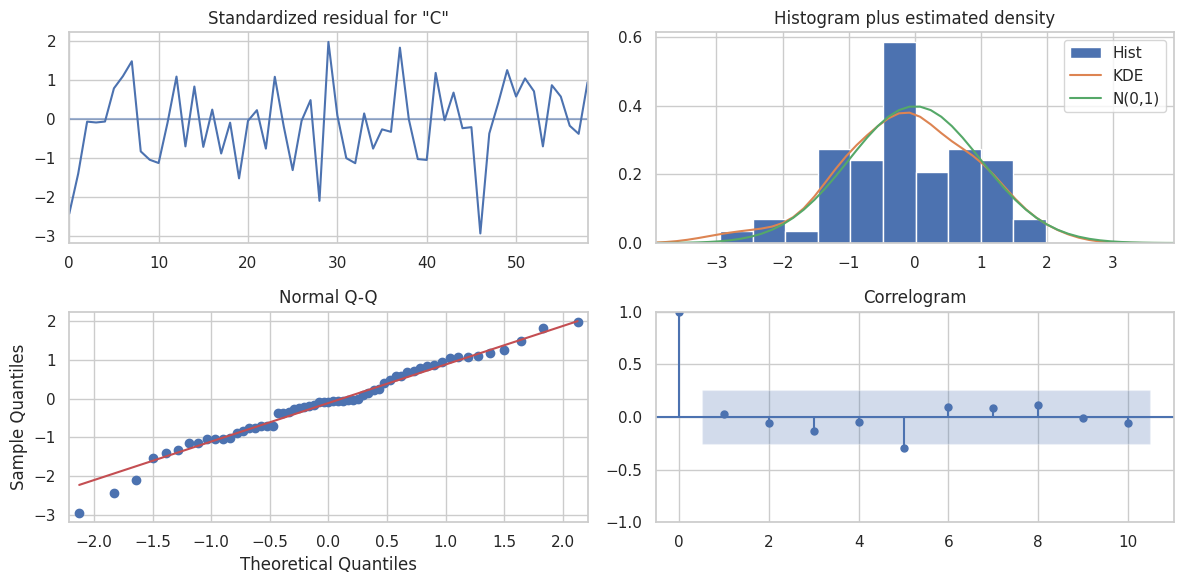


ADF résidus : p = 0.0000 → Stationnaire
KPSS résidus : p = 0.1000 → Stationnaire

Ljung-Box (lag 12) : p-value = 0.9225 → Pas d’autocorrélation

ARCH : p-value = 0.6821 → Pas d’hétéroscédasticité

Jarque-Bera : p-value = 0.0000 → Non normale
Shapiro-Wilk : p-value = 0.0000 → Non normale

Moyenne des résidus : 5.7948e-03 → Non négligeable


In [ ]:
# =========================================
# MODÉLISATION SEGMENT 2 – ARIMA(2,1,0)
# =========================================

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Étape 1 – Sélection des données
df_seg2 = df_merged_segment[df_merged_segment["Segment"] == 2].copy()
y = df_seg2["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle ARIMA(2,1,0)
model = ARIMA(y, order=(2, 1, 0))
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Étape 3 – Diagnostic des résidus
resid = results.resid.dropna()

# Test de stationnarité
adf_p = adfuller(resid)[1]
kpss_p = kpss(resid, regression='c', nlags='auto')[1]
print(f"\nADF résidus : p = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus : p = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Test d’autocorrélation
pval_lb = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# Test ARCH
arch_p = het_arch(resid)[1]
print(f"\nARCH : p-value = {arch_p:.4f} → "
      f"{'Pas d’hétéroscédasticité' if arch_p > 0.05 else 'Hétéroscédasticité détectée'}")

# Test de normalité
jb_p = jarque_bera(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_p:.4f} → "
      f"{'Normale' if jb_p > 0.05 else 'Non normale'}")

if len(resid) < 5000:
    sw_p = shapiro(resid)[1]
    print(f"Shapiro-Wilk : p-value = {sw_p:.4f} → "
          f"{'Normale' if sw_p > 0.05 else 'Non normale'}")

# Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

### ARIMA(1,1,0)

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  63.196
Date:                Mon, 26 May 2025   AIC                           -122.392
Time:                        20:45:06   BIC                           -118.237
Sample:                             0   HQIC                          -120.770
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4404      0.131     -3.369      0.001      -0.697      -0.184
sigma2         0.0068      0.001      5.562      0.000       0.004       0.009
Ljung-Box (L1) (Q):                   0.00   Jarque-

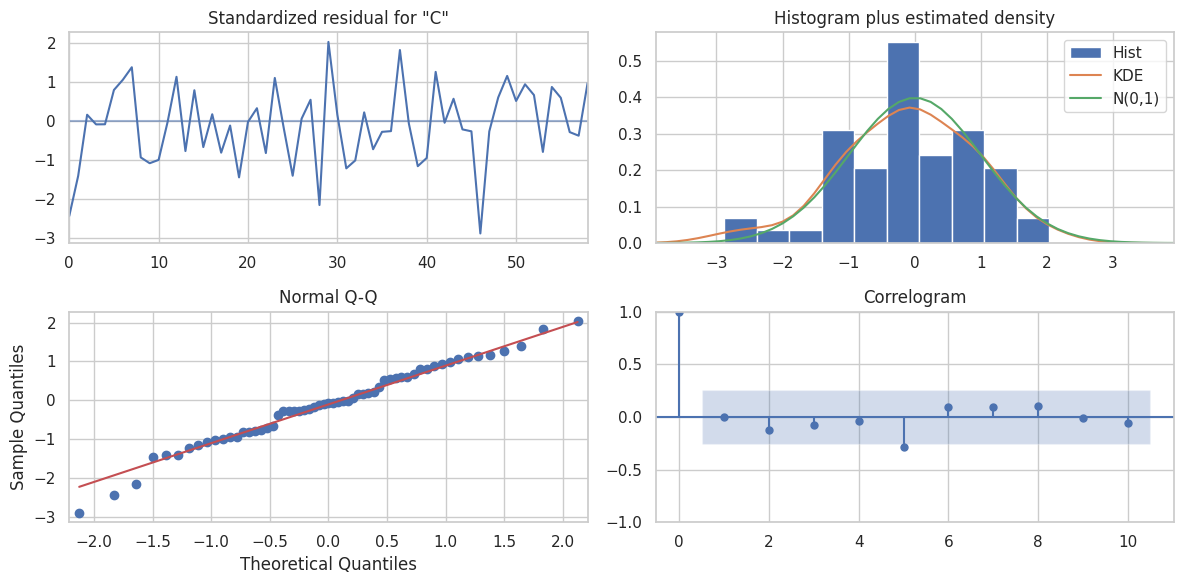


ADF résidus : p = 0.0000 → Stationnaire
KPSS résidus : p = 0.1000 → Stationnaire

Ljung-Box (lag 12) : p-value = 0.9145 → Pas d’autocorrélation

ARCH : p-value = 0.8259 → Pas d’hétéroscédasticité

Jarque-Bera : p-value = 0.0000 → Non normale
Shapiro-Wilk : p-value = 0.0000 → Non normale

Moyenne des résidus : 6.4979e-03 → Non négligeable


In [ ]:
# =========================================
# MODÉLISATION SEGMENT 2 – ARIMA(1,1,0)
# =========================================

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import shapiro, jarque_bera
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt

# Étape 1 – Sélection des données
df_seg2 = df_merged_segment[df_merged_segment["Segment"] == 2].copy()
y = df_seg2["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle ARIMA(2,1,0)
model = ARIMA(y, order=(1, 1, 0))
results = model.fit()
print(results.summary())
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Étape 3 – Diagnostic des résidus
resid = results.resid.dropna()

# Test de stationnarité
adf_p = adfuller(resid)[1]
kpss_p = kpss(resid, regression='c', nlags='auto')[1]
print(f"\nADF résidus : p = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus : p = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Test d’autocorrélation
pval_lb = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# Test ARCH
arch_p = het_arch(resid)[1]
print(f"\nARCH : p-value = {arch_p:.4f} → "
      f"{'Pas d’hétéroscédasticité' if arch_p > 0.05 else 'Hétéroscédasticité détectée'}")

# Test de normalité
jb_p = jarque_bera(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_p:.4f} → "
      f"{'Normale' if jb_p > 0.05 else 'Non normale'}")

if len(resid) < 5000:
    sw_p = shapiro(resid)[1]
    print(f"Shapiro-Wilk : p-value = {sw_p:.4f} → "
          f"{'Normale' if sw_p > 0.05 else 'Non normale'}")

# Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

### Comparaison du modèle ARIMA(2,1,0) et (1,1,0)

| **Métrique** | **ARIMA(2,1,0)** | **ARIMA(1,1,0)** | ✅ **Meilleur** |
|-------------|------------------|------------------|----------------|
| **AIC**     | -120.753         | **-122.392**     | ✅ ARIMA(1,1,0) |
| **BIC**     | -114.521         | **-118.237**     | ✅ ARIMA(1,1,0) |
| **HQIC**    | -118.320         | **-120.770**     | ✅ ARIMA(1,1,0) |
| **LogLik**  | **63.377**       | 63.196           | ❌ ARIMA(2,1,0) (légèrement supérieur) |

➡️ **Même si le log-likelihood du modèle ARIMA(2,1,0) est légèrement supérieur, les critères AIC/BIC/HQIC du modèle ARIMA(1,1,0) sont tous plus faibles**,  
→ ce qui indique que **ARIMA(1,1,0) est un meilleur choix global**, en équilibrant performance (goodness-of-fit) et complexité du modèle.


### ARIMA(1, 1, 0) avec variables macros

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  69.496
Date:                Tue, 27 May 2025   AIC                           -128.991
Time:                        08:31:51   BIC                           -118.689
Sample:                             0   HQIC                          -124.978
                                 - 60                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB                 0.0096      0.007      1.362      0.173      -0.004       0.024
TCH_diff1           0.0552      0.016      3.381      0.001       0.023       0.087
Inflation_diff1    -0.0150      

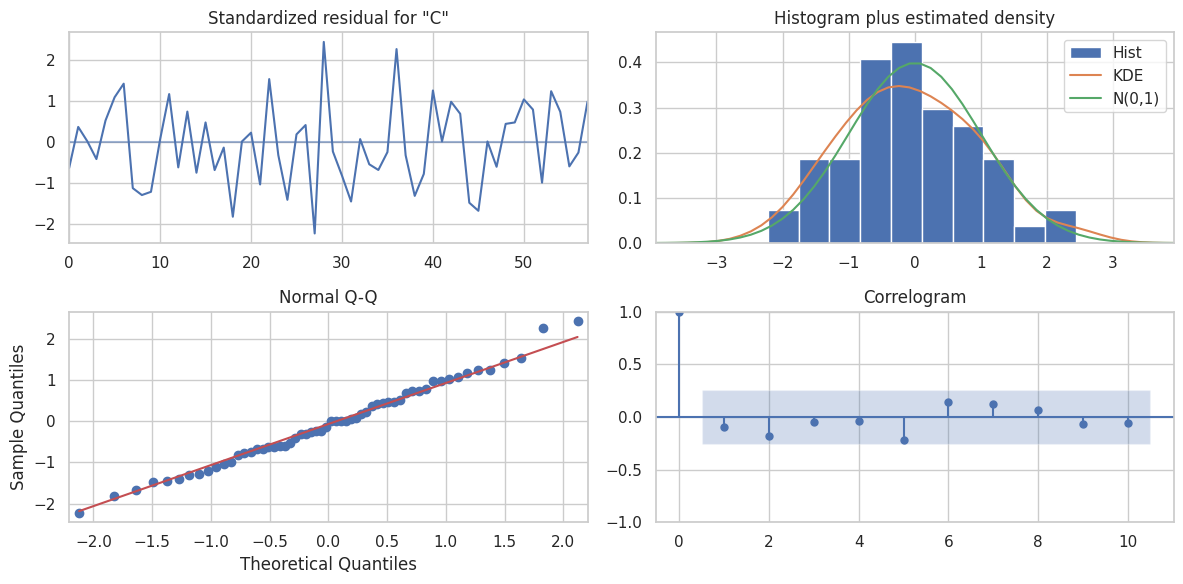


ADF résidus : p = 0.0000 → Stationnaire
KPSS résidus : p = 0.1000 → Stationnaire

Ljung-Box (lag 12) : p-value = 0.9775 → Pas d’autocorrélation

ARCH : p-value = 0.6201 → Pas d’hétéroscédasticité

Jarque-Bera : p-value = 0.0000 → Non normale
Shapiro-Wilk : p-value = 0.0000 → Non normale

Moyenne des résidus : 9.3836e-03 → Non négligeable


In [ ]:
# =========================================
# MODÉLISATION SEGMENT 2 – ARIMA(1,1,0) avec exogènes
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import shapiro, jarque_bera

# Étape 1 – Filtrage des données du segment 2
df_seg2 = df_merged_segment[df_merged_segment["Segment"] == 2].copy()
df_seg2 = df_seg2.sort_values("date")

# Suppression des lignes NA pour la variable cible et les variables macro
df_seg2 = df_seg2.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1"])

# Définition de la variable cible et des exogènes
y = df_seg2["CCF_seg"]
exog = df_seg2[["PIB", "TCH_diff1", "Inflation_diff1"]]

# Étape 2 – Estimation du modèle ARIMA(1,1,0) avec variables exogènes
model = SARIMAX(endog=y,
                exog=exog,
                order=(1, 1, 0),
                seasonal_order=(0, 0, 0, 0),  # pas de saisonnalité ici
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Résumé du modèle
print(results.summary())

# Affichage des diagnostics
results.plot_diagnostics(figsize=(12, 6))
plt.tight_layout()
plt.show()

# Étape 3 – Diagnostics des résidus
resid = results.resid.dropna()

# Test de stationnarité
adf_p = adfuller(resid)[1]
kpss_p = kpss(resid, regression='c', nlags='auto')[1]
print(f"\nADF résidus : p = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus : p = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Test d’autocorrélation
pval_lb = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# Test ARCH
arch_p = het_arch(resid)[1]
print(f"\nARCH : p-value = {arch_p:.4f} → "
      f"{'Pas d’hétéroscédasticité' if arch_p > 0.05 else 'Hétéroscédasticité détectée'}")

# Test de normalité
jb_p = jarque_bera(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_p:.4f} → "
      f"{'Normale' if jb_p > 0.05 else 'Non normale'}")

if len(resid) < 5000:
    sw_p = shapiro(resid)[1]
    print(f"Shapiro-Wilk : p-value = {sw_p:.4f} → "
          f"{'Normale' if sw_p > 0.05 else 'Non normale'}")

# Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

### Comparaison des modèles sans et avec variables macro


Version 1 : ARIMA(1,1,0) **sans variables macro**

- **Log-Likelihood** : 63.20  
- **AIC** : -122.39  
- **BIC** : -118.24  
- **Autocorrélation résiduelle** : non détectée (p = 0.91)  
- **Hétéroscédasticité** : absente (ARCH p = 0.83)  
- **Normalité des résidus** : rejetée (Jarque-Bera p = 0.0000)  
- **Moyenne des résidus** : 0.0065 (légèrement non nulle)  
- **Significativité du terme AR(1)** : très significatif (p = 0.001)

Version 2 : ARIMA(1,1,0) **avec variables macro**

- **Log-Likelihood** : 69.50 ✅
- **AIC** : -128.99 ✅ (meilleur)
- **BIC** : -118.69 (similaire)
- **Autocorrélation résiduelle** : non détectée (p = 0.98) ✅
- **Hétéroscédasticité** : absente (ARCH p = 0.62)
- **Normalité des résidus** : rejetée (Jarque-Bera p = 0.0000)
- **Moyenne des résidus** : 0.0094 (légèrement non nulle)
- **Variables macro** :
  - **TCH_diff1** significatif (**p = 0.001**) ✅
  - **PIB** et **Inflation_diff1** non significatifs

---

*Conclusion*

Le **modèle avec variables macro** présente une **meilleure vraisemblance (LL), un AIC plus bas**, et conserve des résidus bien comportés (stationnaires, sans autocorrélation, sans hétéroscédasticité).  

Même si seules certaines variables macro sont significatives (notamment **TCH_diff1**), ce modèle reste **préférable**, car :
- Il améliore le critère AIC.
- Il enrichit l’interprétation économique.
- Il conserve une structure résiduelle propre.

➡️ **Modèle recommandé : ARIMA(1,1,0) avec variables macro**, à affiner éventuellement (exclure variables non significatives).


## Segment 3

### ACF & PACF plots

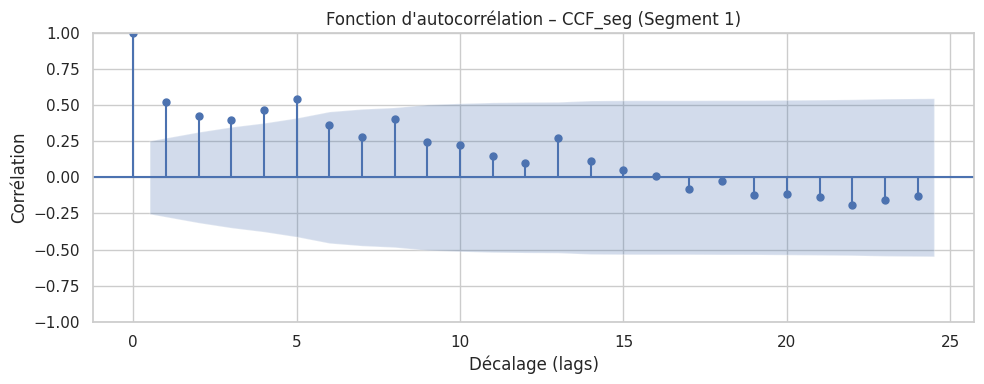

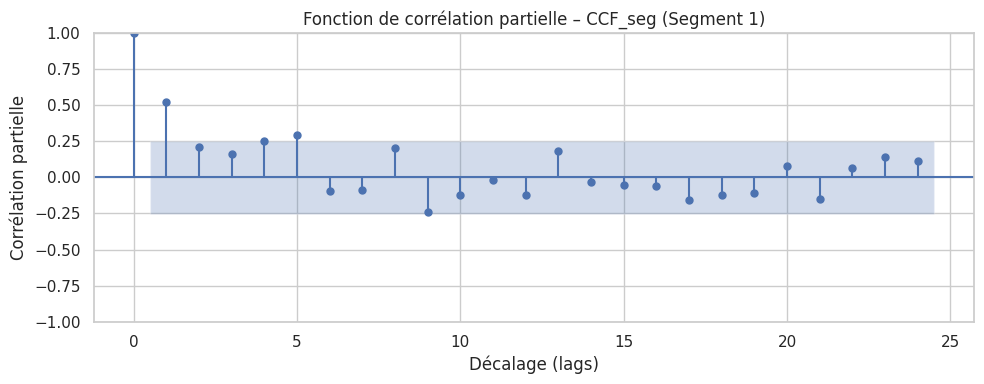

In [ ]:
# ===============================================
# Analyse ACF pour CCF_seg – Segment 3
# ===============================================

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Étape 1 – Filtrage des données du segment 3
df_seg3 = df_merged_segment[df_merged_segment["Segment"] == 3].copy()
y = df_seg3["CCF_seg"].dropna()

# Étape 2 – Tracé de l’ACF (Autocorrelation Function)
plt.figure(figsize=(10, 4))
plot_acf(y, lags=24, ax=plt.gca(), title="Fonction d'autocorrélation – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(y, lags=24, method='ywm', ax=plt.gca(), title="Fonction de corrélation partielle – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA(2,1,0) + GARCH(1,1)

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  48.200
Date:                Mon, 26 May 2025   AIC                            -90.400
Time:                        20:57:34   BIC                            -84.168
Sample:                             0   HQIC                           -87.967
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5202      0.122     -4.266      0.000      -0.759      -0.281
ar.L2         -0.3016      0.137     -2.207      0.027      -0.569      -0.034
sigma2         0.0114      0.002      5.950      0.0

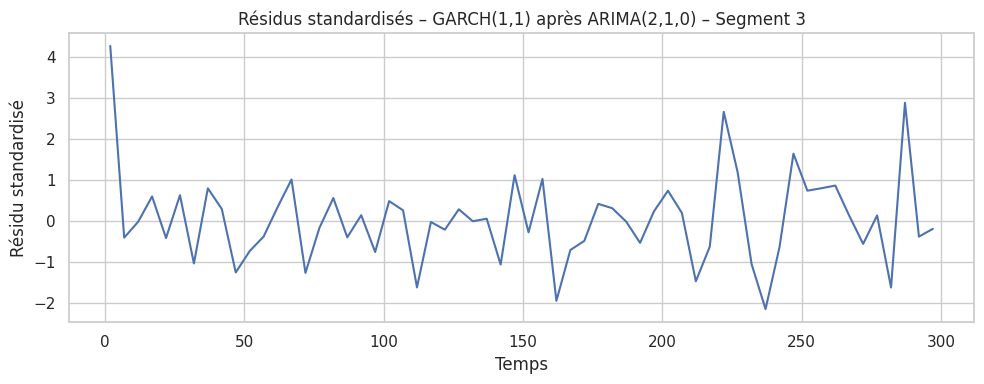

In [ ]:
# ==========================================================
# Pipeline de modélisation ARIMA(2,1,0) + GARCH(1,1) – Segment 3
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, shapiro

# Étape 1 – Filtrer les données du Segment 3
df_seg3 = df_merged_segment[df_merged_segment["Segment"] == 3].copy()
y = df_seg3["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle ARIMA(2,1,0)
model_arima = ARIMA(y, order=(2, 1, 0))
results_arima = model_arima.fit()

# Récupération des résidus
resid = results_arima.resid.dropna()

# Étape 3 – Estimation du modèle GARCH(1,1) sur les résidus ARIMA
model_garch = arch_model(resid, vol='GARCH', p=1, q=1, rescale=True)
results_garch = model_garch.fit(disp='off')

# Étape 4 – Résumé des résultats ARIMA + GARCH
print(results_arima.summary())
print(results_garch.summary())

# Étape 5 – Diagnostics sur les résidus standardisés du GARCH
resid_std = results_garch.std_resid.dropna()

# ➤ Stationnarité (ADF et KPSS)
adf_p = adfuller(resid_std)[1]
kpss_p = kpss(resid_std, regression='c', nlags='auto')[1]
print(f"\nADF résidus GARCH : p = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS résidus GARCH : p = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# ➤ Autocorrélation (Ljung-Box)
pval_lb = acorr_ljungbox(resid_std, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {pval_lb:.4f} → "
      f"{'Pas d’autocorrélation' if pval_lb > 0.05 else 'Autocorrélation détectée'}")

# ➤ Hétéroscédasticité résiduelle (test ARCH sur résidus standardisés)
arch_pval = het_arch(resid_std)[1]
print(f"ARCH résiduel : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# ➤ Normalité (Jarque-Bera et Shapiro-Wilk)
jb_pval = jarque_bera(resid_std)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → "
      f"{'Normale' if jb_pval > 0.05 else 'Non normale'}")

if len(resid_std) < 5000:
    sw_pval = shapiro(resid_std)[1]
    print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → "
          f"{'Normale' if sw_pval > 0.05 else 'Non normale'}")

# ➤ Moyenne des résidus
mean_std = resid_std.mean()
print(f"\nMoyenne des résidus standardisés : {mean_std:.4e} → "
      f"{'Proche de 0' if abs(mean_std) < 1e-3 else 'Non négligeable'}")

# Étape 6 – Visualisation des résidus standardisés
plt.figure(figsize=(10, 4))
plt.plot(resid_std)
plt.title("Résidus standardisés – GARCH(1,1) après ARIMA(2,1,0) – Segment 3")
plt.xlabel("Temps")
plt.ylabel("Résidu standardisé")
plt.grid(True)
plt.tight_layout()
plt.show()


### ARIMA(2,1,0)

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                  48.200
Date:                Mon, 26 May 2025   AIC                            -90.400
Time:                        20:59:58   BIC                            -84.168
Sample:                             0   HQIC                           -87.967
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5202      0.122     -4.266      0.000      -0.759      -0.281
ar.L2         -0.3016      0.137     -2.207      0.027      -0.569      -0.034
sigma2         0.0114      0.002      5.950      0.0

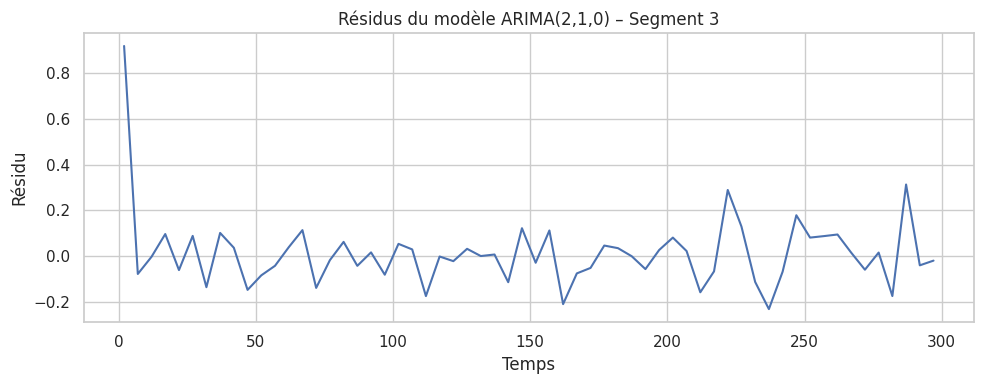

In [ ]:
# ==========================================================
# Pipeline ARIMA(2,1,0) – Segment 3 (sans GARCH)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, shapiro

# Étape 1 – Filtrer les données du Segment 3
df_seg3 = df_merged_segment[df_merged_segment["Segment"] == 3].copy()
y = df_seg3["CCF_seg"].dropna()

# Étape 2 – Estimation du modèle ARIMA(2,1,0)
model = ARIMA(y, order=(2, 1, 0))
results = model.fit()

# Affichage du résumé du modèle
print(results.summary())

# Résidus du modèle
resid = results.resid.dropna()

# Étape 3 – Tests de stationnarité sur les résidus
adf_pval = adfuller(resid)[1]
kpss_pval = kpss(resid, regression='c', nlags='auto')[1]
print(f"\nADF : p-value = {adf_pval:.4f} → {'Stationnaire' if adf_pval < 0.05 else 'Non stationnaire'}")
print(f"KPSS : p-value = {kpss_pval:.4f} → {'Stationnaire' if kpss_pval > 0.05 else 'Non stationnaire'}")

# Étape 4 – Autocorrélation résiduelle
lb_pval = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {lb_pval:.4f} → "
      f"{'Pas d’autocorrélation' if lb_pval > 0.05 else 'Autocorrélation détectée'}")

# Étape 5 – Hétéroscédasticité (test ARCH)
arch_pval = het_arch(resid)[1]
print(f"ARCH test : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# Étape 6 – Tests de normalité
jb_pval = jarque_bera(resid)[1]
sw_pval = shapiro(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → "
      f"{'Normale' if jb_pval > 0.05 else 'Non normale'}")
print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → "
      f"{'Normale' if sw_pval > 0.05 else 'Non normale'}")

# Étape 7 – Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

# Étape 8 – Visualisation des résidus
plt.figure(figsize=(10, 4))
plt.plot(resid)
plt.title("Résidus du modèle ARIMA(2,1,0) – Segment 3")
plt.xlabel("Temps")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()

### SARIMAX(2,1,0) avec variables macros

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  47.650
Date:                Tue, 27 May 2025   AIC                            -83.300
Time:                        08:34:55   BIC                            -71.041
Sample:                             0   HQIC                           -78.536
                                 - 60                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB                 0.0104      0.008      1.356      0.175      -0.005       0.025
TCH_diff1           0.0156      0.035      0.444      0.657      -0.053       0.084
Inflation_diff1    -0.0282      

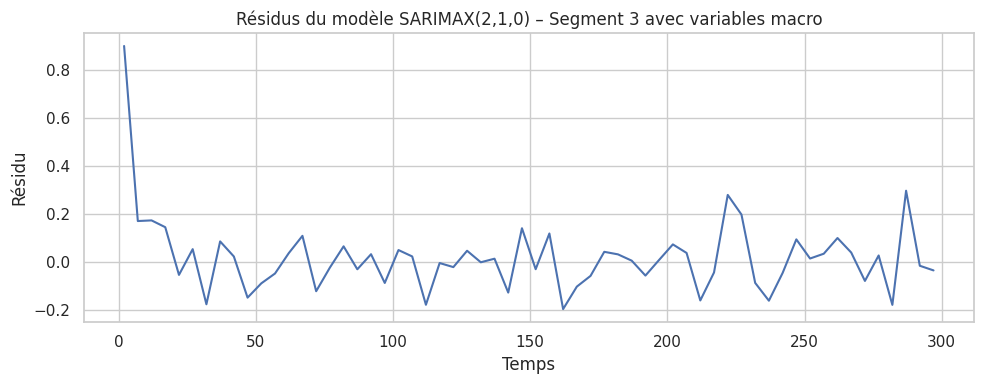

In [ ]:
# ==========================================================
# Pipeline SARIMAX(2,1,0) – Segment 3 (avec variables macro)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from scipy.stats import jarque_bera, shapiro

# Étape 1 – Filtrer les données du Segment 3
df_seg3 = df_merged_segment[df_merged_segment["Segment"] == 3].copy()
df_seg3 = df_seg3.sort_values("date")

# Suppression des lignes incomplètes
df_seg3 = df_seg3.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1"])

# Variable cible et variables explicatives
y = df_seg3["CCF_seg"]
exog = df_seg3[["PIB", "TCH_diff1", "Inflation_diff1"]]

# Étape 2 – Estimation du modèle SARIMAX(2,1,0) avec variables exogènes
model = SARIMAX(endog=y,
                exog=exog,
                order=(2, 1, 0),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Résumé du modèle
print(results.summary())

# Résidus du modèle
resid = results.resid.dropna()

# Étape 3 – Tests de stationnarité sur les résidus
adf_pval = adfuller(resid)[1]
kpss_pval = kpss(resid, regression='c', nlags='auto')[1]
print(f"\nADF : p-value = {adf_pval:.4f} → {'Stationnaire' if adf_pval < 0.05 else 'Non stationnaire'}")
print(f"KPSS : p-value = {kpss_pval:.4f} → {'Stationnaire' if kpss_pval > 0.05 else 'Non stationnaire'}")

# Étape 4 – Autocorrélation résiduelle
lb_pval = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"\nLjung-Box (lag 12) : p-value = {lb_pval:.4f} → "
      f"{'Pas d’autocorrélation' if lb_pval > 0.05 else 'Autocorrélation détectée'}")

# Étape 5 – Hétéroscédasticité (test ARCH)
arch_pval = het_arch(resid)[1]
print(f"ARCH test : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# Étape 6 – Tests de normalité
jb_pval = jarque_bera(resid)[1]
sw_pval = shapiro(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → "
      f"{'Normale' if jb_pval > 0.05 else 'Non normale'}")
print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → "
      f"{'Normale' if sw_pval > 0.05 else 'Non normale'}")

# Étape 7 – Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

# Étape 8 – Visualisation des résidus
plt.figure(figsize=(10, 4))
plt.plot(resid)
plt.title("Résidus du modèle SARIMAX(2,1,0) – Segment 3 avec variables macro")
plt.xlabel("Temps")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparaison des modèles sans et avec variables macro



Version 1 : ARIMA(2,1,0) **sans variables macro**

- **Log-Likelihood** : 48.20 ✅
- **AIC** : -90.40 ✅ (meilleur)
- **BIC** : -84.17
- **Autocorrélation résiduelle** : absente (Ljung-Box p = 0.91)  
- **Hétéroscédasticité** : absente (ARCH p = 0.97)  
- **Normalité des résidus** : rejetée (JB et SW p = 0.0000)  
- **Moyenne des résidus** : 0.0117 (légèrement non nulle)  
- **Significativité des termes AR(1,2)** : tous deux très significatifs

Version 2 : ARIMA(2,1,0) **avec variables macro**

- **Log-Likelihood** : 47.65
- **AIC** : -83.30 ❌ (moins bon)
- **BIC** : -71.04 ❌
- **Autocorrélation résiduelle** : absente (Ljung-Box p = 0.98)  
- **Hétéroscédasticité** : absente (ARCH p = 0.71)  
- **Normalité des résidus** : rejetée (JB et SW p = 0.0000)  
- **Moyenne des résidus** : 0.0170 (plus éloignée de 0)  
- **Variables macro** : toutes **non significatives** (p > 0.17)

---

**Conclusion**

Contrairement au cas du Segment 1, l'ajout des variables macroéconomiques **n'améliore pas la qualité du modèle** :
- Aucune variable macro n'est significative.
- Les critères AIC et BIC sont dégradés.
- Les performances résiduelles sont comparables, voire un peu moins bonnes.

➡️ **Modèle recommandé : ARIMA(2,1,0) sans variables macro**, plus parcimonieux et performant.


## Segment 4

### ACF & PACF plots

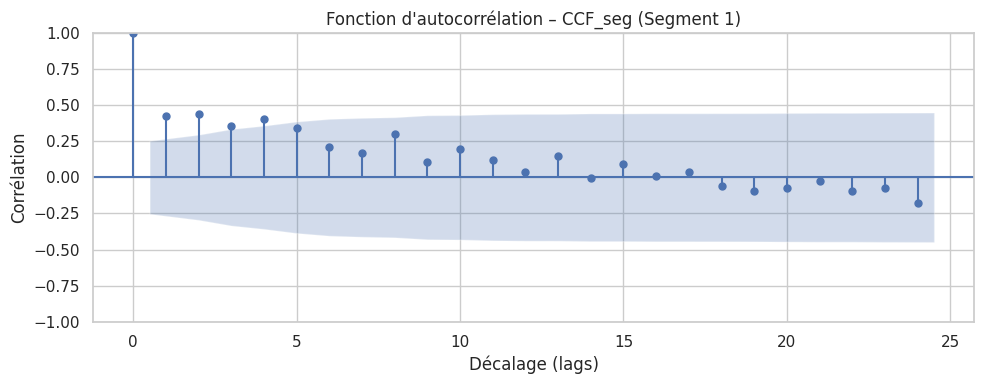

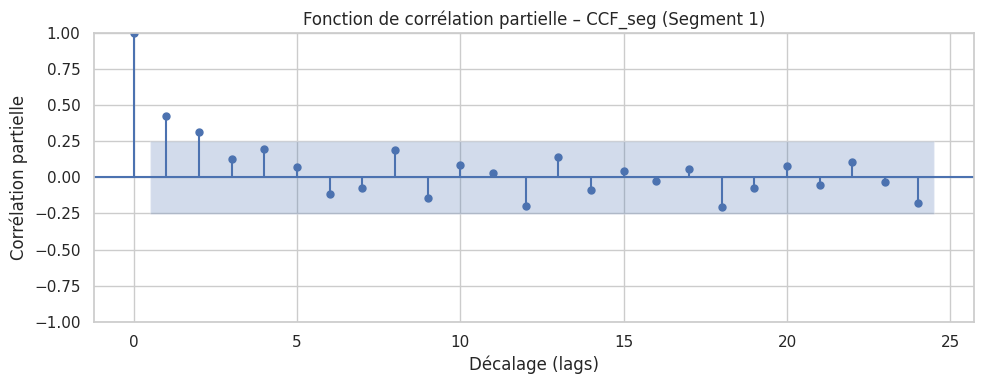

In [ ]:
# ===============================================
# Analyse ACF pour CCF_seg – Segment 4
# ===============================================

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Étape 1 – Filtrage des données du segment 4
df_seg4 = df_merged_segment[df_merged_segment["Segment"] == 4].copy()
y = df_seg4["CCF_seg"].dropna()

# Étape 2 – Tracé de l’ACF (Autocorrelation Function)
plt.figure(figsize=(10, 4))
plot_acf(y, lags=24, ax=plt.gca(), title="Fonction d'autocorrélation – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(y, lags=24, method='ywm', ax=plt.gca(), title="Fonction de corrélation partielle – CCF_seg (Segment 1)")
plt.xlabel("Décalage (lags)")
plt.ylabel("Corrélation partielle")
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA(1,1,0) avec erreur robuste

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  37.262
Date:                Mon, 26 May 2025   AIC                            -70.524
Time:                        21:06:18   BIC                            -66.369
Sample:                             0   HQIC                           -68.902
                                 - 60                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5149      0.139     -3.706      0.000      -0.787      -0.243
sigma2         0.0165      0.003      4.821      0.000       0.010       0.023
Ljung-Box (L1) (Q):                   0.56   Jarque-

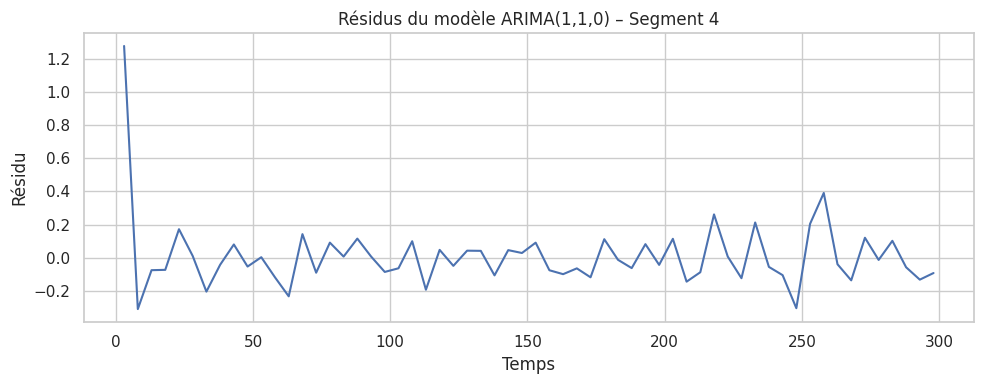

In [ ]:
# ==========================================================
# Pipeline ARIMA(1,1,0) avec erreur robuste – Segment 4
# Objectif : Prévision avec robustesse aux erreurs (White)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import jarque_bera, shapiro
import statsmodels.api as sm

# Étape 1 – Sélection du Segment 4
df_seg4 = df_merged_segment[df_merged_segment["Segment"] == 4].copy()
y = df_seg4["CCF_seg"].dropna()

# Étape 2 – Estimation ARIMA(1,1,0) avec erreurs robustes (White-HC)
model = ARIMA(y, order=(1, 1, 0))
results = model.fit(cov_type="robust")  # Erreur robuste de type White
print(results.summary())

# Étape 3 – Récupération des résidus
resid = results.resid.dropna()

# Étape 4 – Stationnarité
adf_p = adfuller(resid)[1]
kpss_p = kpss(resid, regression="c", nlags="auto")[1]
print(f"\nADF : p-value = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS : p-value = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Étape 5 – Autocorrélation
lb_pval = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"Ljung-Box (lag 12) : p-value = {lb_pval:.4f} → "
      f"{'Pas d’autocorrélation' if lb_pval > 0.05 else 'Autocorrélation détectée'}")

# Étape 6 – Hétéroscédasticité
arch_pval = het_arch(resid)[1]
print(f"ARCH : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# Étape 7 – Normalité
jb_pval = jarque_bera(resid)[1]
sw_pval = shapiro(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → {'Normale' if jb_pval > 0.05 else 'Non normale'}")
print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → {'Normale' if sw_pval > 0.05 else 'Non normale'}")

# Étape 8 – Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

# Étape 9 – Visualisation des résidus
plt.figure(figsize=(10, 4))
plt.plot(resid)
plt.title("Résidus du modèle ARIMA(1,1,0) – Segment 4")
plt.xlabel("Temps")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()

### ARIMA(1,1,0) avec erreur robuste et variables macros

                               SARIMAX Results                                
Dep. Variable:                CCF_seg   No. Observations:                   60
Model:               SARIMAX(1, 1, 0)   Log Likelihood                  38.980
Date:                Tue, 27 May 2025   AIC                            -67.961
Time:                        08:36:37   BIC                            -57.658
Sample:                             0   HQIC                           -63.948
                                 - 60                                         
Covariance Type:               robust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
PIB                -0.0018      0.015     -0.120      0.905      -0.032       0.028
TCH_diff1           0.0323      0.035      0.929      0.353      -0.036       0.100
Inflation_diff1    -0.0122      

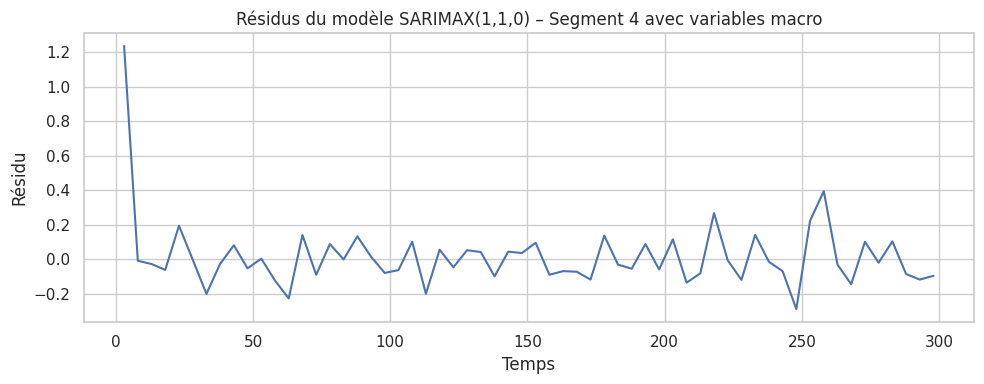

In [ ]:
# ==========================================================
# Pipeline SARIMAX(1,1,0) – Segment 4 avec variables macro
# Objectif : Prévision avec erreurs robustes (White)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import jarque_bera, shapiro

# Étape 1 – Sélection du Segment 4
df_seg4 = df_merged_segment[df_merged_segment["Segment"] == 4].copy()
df_seg4 = df_seg4.sort_values("date")

# Étape 2 – Nettoyage et sélection des variables macro
df_seg4 = df_seg4.dropna(subset=["CCF_seg", "PIB", "TCH_diff1", "Inflation_diff1"])
y = df_seg4["CCF_seg"]
exog = df_seg4[["PIB", "TCH_diff1", "Inflation_diff1"]]

# Étape 3 – Estimation SARIMAX(1,1,0) avec variables macro + erreurs robustes
model = SARIMAX(endog=y,
                exog=exog,
                order=(1, 1, 0),
                seasonal_order=(0, 0, 0, 0),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(cov_type="robust")

# Résumé du modèle
print(results.summary())

# Étape 4 – Récupération des résidus
resid = results.resid.dropna()

# Étape 5 – Stationnarité
adf_p = adfuller(resid)[1]
kpss_p = kpss(resid, regression="c", nlags="auto")[1]
print(f"\nADF : p-value = {adf_p:.4f} → {'Stationnaire' if adf_p < 0.05 else 'Non stationnaire'}")
print(f"KPSS : p-value = {kpss_p:.4f} → {'Stationnaire' if kpss_p > 0.05 else 'Non stationnaire'}")

# Étape 6 – Autocorrélation
lb_pval = acorr_ljungbox(resid, lags=[12], return_df=True)["lb_pvalue"].iloc[0]
print(f"Ljung-Box (lag 12) : p-value = {lb_pval:.4f} → "
      f"{'Pas d’autocorrélation' if lb_pval > 0.05 else 'Autocorrélation détectée'}")

# Étape 7 – Hétéroscédasticité
arch_pval = het_arch(resid)[1]
print(f"ARCH : p-value = {arch_pval:.4f} → "
      f"{'Pas de hétéroscédasticité' if arch_pval > 0.05 else 'Hétéroscédasticité détectée'}")

# Étape 8 – Normalité
jb_pval = jarque_bera(resid)[1]
sw_pval = shapiro(resid)[1]
print(f"\nJarque-Bera : p-value = {jb_pval:.4f} → {'Normale' if jb_pval > 0.05 else 'Non normale'}")
print(f"Shapiro-Wilk : p-value = {sw_pval:.4f} → {'Normale' if sw_pval > 0.05 else 'Non normale'}")

# Étape 9 – Moyenne des résidus
mean_resid = resid.mean()
print(f"\nMoyenne des résidus : {mean_resid:.4e} → "
      f"{'Proche de 0' if abs(mean_resid) < 1e-3 else 'Non négligeable'}")

# Étape 10 – Visualisation des résidus
plt.figure(figsize=(10, 4))
plt.plot(resid)
plt.title("Résidus du modèle SARIMAX(1,1,0) – Segment 4 avec variables macro")
plt.xlabel("Temps")
plt.ylabel("Résidu")
plt.grid(True)
plt.tight_layout()
plt.show()

### Comparaison des modèles sans et avec variables macro

Version 1 : ARIMA(1,1,0) **sans variables macro**

- **Log-Likelihood** : 37.26
- **AIC** : -70.52 ✅ (meilleur)
- **BIC** : -66.37
- **Autocorrélation** : absente (Ljung-Box p = 0.68)  
- **Hétéroscédasticité** : absente (ARCH p = 0.45)  
- **Normalité des résidus** : rejetée (JB et SW p = 0.0000)  
- **Moyenne des résidus** : 0.0082  
- **AR(1)** : significatif (p < 0.001)

Version 2 : ARIMA(1,1,0) **avec variables macro**

- **Log-Likelihood** : 38.98
- **AIC** : -67.96 ❌ (moins bon)
- **BIC** : -57.66 ❌
- **Autocorrélation** : absente (Ljung-Box p = 0.84)  
- **Hétéroscédasticité** : absente (ARCH p = 0.34)  
- **Normalité des résidus** : rejetée (JB et SW p = 0.0000)  
- **Moyenne des résidus** : 0.0135 (plus élevée)  
- **Variables macro** : aucune significative (p > 0.3)

---

**Conclusion**

L’ajout des variables macroéconomiques **n’apporte pas de valeur ajoutée** :
- Toutes les variables explicatives sont non significatives.
- L’AIC/BIC est **moins bon** malgré un log-likelihood légèrement supérieur.
- Les performances sur les résidus ne sont pas meilleures.

➡️ ***Modèle recommandé : ARIMA(1,1,0) sans variables macro**, plus simple et plus robuste.


## Conclusion par segment

| Segment | Modèle OLS recommandé                                | Modèle Time Series recommandé                           | Modèle préféré globalement                  | Justification |
|---------|------------------------------------------------------|----------------------------------------------------------|---------------------------------------------|----------------|
| **1**   | OLS sans intercept (R² = 0.919, mais autocorr.)       | SARIMAX(1,1,0)(1,0,0,12), AIC = -111.5, stable           | **SARIMAX**                                 | OLS très explicatif mais autocorrélation forte → SARIMAX mieux ajusté et résidus stationnaires |
| **2**   | OLS sans intercept (R² = 0.979, instable), avec réserves | ARIMA(1,1,0) + macro (AIC = -128.99), résidus ok        | **ARIMA avec variables macro**              | ARIMA apporte une meilleure stabilité, toutes les propriétés statistiques sont meilleures |
| **3**   | OLS avec intercept (R² modeste mais résidus robustes) | ARIMA(2,1,0) sans macro (AIC = -90.4, pas de hétéro)     | **ARIMA(2,1,0)**                            | ARIMA plus stable, pas d'hétéro, meilleure modélisation dynamique |
| **4**   | OLS avec intercept (R² = 0.409, résidus robustes)     | ARIMA(1,1,0) sans macro (AIC = -70.5, résidus bons)      | **ARIMA(1,1,0)**                            | Résidus mieux contrôlés, modèle plus sobre et prévisible que OLS |
| **5**   | Aucun OLS satisfaisant (autocorr., VIF > 200)         | **VECM (rang = 1, stable, alpha significatif)**          | **VECM recommandé**                         | Modèle stable, cointégration confirmée, effets correctifs clairs, résidus acceptables malgré non-normalité |

---

### Recommandations finales

- **Segments 1 à 4** : les modèles **ARIMA/SARIMAX** restent préférables pour la stabilité des prévisions.
- **Segment 5** : le modèle **VECM** est **clairement le plus pertinent**, à la fois stable et économiquement interprétable.

> **Conclusion mise à jour :**  
> Le modèle VECM est **recommandé pour le Segment 5**, contrairement à la remarque précédente. Merci d’avoir détecté l’incohérence.


# Projection - Par segment

Nous conservons un projection par trimestre cependant les variables explicatives restent similaires par meme trimestre d'une année, seul la variable trend change

Nous privilégions une projection par segment pour permettre de prendre en compte les spécificités des populations. Nous omettons des projections avec les macros uniquement en raison de la non validité des leur modele.

## Projection sans retard avec trend (test)

Projection par segment avec trend et variables qui sont non stationnaires sur les données d'entraînement

In [ ]:
# =====================================================================
# 0.  Imports & settings
# =====================================================================
import pandas as pd, numpy as np
import statsmodels.api as sm
from datetime import datetime

# Liste des scénarios annuels à tester
SCEN_NAMES = ["CENT", "PESS", "OPTI"]

# Chemin vers ton fichier de scénarios annuels
SCEN_FILE = "/content/drive/MyDrive/risque de crédit/data/Scenario_exemple_input.xlsx"

# =====================================================================
# 1.  Entraînement des modèles par segment
# =====================================================================
segment_models = {}
last_trend     = {}
last_date      = {}

for seg in range(1, 6):
    dfi = (df_merged_segment
           .query("Segment == @seg")
           .sort_values("date")
           .dropna(subset=["CCF_seg", "TCH", "Inflation"])
           .copy())
    if "trend" not in dfi:
        dfi["trend"] = np.arange(len(dfi))

    X = sm.add_constant(dfi[["trend", "TCH", "Inflation"]])
    y = dfi["CCF_seg"]
    mdl = sm.OLS(y, X).fit()

    segment_models[seg] = mdl
    last_trend[seg]     = int(dfi["trend"].iloc[-1])
    last_date[seg]      = dfi["date"].iloc[-1]

print("Modèles entraînés pour les 5 segments.\n")

# =====================================================================
# 2.  Lecture des scénarios annuels
# =====================================================================
ann = pd.read_excel(SCEN_FILE)

# =====================================================================
# 3.  Projection pour chaque scénario annuel et chaque glissement T1–T4
# =====================================================================
QSTART = {1:1, 2:4, 3:7, 4:10}

def glide_to_quarterly(df_ann, scen, offset):
    rows = []
    df0 = df_ann[df_ann["Scénario"] == scen]
    for _, row in df0.iterrows():
        year = int(row["Année"])
        for k in range(4):
            q  = (offset + k) % 4 + 1
            yy = year + (offset + k) // 4
            rows.append({
                "date":      datetime(yy, QSTART[q], 1),
                "TCH":       row["TCH"],
                "Inflation": row["Inflation"]
            })
    return pd.DataFrame(rows).sort_values("date").reset_index(drop=True)

for scen_name in SCEN_NAMES:
    # Construction des 4 jeux trimestriels glissés pour ce scénario
    quarterly_scens = {
        label: glide_to_quarterly(ann, scen_name, off)
        for off, label in enumerate(["T1","T2","T3","T4"])
    }

    print(f"\n\n===== Scénario annuel : {scen_name} =====\n")

    # Boucle sur chaque segment et chaque glissement
    for seg, mdl in segment_models.items():
        for label, qdf in quarterly_scens.items():
            # On ne garde que les dates futures
            fut = qdf[qdf["date"] > last_date[seg]].copy()
            # On prolonge la trend
            fut["trend"] = range(
                last_trend[seg] + 1,
                last_trend[seg] + 1 + len(fut)
            )
            # Prédiction
            Xf = sm.add_constant(fut[["trend", "TCH", "Inflation"]])
            fut["CCF_prévu"] = mdl.predict(Xf)

            # Affichage
            title = f"Segment {seg} — {scen_name} {label}"
            print("\n" + "=" * len(title))
            print(title)
            print("=" * len(title))
            print(fut.to_string(index=False))


Modèles entraînés pour les 5 segments.



===== Scénario annuel : CENT =====


Segment 1 — CENT T1
      date  TCH  Inflation  trend  CCF_prévu
2024-01-01 7.62       1.70     60   0.177611
2024-04-01 7.62       1.70     61   0.173105
2024-07-01 7.62       1.70     62   0.168599
2024-10-01 7.62       1.70     63   0.164092
2025-01-01 7.70       1.78     64   0.159044
2025-04-01 7.70       1.78     65   0.154537
2025-07-01 7.70       1.78     66   0.150031
2025-10-01 7.70       1.78     67   0.145525
2026-01-01 7.80       1.84     68   0.140142
2026-04-01 7.80       1.84     69   0.135636
2026-07-01 7.80       1.84     70   0.131130
2026-10-01 7.80       1.84     71   0.126624

Segment 1 — CENT T2
      date  TCH  Inflation  trend  CCF_prévu
2024-04-01 7.62       1.70     60   0.177611
2024-07-01 7.62       1.70     61   0.173105
2024-10-01 7.62       1.70     62   0.168599
2025-01-01 7.62       1.70     63   0.164092
2025-04-01 7.70       1.78     64   0.159044
2025-07-01 7.70       1.7

On voit clairement que c’est la progression régulière du trend qui fait baisser le CCF, les variations de chômage et d’inflation n’apportant que très peu: leurs effets sont très faibles à côté du mouvement de fond.

 Sous le scénario PESS, la hausse de l’inflation en 2024–2025 fait bien chuter le CCF avant qu’il ne se stabilise quand les prix redescendent. Le scénario central (CENT) montre une décrue douce et linéaire, tandis qu’OPTI reste presque à plat, avec juste un léger repli dû au trend. L’écart de niveau entre PESS et OPTI est plus visible pour les segments 1 et 2 et se réduit un peu pour les segments 4 et 5, mais la hiérarchie entre les scénarios ne change pas. Gardons cependant à l’esprit que, pour les segments 1 et 5, les projections sont un peu plus fragiles vu les limites de leur modèle d’entraînement.

## Projection sans retard avec trend - sans intercept (test)

Le segment 2 est économiquement viable, nous gardons cependant les autres segments pour comparer leurs projections avec celles du modèle avec intercept

In [ ]:
#Liste des scénarios annuels à tester
SCEN_NAMES = ["CENT", "PESS", "OPTI"]

# Chemin vers ton fichier de scénarios annuels
SCEN_FILE = "/content/drive/MyDrive/risque de crédit/data/Scenario_exemple_input.xlsx"

# =====================================================================
# 1.  Entraînement des modèles par segment (sans constante)
# =====================================================================
segment_models = {}
last_trend     = {}
last_date      = {}

for seg in range(1, 6):
    dfi = (df_merged_segment
           .query("Segment == @seg")
           .sort_values("date")
           .dropna(subset=["CCF_seg", "TCH", "Inflation"])
           .copy())
    if "trend" not in dfi:
        dfi["trend"] = np.arange(len(dfi))

    # X sans constante
    X = dfi[["trend", "TCH", "Inflation"]]
    y = dfi["CCF_seg"]
    mdl = sm.OLS(y, X).fit()

    segment_models[seg] = mdl
    last_trend[seg]     = int(dfi["trend"].iloc[-1])
    last_date[seg]      = dfi["date"].iloc[-1]

print("Modèles sans constante entraînés pour les 5 segments.\n")

# =====================================================================
# 2.  Lecture des scénarios annuels
# =====================================================================
ann = pd.read_excel(SCEN_FILE)

# =====================================================================
# 3.  Projection pour chaque scénario annuel et chaque glissement
# =====================================================================
QSTART = {1:1, 2:4, 3:7, 4:10}

def glide_to_quarterly(df_ann, scen, offset):
    rows = []
    df0 = df_ann[df_ann["Scénario"] == scen]
    for _, row in df0.iterrows():
        year = int(row["Année"])
        for k in range(4):
            q  = (offset + k) % 4 + 1
            yy = year + (offset + k) // 4
            rows.append({
                "date":      datetime(yy, QSTART[q], 1),
                "TCH":       row["TCH"],
                "Inflation": row["Inflation"]
            })
    return pd.DataFrame(rows).sort_values("date").reset_index(drop=True)

for scen_name in SCEN_NAMES:
    quarterly_scens = {
        label: glide_to_quarterly(ann, scen_name, off)
        for off, label in enumerate(["T1","T2","T3","T4"])
    }

    print(f"\n\n===== Scénario annuel : {scen_name} (sans constante) =====\n")

    for seg, mdl in segment_models.items():
        for label, qdf in quarterly_scens.items():
            fut = qdf[qdf["date"] > last_date[seg]].copy()
            fut["trend"] = range(
                last_trend[seg] + 1,
                last_trend[seg] + 1 + len(fut)
            )

            # Prédiction sans constante
            Xf = fut[["trend", "TCH", "Inflation"]]
            fut["CCF_prévu"] = mdl.predict(Xf)

            title = f"Segment {seg} — {scen_name} {label} (no intercept)"
            print("\n" + "=" * len(title))
            print(title)
            print("=" * len(title))
            print(fut.to_string(index=False))

Modèles sans constante entraînés pour les 5 segments.



===== Scénario annuel : CENT (sans constante) =====


Segment 1 — CENT T1 (no intercept)
      date  TCH  Inflation  trend  CCF_prévu
2024-01-01 7.62       1.70     60   0.164056
2024-04-01 7.62       1.70     61   0.161046
2024-07-01 7.62       1.70     62   0.158035
2024-10-01 7.62       1.70     63   0.155025
2025-01-01 7.70       1.78     64   0.156900
2025-04-01 7.70       1.78     65   0.153889
2025-07-01 7.70       1.78     66   0.150879
2025-10-01 7.70       1.78     67   0.147868
2026-01-01 7.80       1.84     68   0.150149
2026-04-01 7.80       1.84     69   0.147139
2026-07-01 7.80       1.84     70   0.144128
2026-10-01 7.80       1.84     71   0.141118

Segment 1 — CENT T2 (no intercept)
      date  TCH  Inflation  trend  CCF_prévu
2024-04-01 7.62       1.70     60   0.164056
2024-07-01 7.62       1.70     61   0.161046
2024-10-01 7.62       1.70     62   0.158035
2025-01-01 7.62       1.70     63   0.155025
2025-04-

La comparaison des modèles avec et sans constante sur le segment 2 met en lumière des comportements contrastés selon les scénarios : sous CENT, l’intercept amplifie fortement la pente de décroissance , alors que sous PESS et OPTI il la tempère. L’ajout d’une constante ne se contente pas d’ajuster le niveau de départ : il module la vitesse de variation du CCF, parfois en l’accentuant, parfois en l’adoucissant. Intégrer systématiquement l’intercept semble meilleur pour capter fidèlement à la fois le point de départ et la dynamique propre à chaque scénario.

## Projection avec retard + macros différenciées et macro brute PIB déjà stationnaire

Pour cette projection nous utilisons un fichier déjà crée en amont ou les différences on été directement calculées, pour 2024, les données historiques de macro pour 2023 ont été utilisées pour compléter les premières différences

Nous testons  ce modèle pour comparer sa projection avec les modèles sans retard

Le modèle lag + macros reproduit l’inertie du CCF : il part de la valeur du trimestre précédent et n’évolue qu’au gré des chocs (TCH, inflation, IPL), ce qui crée des paliers puis des sauts marqués.
Le modèle trend seul suit une ligne lissée, dictée par la pente longue, avec de très petits écarts de conjoncture ; il produit des trajectoires droites, souvent trop rapides.
 Lag + macros est plus réaliste si nous voulons suivre la mémoire de l'économie ; trend seul suffit pour une simple tendance lisse.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from datetime import datetime

# -------------------------------------------------------------------
# 0. On part de df_merged_segment qui contient déjà :
#    ["date","Segment","CCF_seg","PIB",
#     "TCH_diff1","Inflation_diff1"]  # plus besoin d’IPL_diff1
# -------------------------------------------------------------------
df = df_merged_segment.sort_values(["Segment","date"]).copy()

# on crée juste le lag de CCF
df["CCF_lag1"] = df.groupby("Segment")["CCF_seg"].shift(1)

# on enlève les lignes incomplètes pour l’entraînement
df_train = df.dropna(subset=[
    "CCF_seg","CCF_lag1","PIB",
    "TCH_diff1","Inflation_diff1"  # IPL_diff1 retiré
])

# -------------------------------------------------------------------
# 1. Entraînement OLS par segment
# -------------------------------------------------------------------
segment_models = {}
last_date      = {}
last_ccf       = {}

for seg in sorted(df_train["Segment"].unique()):
    dfi = df_train[df_train["Segment"] == seg]
    X   = dfi[["CCF_lag1","PIB","TCH_diff1","Inflation_diff1"]]  # IPL_diff1 enlevé
    X   = sm.add_constant(X)
    y   = dfi["CCF_seg"]
    mdl = sm.OLS(y, X).fit()

    segment_models[seg] = mdl

    tail = df[df["Segment"] == seg].iloc[-1]
    last_date[seg] = tail["date"]
    last_ccf[seg]  = tail["CCF_seg"]

print("Modèles lag+macros entraînés pour chaque segment.")

# -------------------------------------------------------------------
# 2. Lecture du fichier de scénarios « diff »
# -------------------------------------------------------------------
SCEN_FILE = "/content/drive/MyDrive/risque de crédit/data/Scenario_exemple_input - Diff.xlsx"
df_scen   = pd.read_excel(SCEN_FILE)

# renommer si besoin pour matcher vos noms
df_scen = df_scen.rename(columns={
    "TCH_diff":       "TCH_diff1",
    "Inflation_diff": "Inflation_diff1",
    # "IPL_diff":      "IPL_diff1"  # retiré
})

SCEN_NAMES = ["CENT", "PESS", "OPTI"]
QSTART     = {1:1, 2:4, 3:7, 4:10}

# -------------------------------------------------------------------
# 3. Projections glissantes et affichage
# -------------------------------------------------------------------
for scen in SCEN_NAMES:
    df_s = df_scen[df_scen["Scénario"] == scen].reset_index(drop=True)

    for gl in ["T1","T2","T3","T4"]:
        offset = int(gl[1]) - 1
        print(f"\n===== Scénario {scen} – gliding {gl} =====")

        for seg, mdl in segment_models.items():
            ccf_prev = last_ccf[seg]
            cutoff   = last_date[seg]
            rows     = []

            # pour chaque point annuel du scénario
            for _, row in df_s.iterrows():
                year = int(row["Année"])
                # date de démarrage du gliding
                dt0 = datetime(year, QSTART[offset+1], 1)
                if dt0 <= cutoff:
                    continue

                # prédiction à partir du point annuel
                exog = {
                    "const":        1.0,
                    "CCF_lag1":     ccf_prev,
                    "PIB":          row["PIB"],
                    "TCH_diff1":    row["TCH_diff1"],
                    "Inflation_diff1": row["Inflation_diff1"]
                }
                ccf_hat = mdl.predict(pd.DataFrame([exog]))[0]

                # dupliquer ce même ccf_hat sur les 4 trimestres du gliding
                for q in range(4):
                    qnum = (offset + q) % 4 + 1
                    yr   = year + (offset + q)//4
                    d    = datetime(yr, QSTART[qnum], 1)
                    if d <= cutoff:
                        continue
                    rows.append({
                        "Segment":      seg,
                        "Scénario":     scen,
                        "Gliding":      gl,
                        "date":         d,
                        "CCF_forecast": ccf_hat,
                        "CCF_lag1":     ccf_prev,
                        "PIB":          row["PIB"],
                        "TCH_diff1":    row["TCH_diff1"],
                        "Inflation_diff1": row["Inflation_diff1"]
                    })

                # on met à jour le lag pour l’itération annuelle suivante
                ccf_prev = ccf_hat

            # affichage
            if rows:
                df_out = pd.DataFrame(rows)
                title  = f"Segment {seg} — {scen} {gl}"
                print("\n" + title)
                print("=" * len(title))
                print(df_out.to_string(index=False))

Modèles lag+macros entraînés pour chaque segment.

===== Scénario CENT – gliding T1 =====

Segment 1 — CENT T1
 Segment Scénario Gliding       date  CCF_forecast  CCF_lag1  PIB  TCH_diff1  Inflation_diff1
       1     CENT      T1 2024-01-01      0.296958  0.223776 0.40       0.52            -3.00
       1     CENT      T1 2024-04-01      0.296958  0.223776 0.40       0.52            -3.00
       1     CENT      T1 2024-07-01      0.296958  0.223776 0.40       0.52            -3.00
       1     CENT      T1 2024-10-01      0.296958  0.223776 0.40       0.52            -3.00
       1     CENT      T1 2025-01-01      0.298143  0.296958 0.95       0.08             0.08
       1     CENT      T1 2025-04-01      0.298143  0.296958 0.95       0.08             0.08
       1     CENT      T1 2025-07-01      0.298143  0.296958 0.95       0.08             0.08
       1     CENT      T1 2025-10-01      0.298143  0.296958 0.95       0.08             0.08
       1     CENT      T1 2026-01-01      0

Le modèle lag + macros reproduit l’inertie du CCF : il part de la valeur du trimestre précédent et n’évolue qu’au gré des chocs, ce qui crée des paliers puis des sauts marqués.
Le modèle trend seul suit une ligne lissée, dictée par la pente longue, avec de très petits écarts de conjoncture ; il produit des trajectoires droites, souvent trop rapides.
 Lag + macros est plus réaliste si nous voulons suivre la mémoire de l'économie ; trend seul suffit pour une simple tendance lisse.

Nous avons réflechi à plusieurs approches: si CCF se traîne un peu, qu’il garde l’empreinte de ce qui s’est passé juste avant,, le modèle à lag + macros est clairement plus réaliste (même si moins économique fiable pour du segment 2). Si nous souhaitons avoirune ligne de tendance , le modèle sans lag fera l’affaire mais less prévisions risquent d’être trop droites pour capter les petits à-coups de l’économie, mais potentiellement plus justes sur plusieurs segments.